<img align="left" src="https://iili.io/HXJBlj9.jpg" style="height:90px" style="width:30px"/>
<br>

# **Predictive Analytics for E-Commerce User Experience**

<table>
    <tr>
        <td style="width:20%">
            <img src="https://iili.io/JewE6Rn.webp" alt="e-commerce_analytics_prediction_interface" widht="500" height="390"/>
        </td>
        <td style="width:80%">
            <strong>Dataset Attribution and License:</strong><br>
            Online Shoppers Purchasing Intention Dataset: Provided by UC Irvine Machine Learning Repository. The original dataset is available <a href="https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset">here</a>.<br>
            Note that the dataset in this project has been intentionally modified and complicated by the course facilitator to present a significant challenge in data cleaning and analysis.
            <br><br>
            <strong>Disclaimer:</strong><br>
            This academic project is designed for educational purposes only. The analyses and conclusions presented are based on coursework and should be considered as examples of student work, not for professional advice or definitive decision-making.<br>
            <br>
            <strong>Project Introduction:</strong><br>
            This exploration seeks to predict real-time purchase decisions in an e-commerce setting. Utilizing a complex data set reflecting shopper activity, the focus is on building a predictive AI model. The project interprets intricate behavioral patterns, aiming to enhance user experience and optimize conversion rates through data-driven analysis.
            <br><br>
            <strong>Project Description:</strong><br>
            An e-commerce company has noticed that many visitors don't convert. In order to understand what constitutes a good user experience, they first need help to better understand, or profile, the type of customers that actually convert and buy. The first task is to create a machine learning model that uses historic data for this purpose. The second step, and the ambition, is that this should also be applied to future customers in real-time, to quickly identify customers who actually order products. The project requires presenting findings and model strengths and weaknesses to the company's leadership for decision-making. The work will be assessed based on data preparation, model selection and evaluation, optimization, and insightful reporting, culminating in a clear presentation in a Jupyter Notebook.
        </td>
    </tr>
</table>

<br>

## Loading and Preliminary Data Exploration
We load the dataset and conduct an initial inspection to assess the dataset's condition, including unique values per column (feature), missing values, data types, etc.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress future warnings
warnings.filterwarnings(category=FutureWarning, action='ignore')

# Load dataset to a DataFrame
df = pd.read_csv('project_data.csv')

# Drop duplicated index column
df.drop('Unnamed: 0', axis=1, inplace=True)

# Display dataset summary and first few rows
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12207 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12146 non-null  float64
 13  Region                   12084 non-null  float64
 14  TrafficType           

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,NaN,1.0,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2.0,NaN,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1.0,NaN,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2.0,2.0,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3.0,1.0,4,Returning_Visitor,True,False


In [2]:
# Data summary
from fast_ml.utilities import display_all
from fast_ml import eda

summary_df = eda.df_info(df)
display_all(summary_df)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
Administrative,int64,Numerical,37,"[0, 1, 2, 4, 12, 3, 10, 6, -3, -8]",0,0.0
Administrative_Duration,float64,Numerical,3345,"[0.0, 53.0, 64.6, 6.0, 18.0, 9.0, 56.0, 16.0, ...",0,0.0
Informational,int64,Numerical,17,"[0, 1, 2, 4, 16, 5, 3, 14, 6, 12]",0,0.0
Informational_Duration,float64,Numerical,1258,"[0.0, 120.0, 16.0, 94.0, 93.0, 75.0, 19.0, 22....",0,0.0
ProductRelated,int64,Numerical,311,"[1, 2, 10, 19, 0, 3, 16, 7, 6, 23]",0,0.0
ProductRelated_Duration,float64,Numerical,9551,"[0.0, 64.0, 2.666666667, 627.5, 154.2166667, 3...",0,0.0
BounceRates,float64,Numerical,2408,"[0.2, 0.0, 0.05, 0.02, 0.015789474, 1.76799007...",0,0.0
ExitRates,float64,Numerical,4777,"[0.2, 0.1, 0.14, 0.05, 0.024561404, 0.02222222...",0,0.0
PageValues,float64,Numerical,2704,"[0.0, 54.17976426, 19.44707913, 38.30849268, 2...",0,0.0
SpecialDay,float64,Numerical,6,"[0.0, 0.4, 0.8, 1.0, 0.2, 0.6, nan]",123,0.997567


## Dataset Introduction
The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period.

| Feature                 | Description                                                                                                                                                                                            | Role     | Type        | Missing Values |
|-------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------|-------------|----------------|
| Administrative          | This is the number of pages of this type (administrative) that the user visited.                                                                                                                       | Feature  | Integer     | no             |
| Administrative_Duration | This is the amount of time spent in this category of pages.                                                                                                                                            | Feature  | Integer     | no             |
| Informational           | This is the number of pages of this type (informational) that the user visited.                                                                                                                         | Feature  | Integer     | no             |
| Informational_Duration  | This is the amount of time spent in this category of pages.                                                                                                                                            | Feature  | Integer     | no             |
| ProductRelated          | This is the number of pages of this type (product related) that the user visited.                                                                                                                       | Feature  | Integer     | no             |
| ProductRelated_Duration | This is the amount of time spent in this category of pages.                                                                                                                                            | Feature  | Continuous  | no             |
| BounceRates             | The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.                                                                                   | Feature  | Continuous  | no             |
| ExitRates               | The percentage of pageviews on the website that end at that specific page.                                                                                                                              | Feature  | Continuous  | no             |
| PageValues              | The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.                                                                            | Feature  | Integer     | no             |
| SpecialDay              | This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized.                     | Feature  | Integer     | 123            |
| Month                   | Contains the month the pageview occurred, in string form.                                                                                                                                              | Feature  | Categorical | no             |
| OperatingSystems        | An integer value representing the operating system that the user was on when viewing the page.                                                                                                         | Feature  | Integer     | no             |
| Browser                 | An integer value representing the browser that the user was using to view the page.                                                                                                                    | Feature  | Integer     | 184            |
| Region                  | An integer value representing which region the user is located in.                                                                                                                                     | Feature  | Integer     | 246            |
| TrafficType             | An integer value representing what type of traffic the user is categorized into.                                                                                                                       | Feature  | Integer     | no             |
| VisitorType             | A string representing whether a visitor is New Visitor, Returning Visitor, or Other.                                                                                                                   | Feature  | Categorical | no             |
| Weekend                 | A boolean representing whether the session is on a weekend.                                                                                                                                            | Feature  | Binary      | no             |
| Revenue                 | A boolean representing whether or not the user completed the purchase.                                                                                                                                 | Target   | Binary      | 147            |


## Data Cleaning
We meticulously examine the dataset to identify and rectify missing or invalid values, incorrect data types, and other inconsistencies that may hinder analysis and predictive modeling.

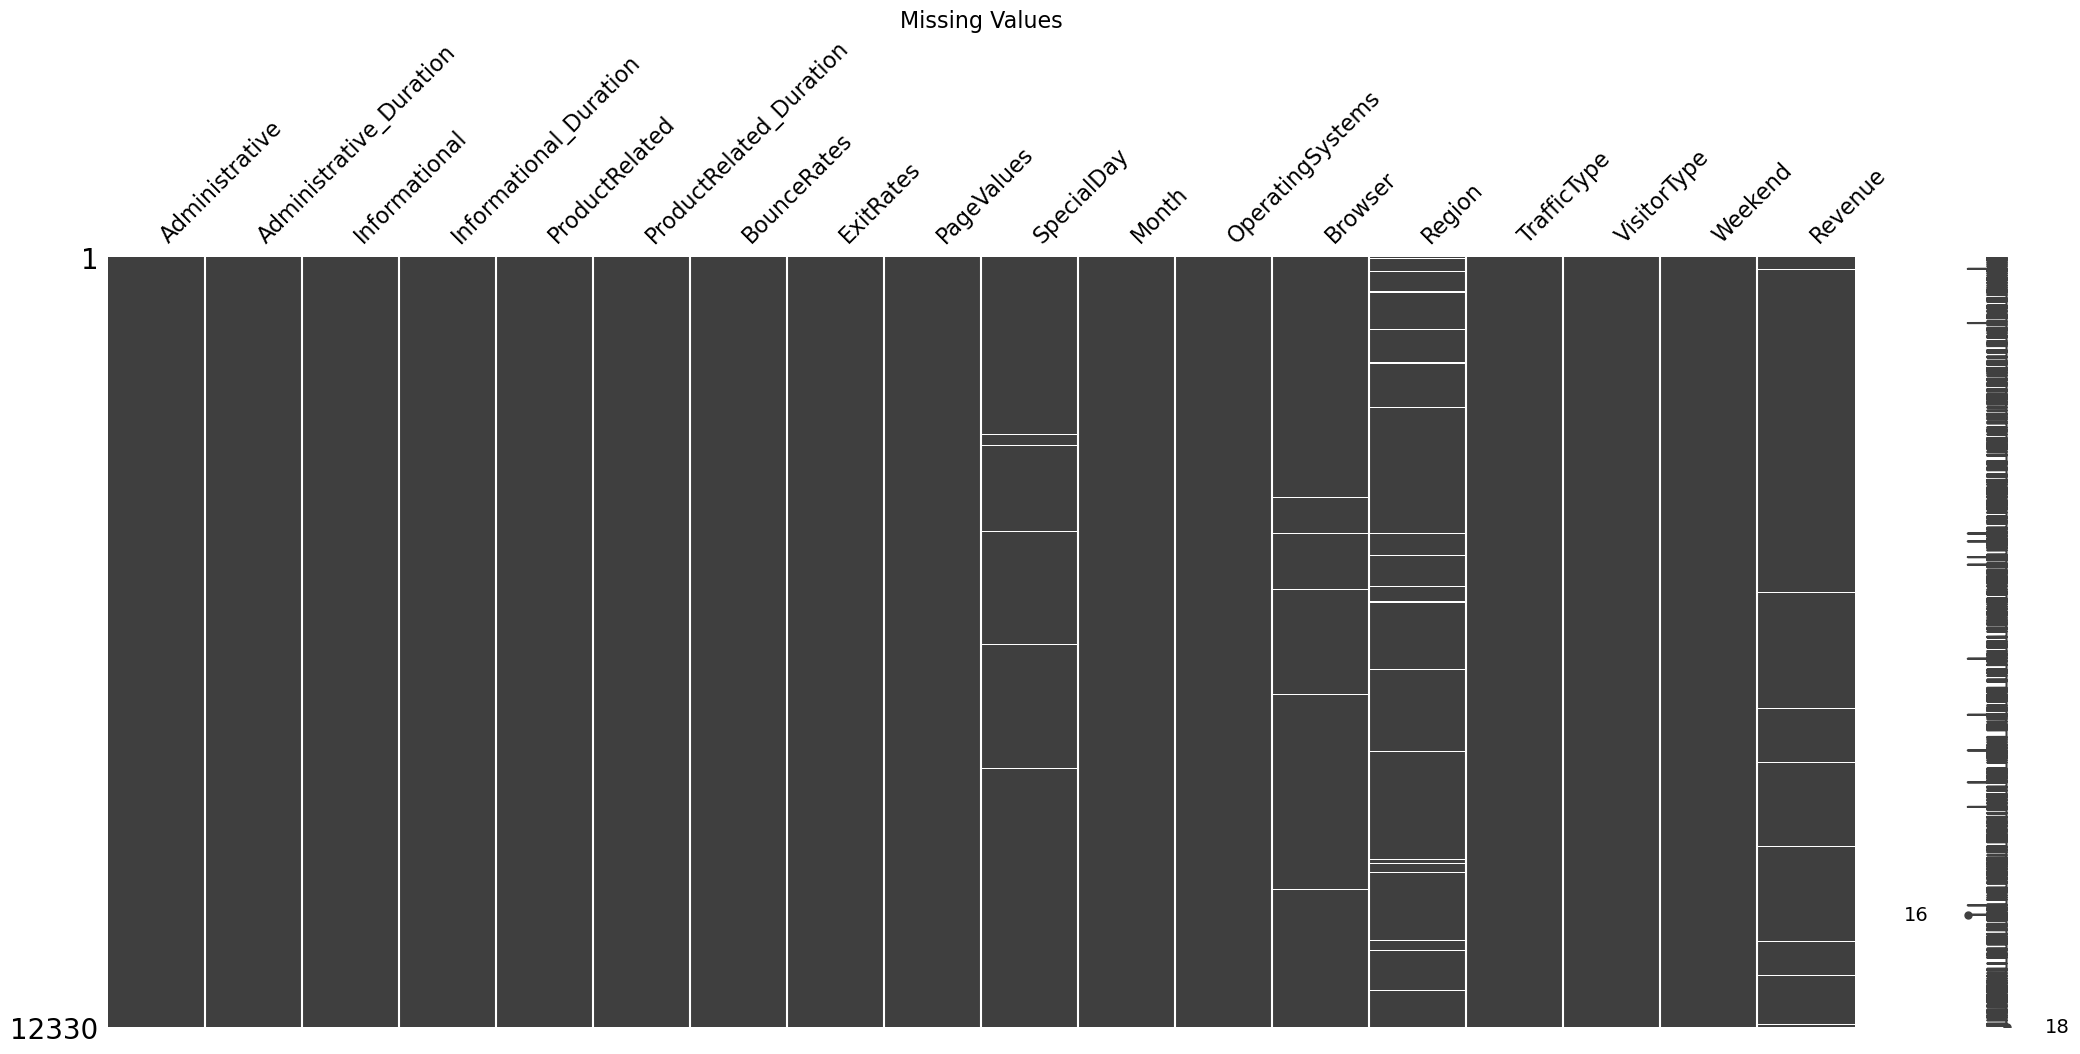

In [3]:
import missingno as msno

# Visualize missing data
msno.matrix(df)
plt.title('Missing Values', fontsize=16)
plt.show()

In [4]:
# Missing values in target are not feasible and are dropped
missing_values_target = df['Revenue'].isna().sum()
df.dropna(subset=['Revenue'], inplace=True)
print(f"\nDropped {missing_values_target} rows with missing target values.")

# Likewise goes for duplicated rows
duplicate_rows_dropped = df.duplicated().sum()
df.drop_duplicates(inplace=True)
print(f"\nDropped {duplicate_rows_dropped} duplicate rows.")


Dropped 147 rows with missing target values.

Dropped 92 duplicate rows.


In [5]:
# Calculate the impact of dropping rows with missing values
df_temp = df.copy()
rows_before_drop = len(df_temp)
df_temp.dropna(inplace=True)
rows_dropped = rows_before_drop - len(df_temp)
percentage_dropped = (rows_dropped / rows_before_drop) * 100
print(f"\nImpact of dropping all rows with missing values: {rows_dropped} rows ({percentage_dropped:.2}% of the dataset)")
del df_temp


Impact of dropping all rows with missing values: 540 rows (4.5% of the dataset)


### Missing values in 'Region', 'Browser', and 'SpecialDay' columns
- The 'Region', 'Browser', and 'SpecialDay' columns contain categorical data
- There are missing values (NaN) in these columns

**Assessment**: As these columns contain categorical data, missing values cannot be easily imputed without additional context. Removing the rows with missing data may result in loss of potentially valuable information.

**Action**: We will keep the missing values for now. During preprocessing, we will consider introducing imputation strategies. Model performance outcomes will inform whether to employ imputation strategies or omit rows with missing values.


In [6]:
# Isolating columns with missing values
df.isna().sum().loc[lambda x: x > 0].sort_values(ascending=False)

Region        244
Browser       182
SpecialDay    122
dtype: int64

### Inspecting Subcategories
When inspecting the subcategories for the object data, we notice some atypical values that will be addressed in the upcoming sections.

In [7]:
# Object datatype unique values
object_cols = df.select_dtypes("object")
for i in object_cols:
    print(f"{i}")
    print(df[i].unique())
    print("")

Month
['Feb' 'Mar' 'May' 'Turc' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Sept'
 'Dec']

VisitorType
['Returning_Visitor' 'New_Visitor' 'Other']

Weekend
['False' 'True' 'Name:Zara']

Revenue
[False True]



### Unexpected Values in 'Month'
- There is an unexpected value "Turc" in the 'Month' column
- September is represented under two seperate categories: "Sep" and "Sept"
- The months "Jan" and "April" are missing

**Assessment**: Without additional context, we cannot make assumptions about what "Turc" represents. These rows could belong to any month, including January, April, or others.

**Action:** To prevent erroneous interpretations, these "Turc" entries in the month will be replaced with NaN values. Similar to the previous section, we may consider relabeling "Turc" or imputing it as, for example, "Unknown", if it demonstrates predictive significance. "Sep" and "Sept" are consolidated.

In [8]:
# Print Month subcategories and corresponding counts
month_counts = df['Month'].value_counts()
for month, count in month_counts.items():
    print(f'Month "{month}" count: {count}')

Month "May" count: 3131
Month "Nov" count: 2951
Month "Mar" count: 1852
Month "Dec" count: 1689
Month "Oct" count: 545
Month "Aug" count: 427
Month "Jul" count: 426
Month "Sep" count: 353
Month "June" count: 283
Month "Feb" count: 179
Month "Turc" count: 168
Month "Sept" count: 87


In [9]:
# Relabel 'Turc' to NaN
df['Month'] = df['Month'].replace('Turc', np.nan)

# Consolidate "Sept" with "Sep"
df['Month'] = df['Month'].replace('Sept', 'Sep')

In [10]:
print(f"There are now {df['Month'].isna().sum()} additional missing values.")

There are now 168 additional missing values.


### Weekend: Handling Unexpected 'Name:Zara' Value
The 'Weekend' feature should be binary, but 189 rows contain the unexpected value 'Name:Zara'.

**Assessment**: The presence of 'Name:Zara' in a binary feature is concerning and may indicate erroneous entries.

**Preprocessing Options**:
- Drop the 'Weekend' feature if it lacks predictive value.
- If valuable we can consider imputation or dropping rows with unknown 'Weekend' values.

**Action**: Replace 'Name:Zara' with NaN in the 'Weekend' feature for now, allowing further investigation and preprocessing decisions.

In [11]:
# Categories and count
df['Weekend'].value_counts()

Weekend
False        9081
True         2826
Name:Zara     184
Name: count, dtype: int64

In [12]:
# Relabel 'Name:Zara' to NaN
df['Weekend'] = df['Weekend'].replace('Name:Zara', np.nan)

### Investigation of Anomalies in Continuous Features
Descriptive statistics reveal anomalies in the following features:
- 'Administrative' contains 122 negative values.
    - Trivia: 'Administrative_Duration' max value 989493 indicates some 'forget' to log out from their accounts
- 'BounceRates' contains: 
    - 357 negative values
    - 243 inaccurate values above 1

These anomalies may stem from data entry errors, measurement or tracking issues, or system bugs.

Unfortunately, within the confines of this dataset alone, it's impossible to determine the intended values for these anomalies. Therefore, they will be treated as NaN values.

The handling of these now additional 722 missing values will be explored further during the preprocessing pipeline.

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12091.0,2.254983,3.418783,-10.00000,0.000000,1.00000,4.000000,27.000000
Administrative_Duration,12091.0,1293.862319,34406.147068,0.00000,0.000000,9.00000,94.650000,989493.000000
Informational,12091.0,0.507071,1.271568,0.00000,0.000000,0.00000,0.000000,24.000000
Informational_Duration,12091.0,34.699421,141.381512,0.00000,0.000000,0.00000,0.000000,2549.375000
ProductRelated,12091.0,31.944256,44.552279,0.00000,7.000000,18.00000,38.000000,705.000000
ProductRelated_Duration,12091.0,1203.140449,1920.334676,0.00000,191.000000,606.20000,1474.500000,63973.522230
BounceRates,12091.0,0.043189,0.240376,-0.49868,0.000000,0.00274,0.017188,2.098952
ExitRates,12091.0,0.041943,0.046898,0.00000,0.014285,0.02500,0.050000,0.200000
PageValues,12091.0,5.921890,18.584783,0.00000,0.000000,0.00000,0.000000,361.763742
SpecialDay,11969.0,0.061826,0.199533,0.00000,0.000000,0.00000,0.000000,1.000000


In [14]:
# Summary of invalid values
admin_bad_data_neg = df.loc[df['Administrative'] < 0, 'Administrative'].count()
bounce_bad_data_neg = df.loc[df['BounceRates'] < 0, 'BounceRates'].count()
bounce_bad_data_pos = df.loc[df['BounceRates'] > 1, 'BounceRates'].count()

numerical_feat_total_bad = admin_bad_data_neg + bounce_bad_data_neg + bounce_bad_data_pos

print(f"'Administrative' negative values: {admin_bad_data_neg}")
print(f"'BounceRates' negative values: {bounce_bad_data_neg}")
print(f"'BounceRates' values above 1: {bounce_bad_data_pos}")
print(f"Total invalid values for numerical features: {numerical_feat_total_bad}")

'Administrative' negative values: 122
'BounceRates' negative values: 357
'BounceRates' values above 1: 243
Total invalid values for numerical features: 722


In [15]:
# Replace negative and irrational values with NaN
df.loc[df['Administrative'] < 0, 'Administrative'] = np.nan
df.loc[df['BounceRates'] < 0, 'BounceRates'] = np.nan
df.loc[df['BounceRates'] > 1, 'BounceRates'] = np.nan

### 'SpecialDay' as Categorical Ordinal
Although currently represented as floating-point numbers, the 'SpecialDay' feature is inherently categorical ordinal data. These values denote the proximity of browsing dates to special occasions. Converting them to string values would be more appropriate, as the floating-point decimals are unnecessary and make EDA more cumbersome. This will be done in a subsequent section. Moreover, the feature will ultimately be encoded into distinct categories.

In [16]:
# Print unique values of 'SpecialDay', disclosing unnecessary decimals
for x in df['SpecialDay'].unique():
    print('{:.20f}'.format(x))

0.00000000000000000000
0.40000000000000002220
0.80000000000000004441
1.00000000000000000000
0.20000000000000001110
0.59999999999999997780
nan


### Data Cleaning Summary
After thorough data cleaning, we have encountered several inconsistencies within the dataset. The initial missing value count of 540 (4.5%), not accounting for duplicated rows and missing values in the target, has more than doubled, resulting in a total of 1546 values (12.8% of the dataset).

In [17]:
summary_df = eda.df_info(df)
display_all(summary_df)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
Administrative,float64,Numerical,27,"[0.0, 1.0, 2.0, 4.0, 12.0, 3.0, 10.0, 6.0, nan...",122,1.009015
Administrative_Duration,float64,Numerical,3317,"[0.0, 53.0, 64.6, 6.0, 18.0, 9.0, 56.0, 16.0, ...",0,0.0
Informational,int64,Numerical,17,"[0, 1, 2, 4, 16, 5, 3, 6, 12, 7]",0,0.0
Informational_Duration,float64,Numerical,1242,"[0.0, 120.0, 16.0, 94.0, 93.0, 75.0, 19.0, 22....",0,0.0
ProductRelated,int64,Numerical,310,"[1, 2, 10, 19, 0, 3, 16, 7, 6, 23]",0,0.0
ProductRelated_Duration,float64,Numerical,9447,"[0.0, 64.0, 2.666666667, 627.5, 154.2166667, 3...",0,0.0
BounceRates,float64,Numerical,1781,"[0.2, 0.0, 0.05, 0.02, 0.015789474, nan, 0.018...",600,4.962369
ExitRates,float64,Numerical,4727,"[0.2, 0.1, 0.14, 0.05, 0.024561404, 0.02222222...",0,0.0
PageValues,float64,Numerical,2672,"[0.0, 54.17976426, 19.44707913, 38.30849268, 2...",0,0.0
SpecialDay,float64,Numerical,6,"[0.0, 0.4, 0.8, 1.0, 0.2, 0.6, nan]",122,1.009015


In [18]:
# Calculate the impact of dropping rows with missing values
df_temp = df.copy()
rows_before_drop = len(df_temp)
df_temp.dropna(inplace=True)
rows_dropped = rows_before_drop - len(df_temp)
percentage_dropped = (rows_dropped / rows_before_drop) * 100
print(f"\nImpact of dropping all rows with missing values: {rows_dropped} rows ({percentage_dropped:.3}% of the dataset)")
del df_temp


Impact of dropping all rows with missing values: 1546 rows (12.8% of the dataset)


## Optimizing Memory Usage
By converting columns to appropriate data types and downcasting them, we significantly reduced the dataset's memory footprint from 4.3 MB to 0.45 MB (90% reduction). The key steps include:

1. Dropping missing values
   > Note: The handling of missing values here might differ from the approach used in the modeling phase.
2. Converting specific columns to integer, float, and categorical types
3. Downcasting float, integer, and object columns using the `downcast_dtypes()` function

This optimization leads to:
- Reduced memory consumption
- Improved code performance
- Enhanced data understanding

The memory-optimized dataset facilitates **more efficient and effective exploratory data analysis**.

In [19]:
# Bring out true datatypes of binary features
print(type(df['Weekend'][1]))
print(type(df['Revenue'][1]))

<class 'str'>
<class 'bool'>


In [20]:
# Get memory usage in bytes pre-downcasting
memory_usage_bytes = df.memory_usage(deep=True).sum()

# Convert to megabytes (MB)
memory_usage_mb = memory_usage_bytes / (1024 ** 2)
print(f"Memory usage: {memory_usage_mb:.2f} MB")

Memory usage: 4.29 MB


In [21]:
# Drop missing values
df.dropna(inplace=True)

# Reset df index
df.reset_index(drop=True, inplace=True)

def downcast_dtypes(df):
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols = [c for c in df if df[c].dtype in ["int64", "int32"]]
    object_cols = [c for c in df if df[c].dtype == "object"]
    
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols] = df[int_cols].astype(np.int16)
    df[object_cols] = df[object_cols].astype("category")
    
    return df

# Convert columns to integer type
int_columns = ['Administrative', 'Informational', 'ProductRelated', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
df[int_columns] = df[int_columns].astype(int)

# Convert columns to float type
float_columns = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
df[float_columns] = df[float_columns].astype(float)

# Convert object 'Weekend' and boolean 'Revenue' to numeric representation
df['Weekend'] = df['Weekend'].map({'True': 1, 'False': 0})
df['Revenue'] = df['Revenue'].map({True: 1, False: 0})

# Round 'SpecialDay' to 1 decimal place and convert to categorical
df['SpecialDay'] = df['SpecialDay'].round(1).astype('object')

# Downcast integer and float columns
df = downcast_dtypes(df)

# Display dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10545 entries, 0 to 10544
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           10545 non-null  int16   
 1   Administrative_Duration  10545 non-null  float32 
 2   Informational            10545 non-null  int16   
 3   Informational_Duration   10545 non-null  float32 
 4   ProductRelated           10545 non-null  int16   
 5   ProductRelated_Duration  10545 non-null  float32 
 6   BounceRates              10545 non-null  float32 
 7   ExitRates                10545 non-null  float32 
 8   PageValues               10545 non-null  float32 
 9   SpecialDay               10545 non-null  category
 10  Month                    10545 non-null  category
 11  OperatingSystems         10545 non-null  int16   
 12  Browser                  10545 non-null  int16   
 13  Region                   10545 non-null  int16   
 14  Traffi

In [22]:
# Get memory usage in bytes post-downcasting
memory_usage_bytes = df.memory_usage(deep=True).sum()

# Convert to megabytes (MB)
memory_usage_mb = memory_usage_bytes / (1024 ** 2)
print(f"Memory usage: {memory_usage_mb:.2f} MB")

Memory usage: 0.45 MB


## Exploratory Data Analysis (EDA)
This comprehensive EDA covers a range of aspects, including a deeper understanding of feature types, distributions, and frequencies, as well as evaluating transformations to select the most optimal ones for the upcoming modeling phase. Advancing into correlation analysis with heatmaps and scatterplots, it culminates in an exploration of the relationship between specific variables and revenue—our target variable. These analyses pave the way for the modeling that follows and enrich our business acumen.

### Feature Type Analysis
The table below presents the results of the feature type analysis, classifying features into appropriate types. Two key points to consider for the upcoming modeling phase:

- Categorical features must be encoded during preprocessing, even if they are numerical in data type:
  - Some features, like 'SpecialDay', appears as decimal numbers but represent ordinal categorical data, indicating the closeness of browsing date to special days.
  - Other numeric categorical features, such as 'OperatingSystems', are placeholders for nominal categories without inherent order.
- Sparse numeric discrete features with few unique values may perform poorly. Encoding these features could potentially improve their predictive power.

In [23]:
from great_tables import GT, md, html

# Feature Classification and Metadata Summary
def create_feature_lists(data, custom_features=None):
    '''Generate lists of features based on their types and metadata'''
    
    NUM_FEAT = [feature for feature in data.select_dtypes(include=np.number).columns]
    CONT_FEAT = [feature for feature in NUM_FEAT if data[feature].dtype in ['float64', 'float32', 'float16'] and len(data[feature].unique()) >= 25]
    DISC_FEAT = [feature for feature in NUM_FEAT if data[feature].dtype in ['int64', 'int32', 'int16', 'int8']]
    CAT_FEAT = [feature for feature in data.columns if data[feature].dtype in ['object', 'category', 'bool'] 
            and len(data[feature].unique()) < 13] + [feature for feature in NUM_FEAT if data[feature].dtype in ['float64', 'float32', 'float16'] and len(data[feature].unique()) < 25]
    BINARY_FEAT = [feature for feature in CAT_FEAT if len(data[feature].unique()) == 2] + \
              [feature for feature in NUM_FEAT if len(data[feature].unique()) == 2]

    return NUM_FEAT, CONT_FEAT, DISC_FEAT, CAT_FEAT, BINARY_FEAT, custom_features

# Custom features dictionary
custom_features = {
    'Administrative': {'FeatureType': 'Numeric', 'SubType': 'Discrete'},
    'SpecialDay': {'FeatureType': 'Categorical', 'SubType': 'Ordinal'},
    'Month': {'FeatureType': 'Categorical', 'SubType': 'Ordinal'},
    'Browser': {'FeatureType': 'Categorical', 'SubType': 'Nominal'},
    'OperatingSystems': {'FeatureType': 'Categorical', 'SubType': 'Nominal'},
    'Region': {'FeatureType': 'Categorical', 'SubType': 'Nominal'},
    'TrafficType': {'FeatureType': 'Categorical', 'SubType': 'Nominal'},
    'Region': {'FeatureType': 'Categorical', 'SubType': 'Nominal'},
    'VisitorType': {'FeatureType': 'Categorical', 'SubType': 'Nominal'}
}

# Run Create Feature List Function
num_feat, cont_feat, disc_feat, cat_feat, binary_feat, custom_features = create_feature_lists(df, custom_features)

# Creating a dataframe to store the feature metadata
feature_df = pd.DataFrame(index=df.columns, 
                          columns=['Feature', 'DataType', 'UniqueValues', 'FeatureType', 'SubType'])

# Overview of unique values and feature type
for col in df.columns:
    feature_df.loc[col, 'Feature'] = col
    feature_df.loc[col, 'DataType'] = df[col].dtype
    
    if isinstance(df[col].dtype, pd.CategoricalDtype):
        unique_values = df[col].cat.categories.tolist()[:6] + ['...']
    else:
        unique_values = df[col].unique()
        if len(unique_values) > 6:
            unique_values = unique_values[:6].tolist() + ['...']
    
    if col in cont_feat:
        feature_df.loc[col, 'UniqueValues'] = len(df[col].unique())
    else:
        feature_df.loc[col, 'UniqueValues'] = unique_values
    
    if col in custom_features:
        feature_df.loc[col, 'FeatureType'] = custom_features[col]['FeatureType']
        feature_df.loc[col, 'SubType'] = custom_features[col]['SubType']
    elif col in num_feat:
        feature_df.loc[col, 'FeatureType'] = "Numeric"
        if col in binary_feat:
            feature_df.loc[col, 'SubType'] = "Binary"
        elif col in cont_feat:
            feature_df.loc[col, 'SubType'] = "Continuous"
        elif col in disc_feat:
            feature_df.loc[col, 'SubType'] = "Discrete"
    elif col in cat_feat:
        feature_df.loc[col, 'FeatureType'] = "Categorical"
        if col in binary_feat:
            feature_df.loc[col, 'SubType'] = "Binary"
        else:
            feature_df.loc[col, 'SubType'] = "Nominal_or_Ordinal"

# Create a display table
(
    GT(feature_df, rowname_col="Feature")
    .tab_header(
        title="Feature Metadata Summary",
        subtitle="Descriptive Overview of Dataset Features and Types"
    )
 
)

GT(_tbl_data=                                         Feature  DataType  \
Administrative                    Administrative     int16   
Administrative_Duration  Administrative_Duration   float32   
Informational                      Informational     int16   
Informational_Duration    Informational_Duration   float32   
ProductRelated                    ProductRelated     int16   
ProductRelated_Duration  ProductRelated_Duration   float32   
BounceRates                          BounceRates   float32   
ExitRates                              ExitRates   float32   
PageValues                            PageValues   float32   
SpecialDay                            SpecialDay  category   
Month                                      Month  category   
OperatingSystems                OperatingSystems     int16   
Browser                                  Browser     int16   
Region                                    Region     int16   
TrafficType                          TrafficType     int16   
VisitorType                          VisitorType  category   
Weekend                                  Weekend     int16   
Revenue                                  Revenue     int16   

                                                         UniqueValues  \
Administrative                               [0, 1, 4, 2, 12, 3, ...]   
Administrative_Duration                                          2983   
Informational                                [0, 1, 2, 4, 16, 5, ...]   
Informational_Duration                                           1127   
ProductRelated                              [2, 10, 19, 1, 0, 3, ...]   
ProductRelated_Duration                                          8387   
BounceRates                                                      1672   
ExitRates                                                        4211   
PageValues                                                       2324   
SpecialDay                        [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, ...]   
Month                            [Aug, Dec, Feb, Jul, June, Mar, ...]   
OperatingSystems                              [3, 2, 1, 4, 7, 6, ...]   
Browser                                       [2, 3, 4, 1, 5, 6, ...]   
Region                                        [2, 1, 3, 4, 5, 9, ...]   
TrafficType                                   [4, 3, 5, 2, 1, 6, ...]   
VisitorType              [New_Visitor, Other, Returning_Visitor, ...]   
Weekend                                                        [0, 1]   
Revenue                                                        [0, 1]   

                         FeatureType     SubType  
Administrative               Numeric    Discrete  
Administrative_Duration      Numeric  Continuous  
Informational                Numeric    Discrete  
Informational_Duration       Numeric  Continuous  
ProductRelated               Numeric    Discrete  
ProductRelated_Duration      Numeric  Continuous  
BounceRates                  Numeric  Continuous  
ExitRates                    Numeric  Continuous  
PageValues                   Numeric  Continuous  
SpecialDay               Categorical     Ordinal  
Month                    Categorical     Ordinal  
OperatingSystems         Categorical     Nominal  
Browser                  Categorical     Nominal  
Region                   Categorical     Nominal  
TrafficType              Categorical     Nominal  
VisitorType              Categorical     Nominal  
Weekend                      Numeric      Binary  
Revenue                      Numeric      Binary  , _body=<great_tables._gt_data.Body object at 0x000001FB856DFFD0>, _boxhead=Boxhead([ColInfo(var='Feature', type=<ColInfoTypeEnum.stub: 2>, column_label='Feature', column_align='left', column_width=None), ColInfo(var='DataType', type=<ColInfoTypeEnum.default: 1>, column_label='DataType', column_align='right', column_width=None), ColInfo(var='UniqueValues', type=<ColInfoTypeEnum.default: 1>, column_label='UniqueValues', column_align='right', column_

### Continuous Feature Distributions Analysis
All continuous features exhibit right-skewed distributions with a significant number of outliers. The distributions are far from Gaussian. Having a fairly symmetric predictor, devoid of skewness, would greatly facilitate predictions on the data. Below, we present the original distributions. Next, we will apply standard transformations and compare the distributions of these engineered features.

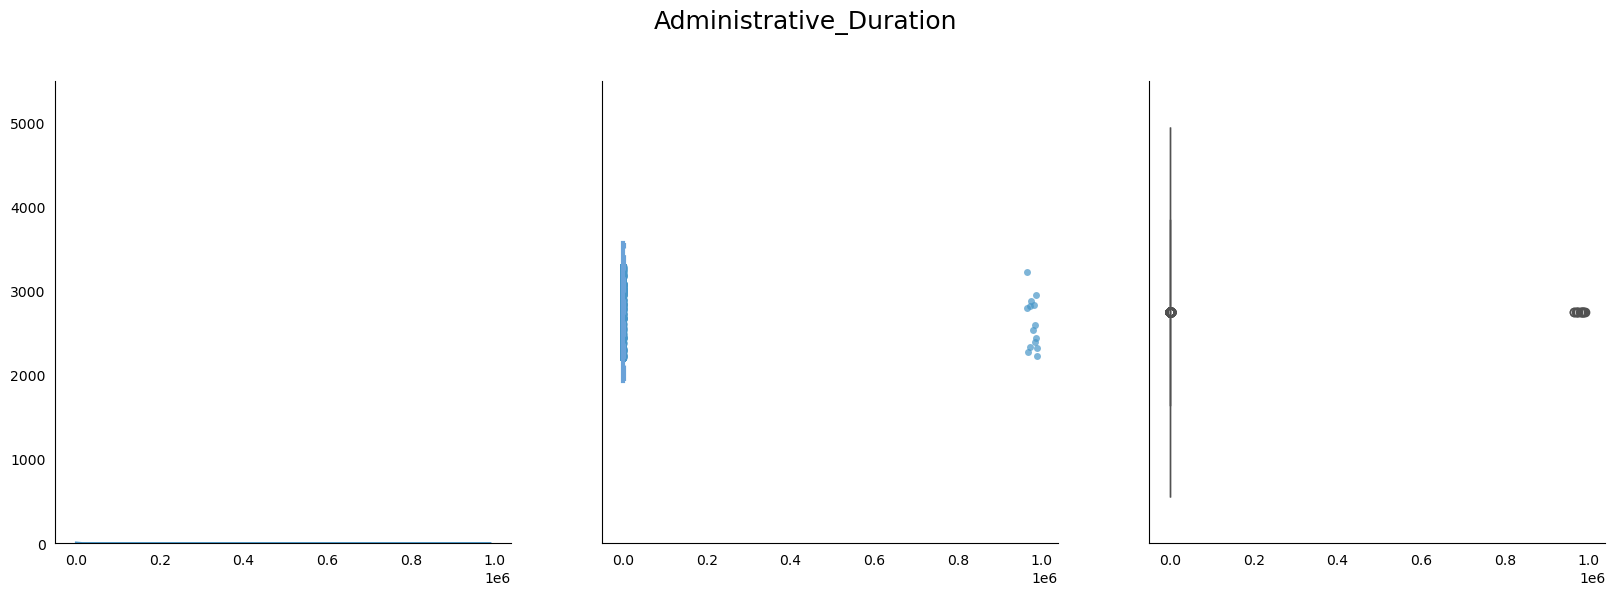

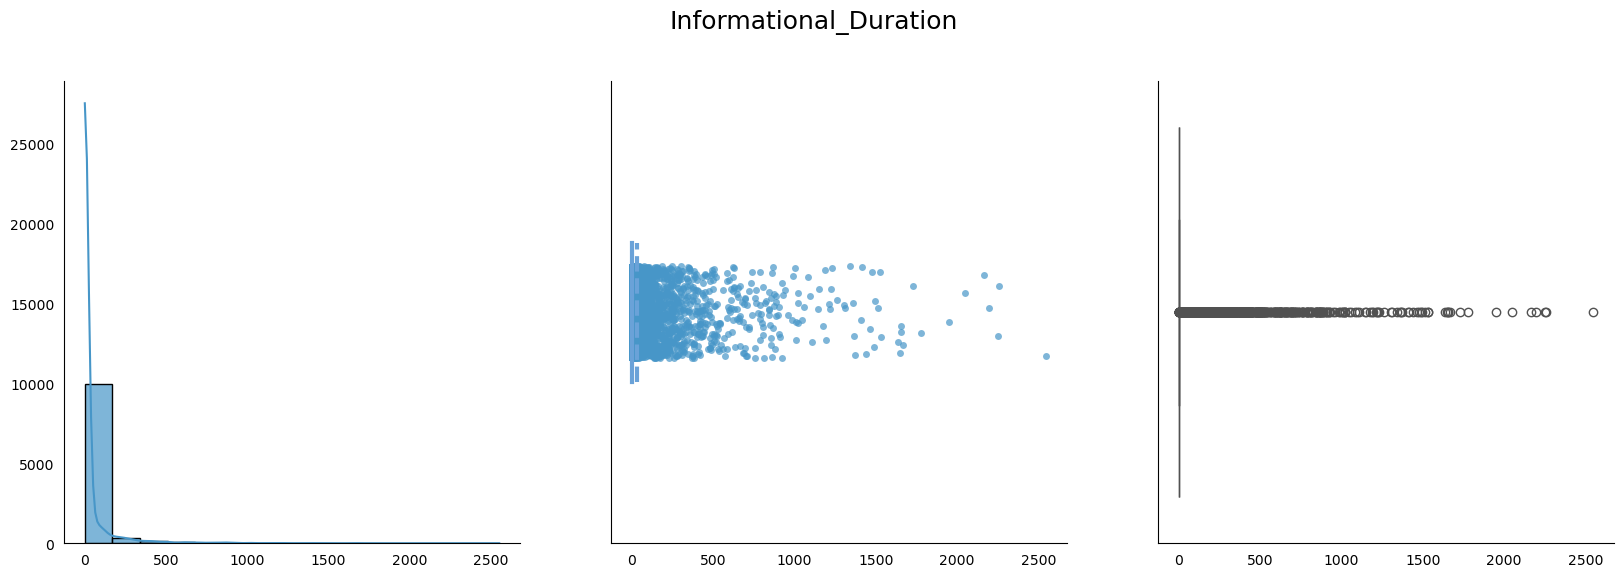

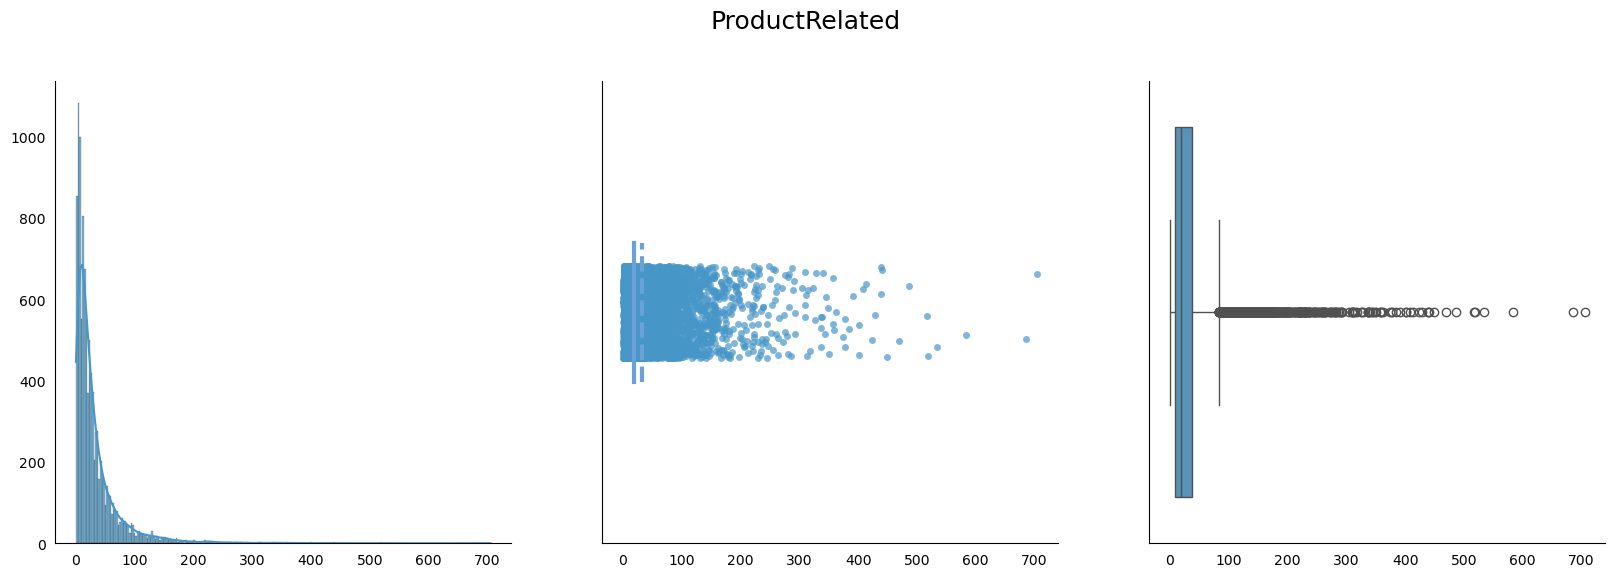

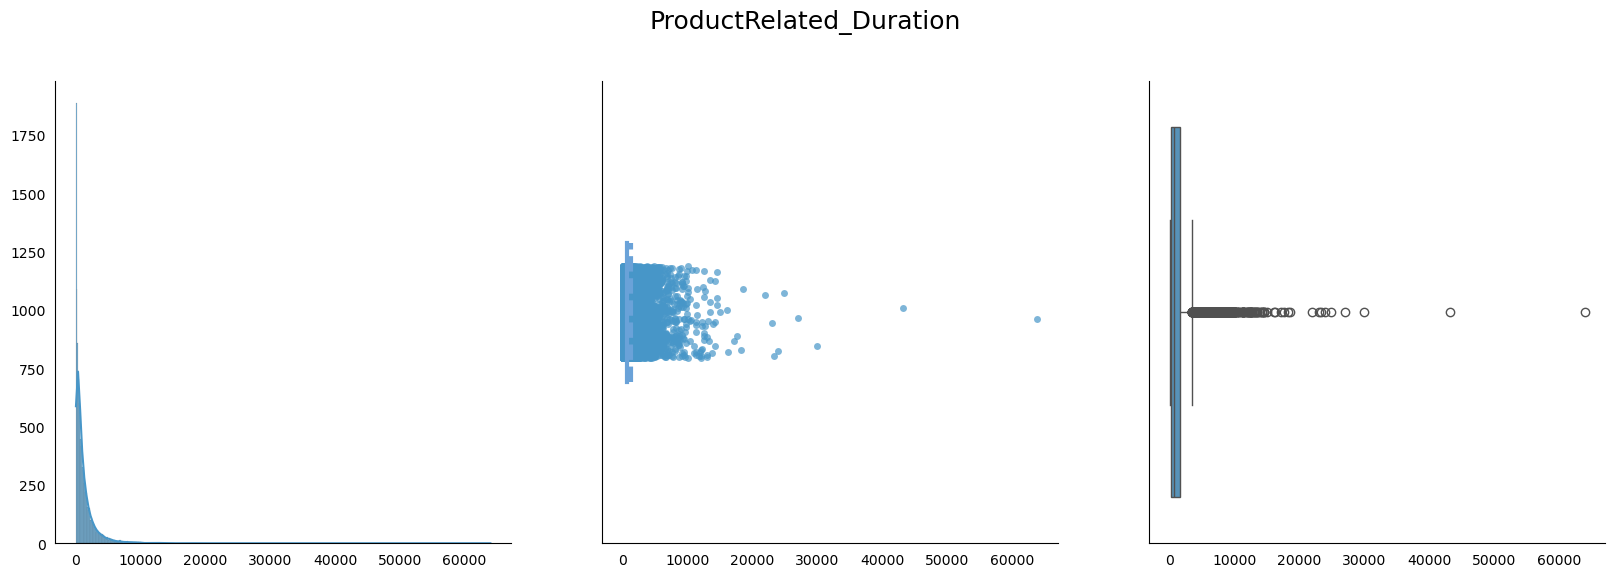

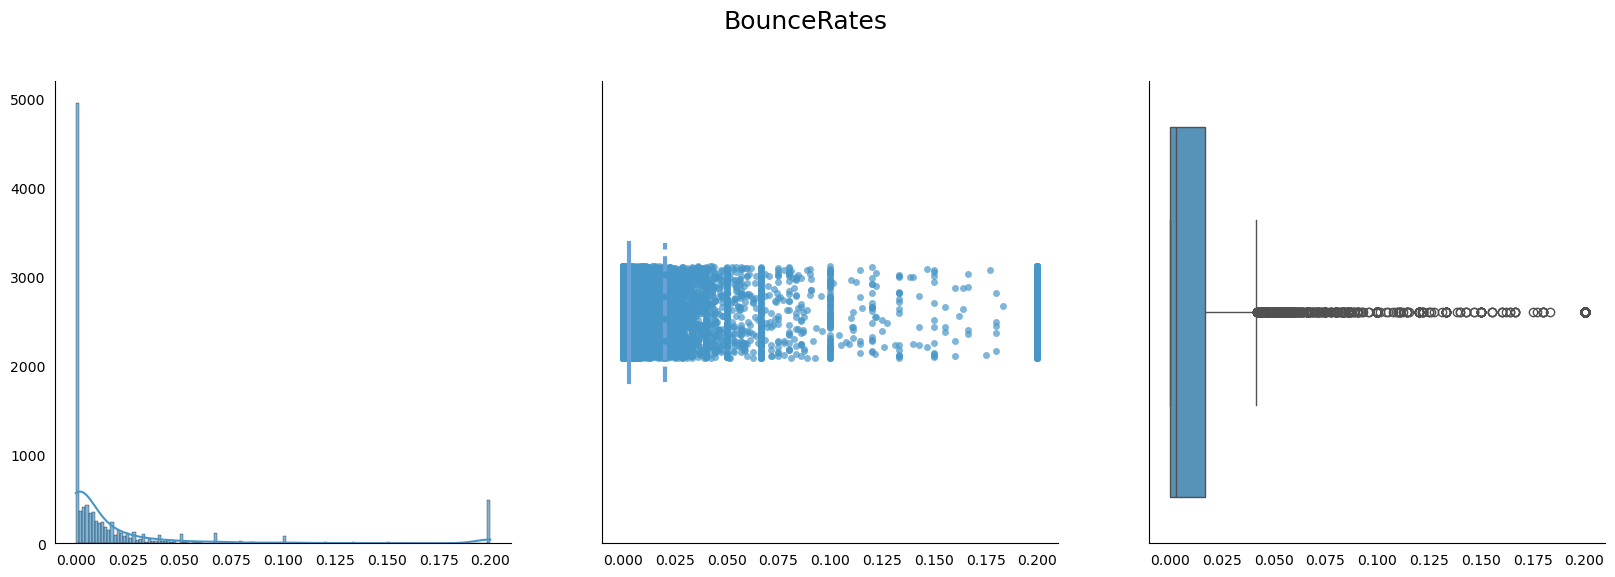

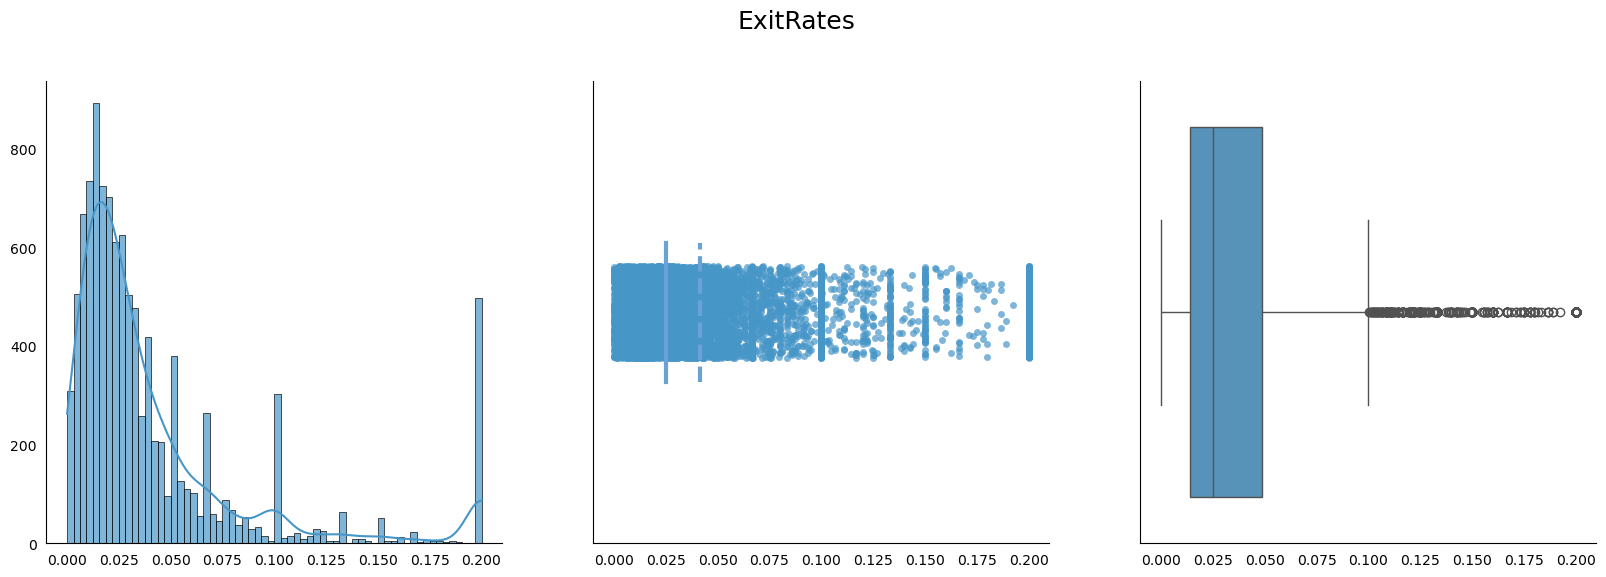

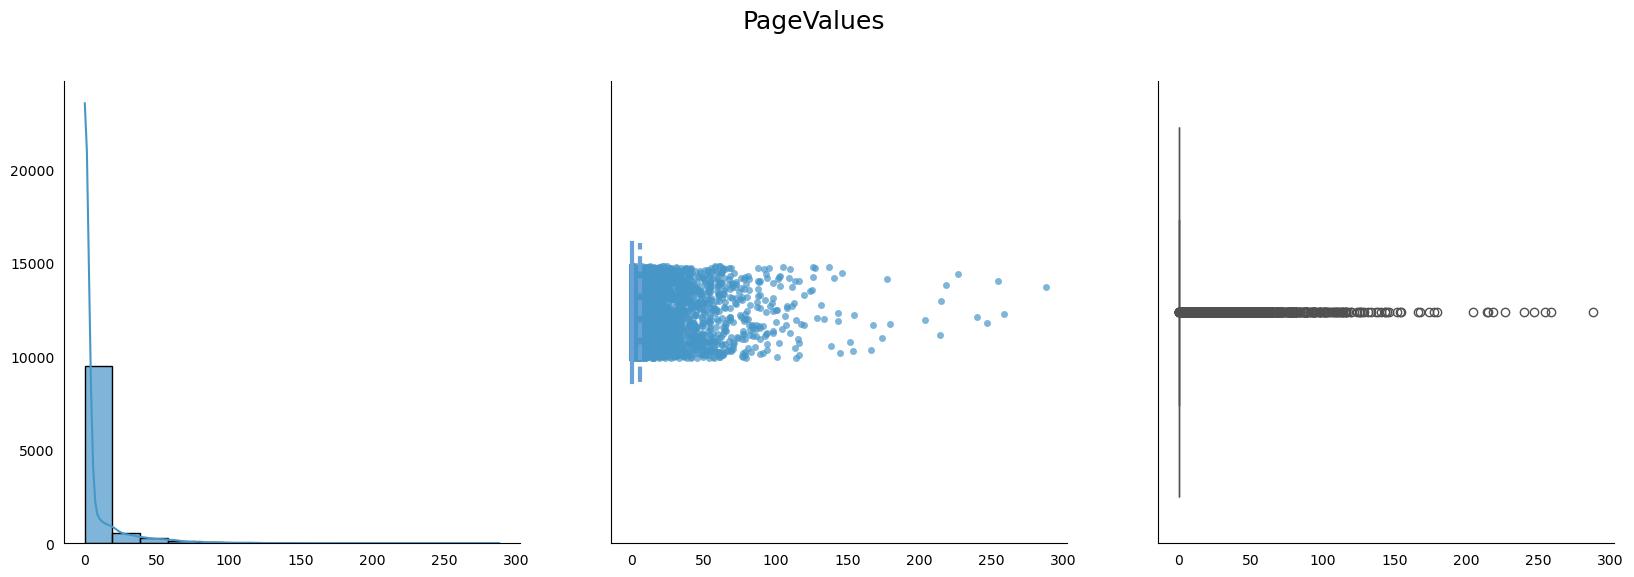

In [24]:
# Import helper functions from 'goose_helpers.py'
import goose_helpers as goose

# Display distributions using custom function
continuous_features = goose.plot_continuous_features(df)

### Data Anomalies in 'BounceRates' and 'ExitRates'
The strip plot analysis revealed anomalies in the 'BounceRates' and 'ExitRates' features, indicating a mix of continuous values and binned categories. Solid-like lines and rounded numbers in value counts suggest the presence of categorical data. For instance, occurrences of exactly 20% without decimals occurring 491 times imply categorical rather than continuous data. Without clarification from the dataset's author, accurately categorizing these bins is challenging. Additionally, the presence of seemingly continuous "categories" like 0.066667 in 'ExitRates' adds complexity. These observations highlight potential irregularities, though definitive explanations await further information.

In [25]:
# BounceRates unique categories with counts
df['BounceRates'].value_counts().sort_values(ascending=False).head(10)

BounceRates
0.000000    4768
0.200000     491
0.066667     117
0.028571     102
0.050000     101
0.025000      91
0.033333      87
0.040000      86
0.100000      84
0.020000      82
Name: count, dtype: int64

In [26]:
# ExitRates unique categories with counts
df['ExitRates'].value_counts().sort_values(ascending=False).head(10)

ExitRates
0.200000    498
0.100000    294
0.050000    285
0.033333    248
0.066667    235
0.025000    190
0.040000    183
0.016667    152
0.020000    147
0.022222    133
Name: count, dtype: int64

### Exploring Feature Transformations
For this analysis, we will primarily focus on using logarithmic and square root transformations. While the Box-Cox and Yeo-Johnson transformations are powerful techniques for handling skewed data, they encountered issues with our dataset due to the presence of extremely large values and complex distributions.

Both the Box-Cox and Yeo-Johnson transformations involve raising values to a power determined by an estimated parameter (λ). In some cases, the transformed values may exceed the maximum representable value for the data type, resulting in overflow issues.

To avoid these problems, we will stick with logarithmic and square root transformations, which are less sensitive to extreme values. For more information on the Yeo-Johnson transformation and its comparison to the Box-Cox transformation, please refer to [this resource](https://feaz-book.com/numeric-yeojohnson).

Refer to the plot below for a feature-by-feature comparison, illustrating the distributions after applying robust scaling, logarithmic transformation (with robust scaling), and square root transformation (with robust scaling).

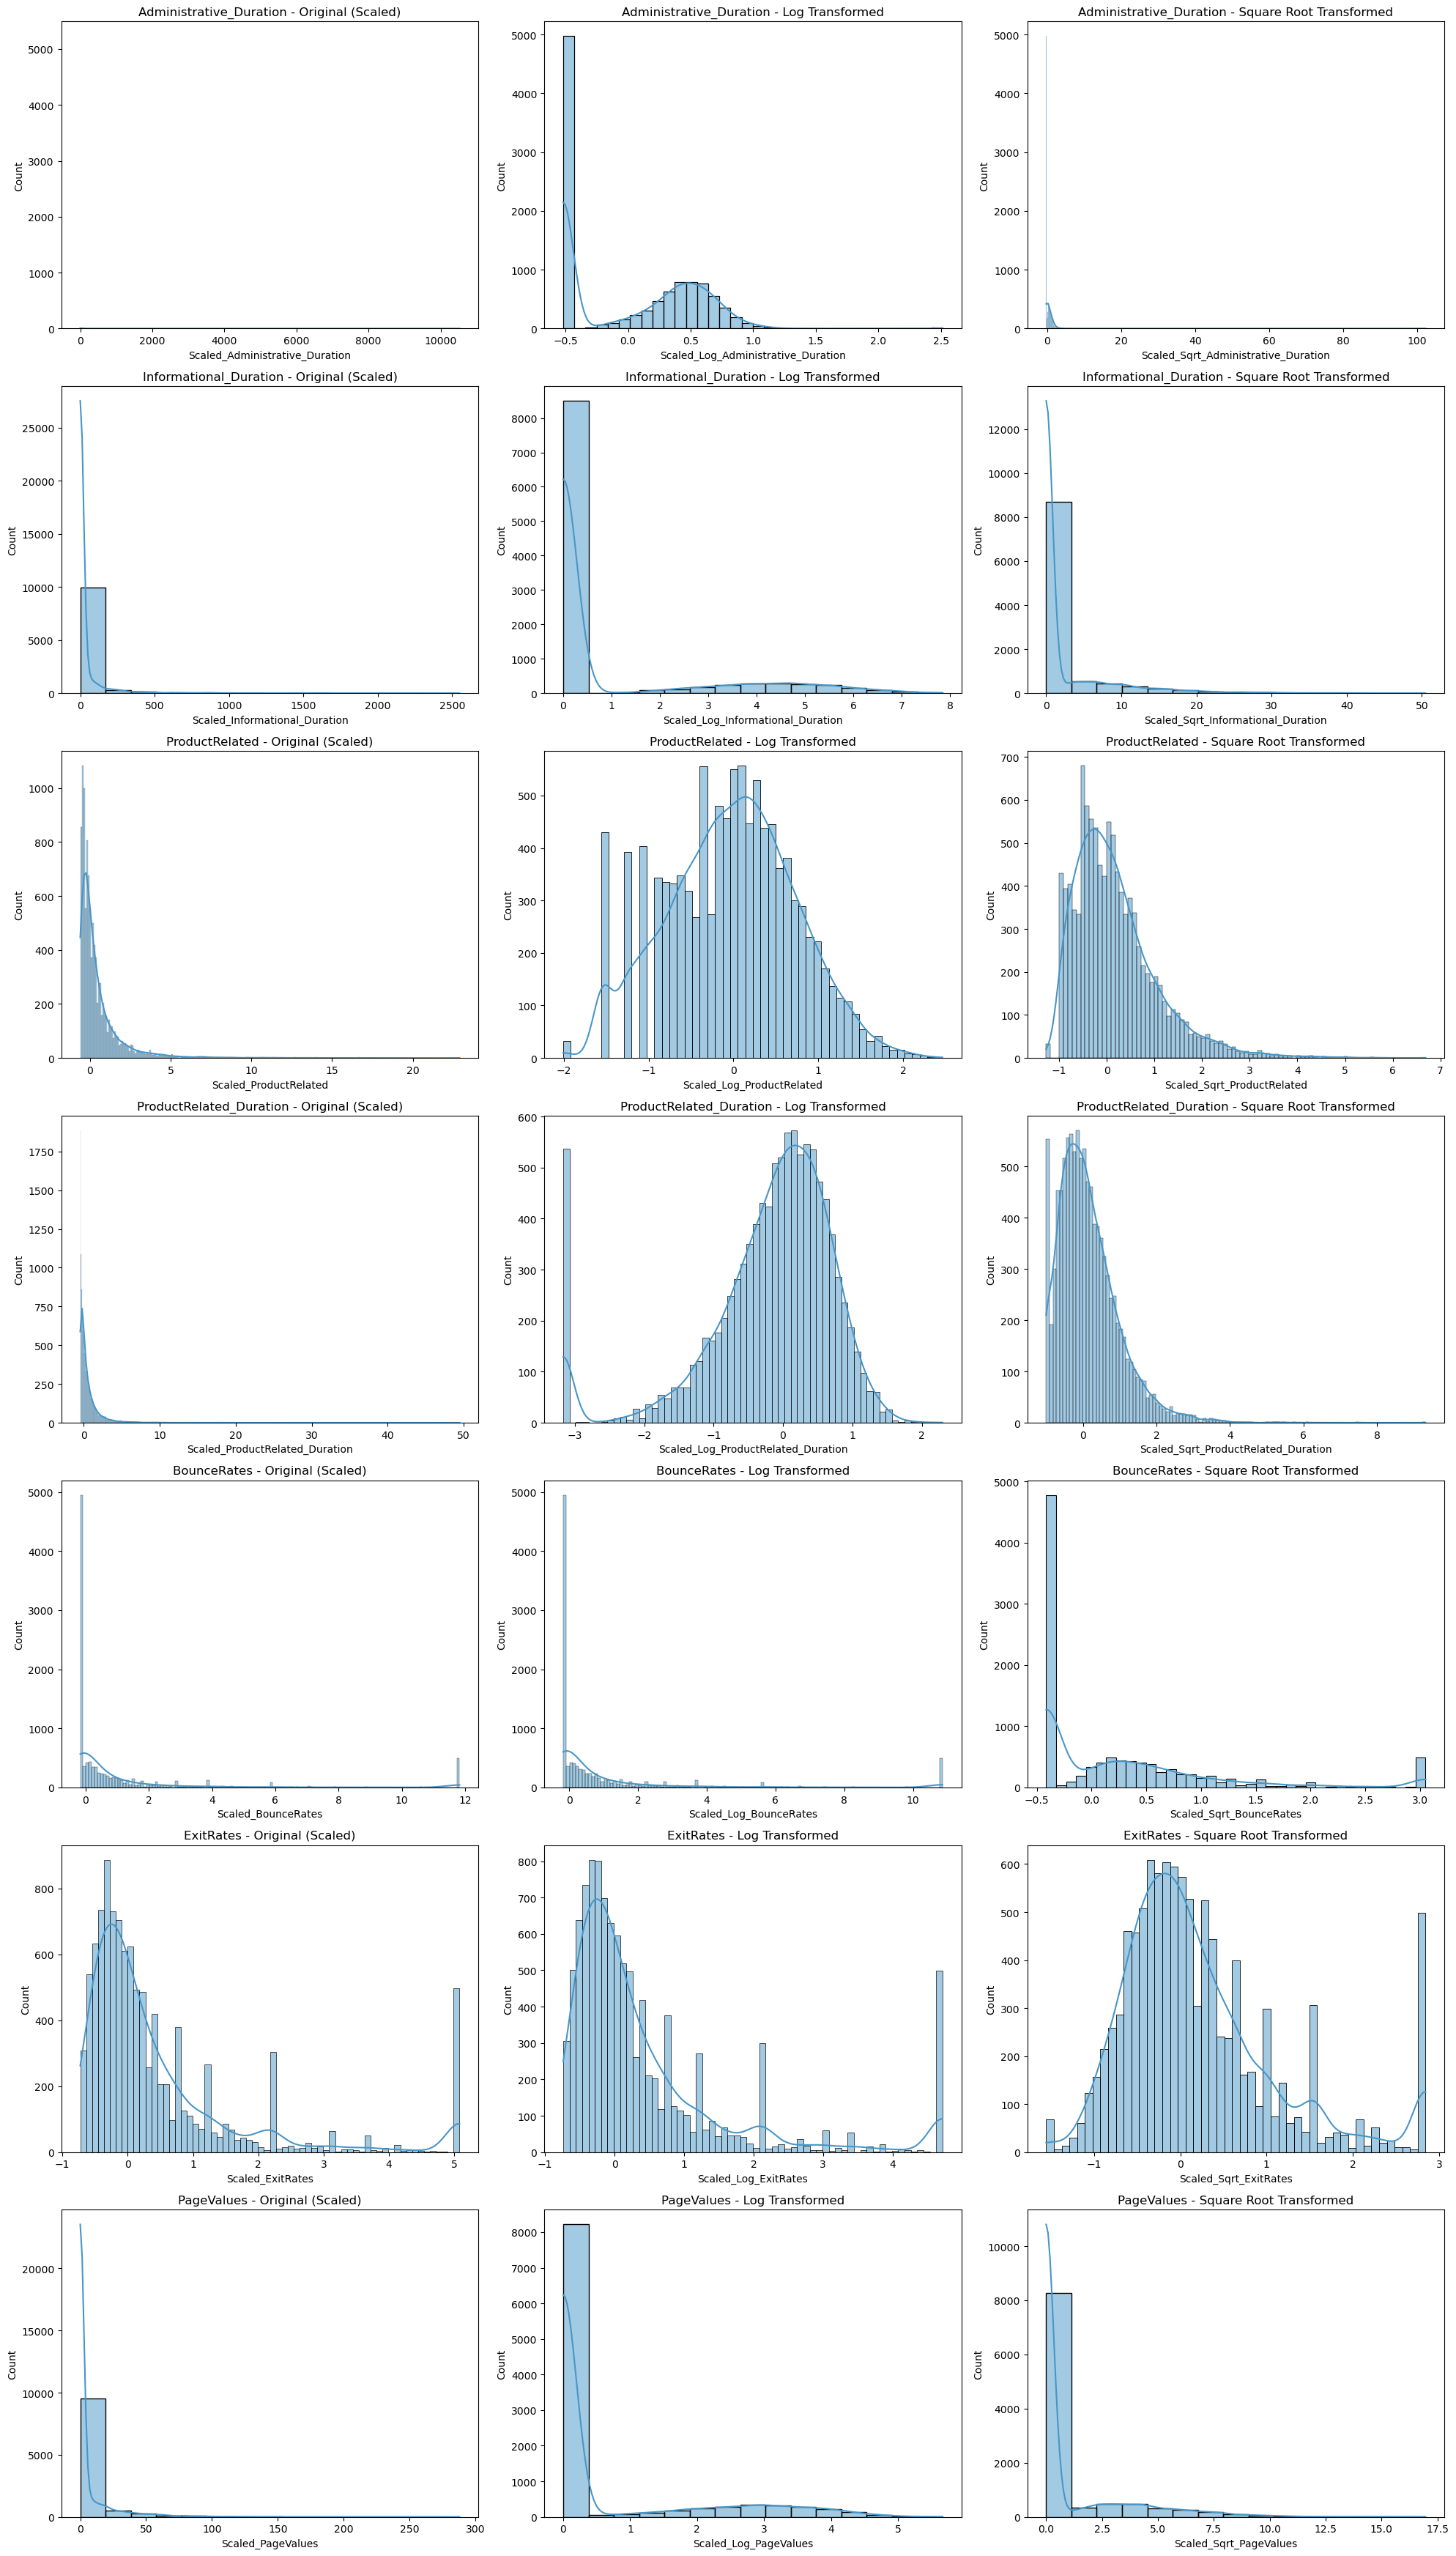

In [27]:
from sklearn.preprocessing import RobustScaler, FunctionTransformer

# Create log transformer
log_transformer = FunctionTransformer(np.log1p)

# Create square root transformer
sqrt_transformer = FunctionTransformer(np.sqrt)

# Create a RobustScaler object
robust_scaler = RobustScaler()

# Create a figure with subplots
fig, axes = plt.subplots(len(continuous_features), 3, figsize=(20, 5 * len(continuous_features)))

# Copy of original df for temporary use
df_temp = df.copy()

# Iterate over continuous features for transformations
for i, feature in enumerate(continuous_features):
    # Original distribution
    df_temp[f'Scaled_{feature}'] = robust_scaler.fit_transform(df_temp[[feature]])
    sns.histplot(df_temp[f'Scaled_{feature}'], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'{feature} - Original (Scaled)')
    
    # Log transformation
    df_temp[f'Log_{feature}'] = log_transformer.transform(df_temp[[feature]])
    df_temp[f'Scaled_Log_{feature}'] = robust_scaler.fit_transform(df_temp[[f'Log_{feature}']])
    sns.histplot(df_temp[f'Scaled_Log_{feature}'], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'{feature} - Log Transformed')
    
    # Square root transformation
    df_temp[f'Sqrt_{feature}'] = sqrt_transformer.transform(df_temp[[feature]])
    df_temp[f'Scaled_Sqrt_{feature}'] = robust_scaler.fit_transform(df_temp[[f'Sqrt_{feature}']])
    sns.histplot(df_temp[f'Scaled_Sqrt_{feature}'], kde=True, ax=axes[i, 2])
    axes[i, 2].set_title(f'{feature} - Square Root Transformed')

plt.tight_layout()
plt.show()

#### Optimizing Features for Better Data Distribution

We've developed a targeted feature handling strategy based on thorough analysis of each feature's distribution, outliers, and characteristics. Here's a summary:

| Feature                 | Distribution   | Outliers      | Transformation | Scaler        |
|-------------------------|----------------|---------------|----------------|---------------|
| Administrative_Duration | Right-skewed   | Significant   | Logarithmic    | RobustScaler  |
| Informational_Duration  | Right-skewed   | Significant   | Logarithmic    | RobustScaler  |
| ProductRelated          | Right-skewed   | Significant   | None           | RobustScaler  |
| ProductRelated_Duration | Right-skewed   | Significant   | None           | RobustScaler  |
| BounceRates             | Right-skewed   | Significant   | Logarithmic    | RobustScaler  |
| ExitRates               | Right-skewed   | Significant   | Logarithmic    | RobustScaler  |
| PageValues              | Right-skewed   | Significant   | Logarithmic    | RobustScaler  |

By comparing the transformed features in the visual below with the originals, we can observe several notable improvements, despite the remaining challenges:

- Reduced skewness
- Revealed data clusters
- Improved outlier handling
- Better interpretability

Some previously unworkable features are now 'usable'. RobustScaler is the clear choice for handling our many outliers while preserving data structure.

These optimizations will lead to more accurate and meaningful results in our modeling and analysis.

Explore the detailed outcomes of our feature transformations in the visualization below!

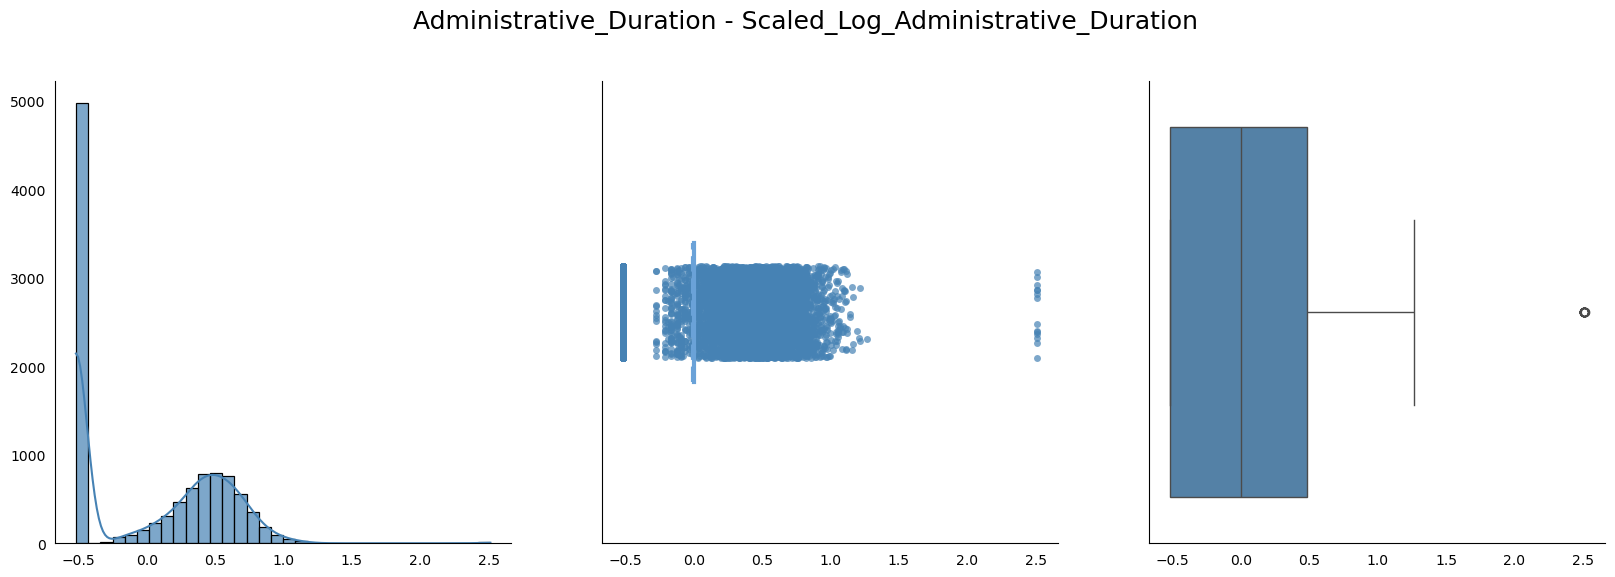

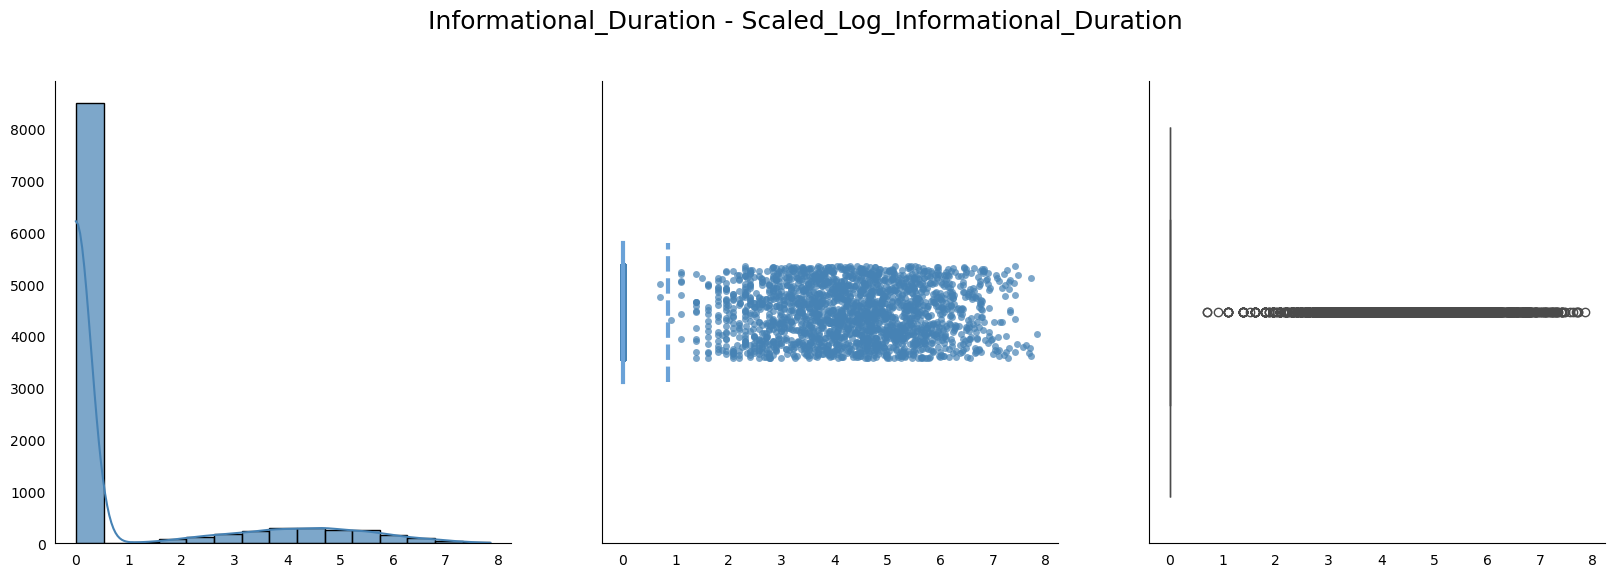

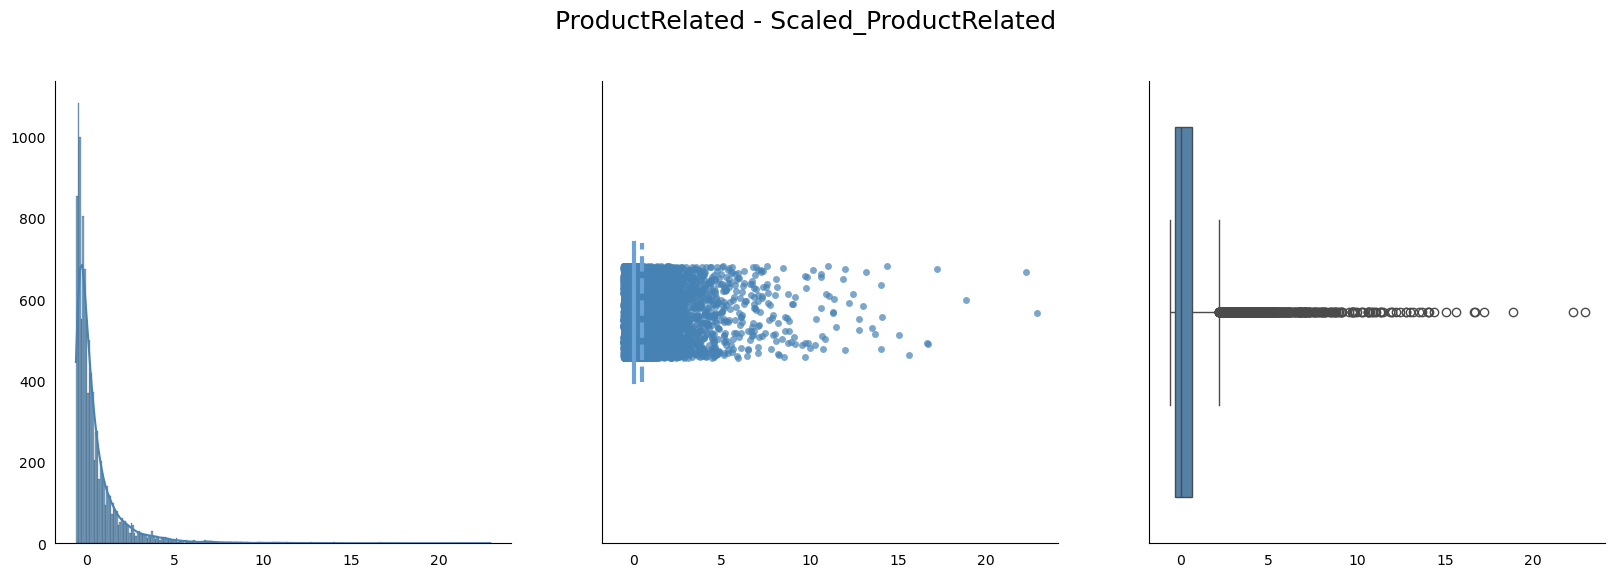

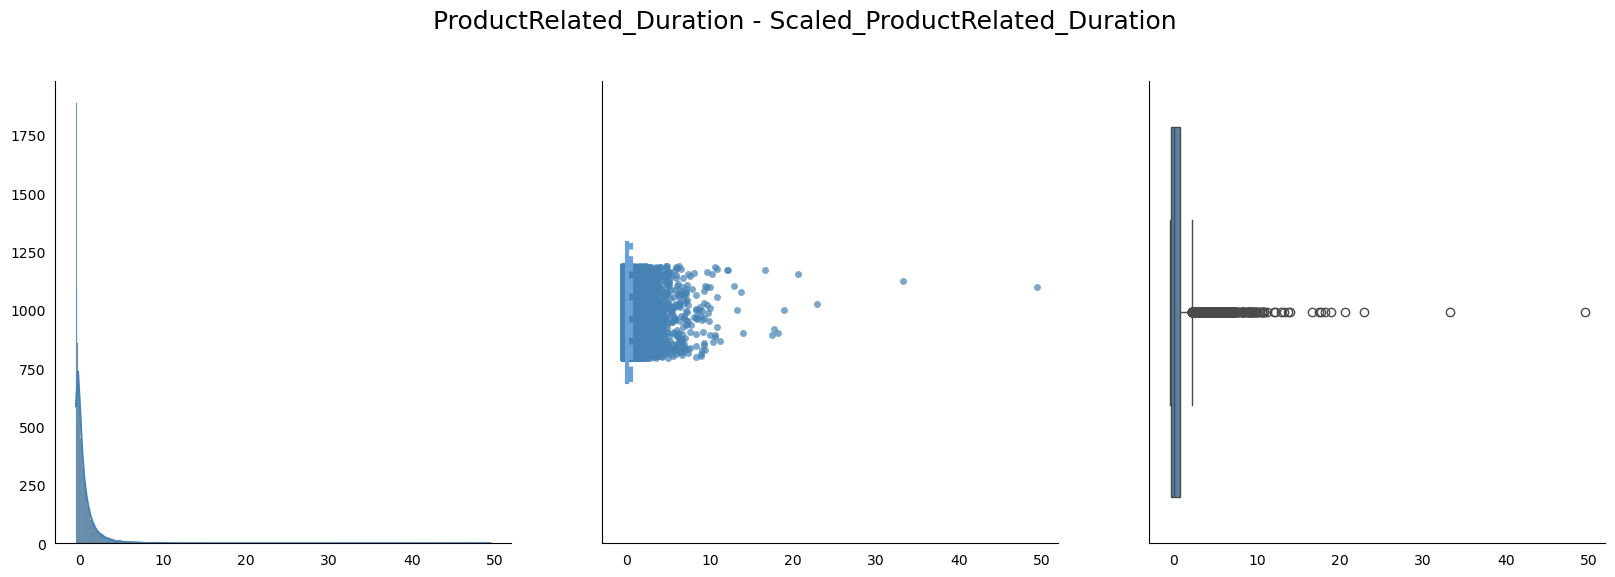

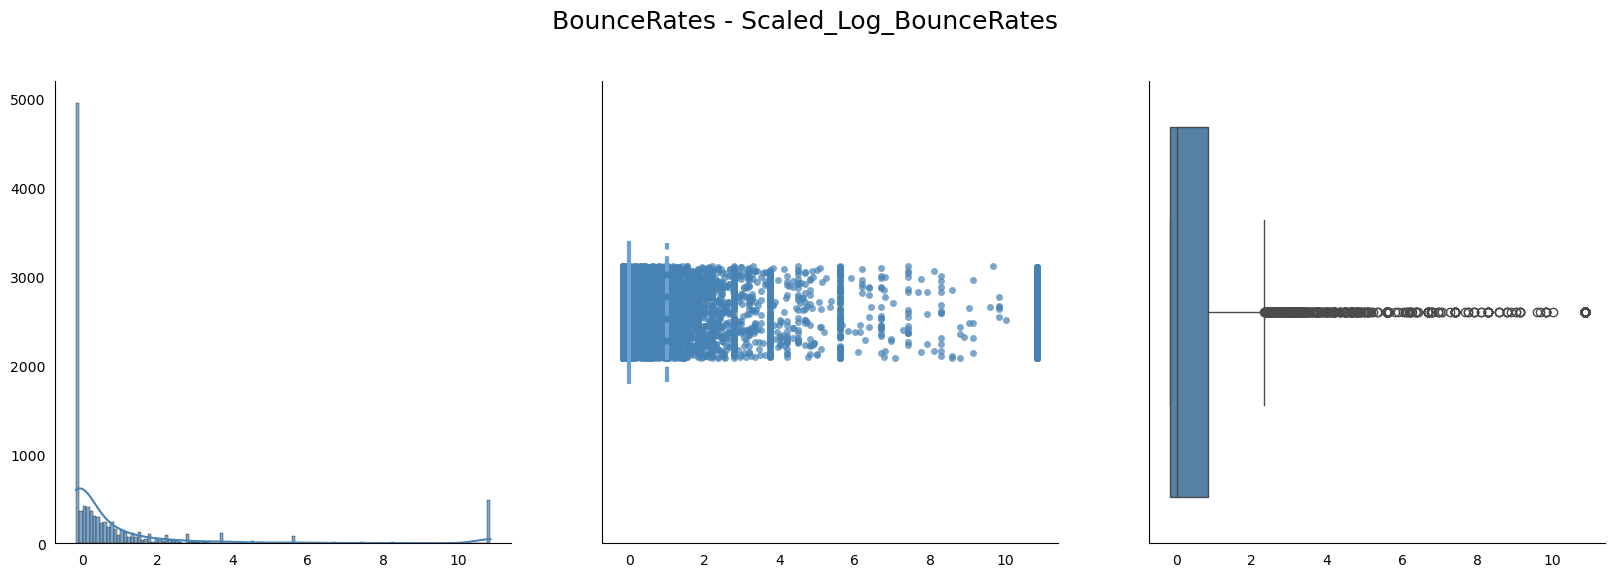

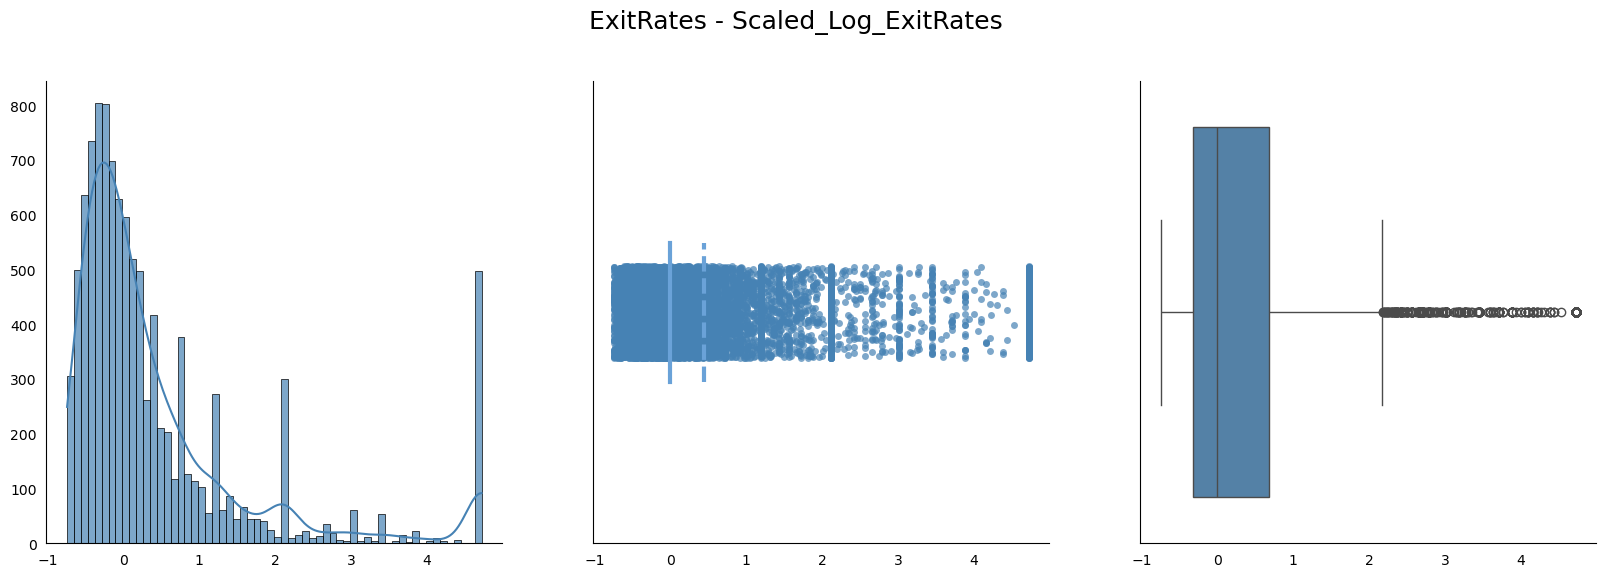

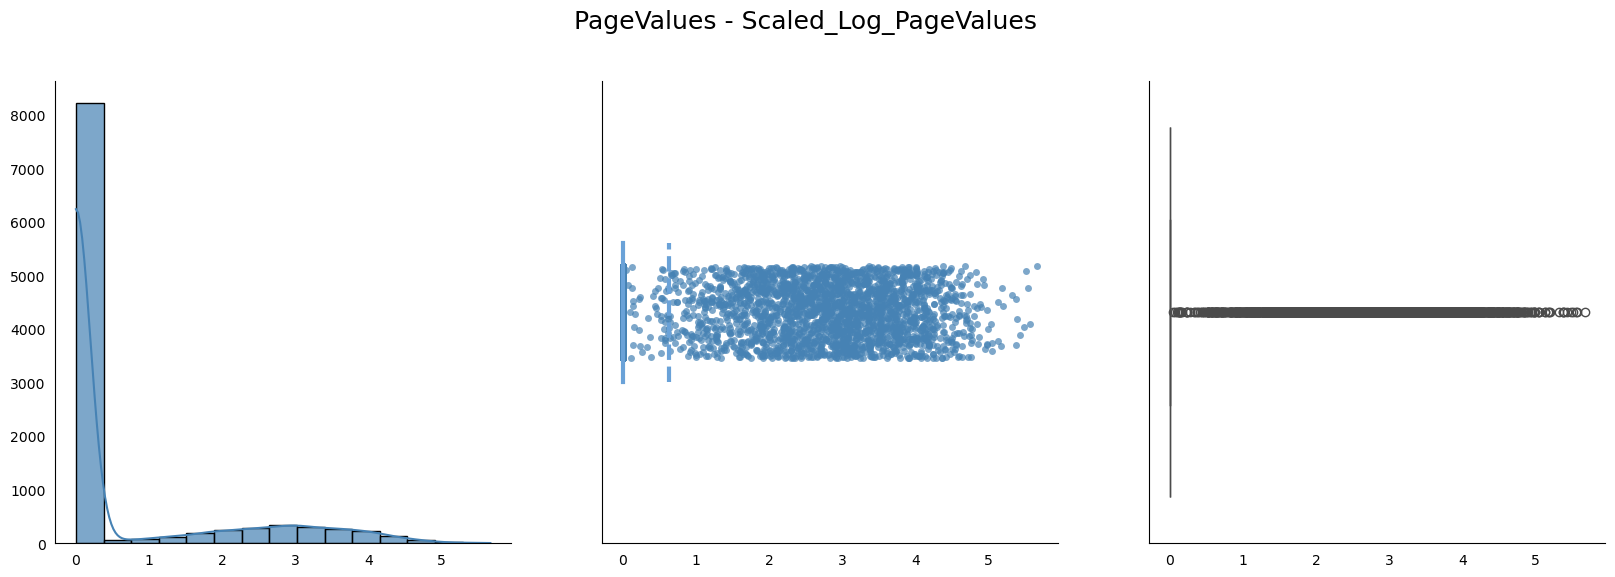

In [28]:
# Set the color palette
sns.set_palette(sns.color_palette(["steelblue"]))

engineered_features = {
    'Administrative_Duration': 'Scaled_Log_Administrative_Duration',
    'Informational_Duration': 'Scaled_Log_Informational_Duration',
    'ProductRelated': 'Scaled_ProductRelated',
    'ProductRelated_Duration': 'Scaled_ProductRelated_Duration',
    'BounceRates': 'Scaled_Log_BounceRates',
    'ExitRates': 'Scaled_Log_ExitRates',
    'PageValues': 'Scaled_Log_PageValues'
}

# Iterating over features for visualization
for feature, engineered_feature in engineered_features.items():
    if len(df_temp[engineered_feature].unique()) > 25:  # Condition for continuous features
        fig, ax = plt.subplots(1, 3, figsize=(20, 6))

        # Plots
        sns.histplot(data=df_temp[engineered_feature], ax=ax[0], kde=True, alpha=0.7)
        sns.stripplot(x=df_temp[engineered_feature], ax=ax[1], alpha=0.7)
        sns.boxplot(x=df_temp[engineered_feature], ax=ax[2])

        # Stripplot median and mean line
        median = df_temp[engineered_feature].median()
        mean = df_temp[engineered_feature].mean()
        ax[1].axvline(x=median, color='#6AA2D8', linestyle='-', linewidth=3, ymin=0.35, ymax=0.65, zorder=3)  # median
        ax[1].axvline(x=mean, color='#6AA2D8', linestyle='--', linewidth=3, ymin=0.35, ymax=0.65, zorder=3)   # mean

        # Title entire figure
        fig.suptitle(f"{feature} - {engineered_feature}", fontsize=18, y=1)

        # Hide ticks while keeping labels
        ax[0].tick_params(bottom=False)
        ax[1].tick_params(bottom=False)
        ax[2].tick_params(bottom=False)
        ax[0].tick_params(left=False)
        ax[1].tick_params(left=False)
        ax[2].tick_params(left=False)

        # Hide x and y labels
        ax[0].set(xlabel=None, ylabel=None)
        ax[1].set(xlabel=None, ylabel=None)
        ax[2].set(xlabel=None, ylabel=None)

        sns.despine()

# Delete df_temp to free memory
del df_temp

### Categorical Features Frequencies
Several categorical features contain sparse categories, limiting the utility of these specific subcategories for predictions. Notably, the target variable and many features display significant imbalance, underscoring the need for strategic handling in modeling.

| Feature                 | Category Frequencies                                    | Sparse Subcategories    | Encoding Technique                    |
|-------------------------|---------------------------------------------------------|-------------------------|---------------------------------------|
| SpecialDay              | Highly imbalanced, majority have 0.0 special day value  | No                      | One-Hot Encoding or Ordinal Encoding  |
| Month                   | Relatively balanced, higher in Mar, May and Nov         | No                      | One-Hot Encoding or Ordinal Encoding  |
| VisitorType             | Highly imbalanced, majority are Returning_Visitor       | No                      | One-Hot Encoding                      |
| Administrative          | Imbalanced, majority in 0                               | Yes                     | One-Hot Encoding                      |
| Informational           | Highly imbalanced, majority have 0 informational pages  | Yes                     | One-Hot Encoding                      |
| OperatingSystems        | Imbalanced, majority use OS 2                           | Yes                     | One-Hot Encoding                      |
| Browser                 | Imbalanced, majority use Browser 2 and 1                | Yes                     | One-Hot Encoding                      |
| Region                  | Imbalanced, majority from Region 1                      | No                      | One-Hot Encoding                      |
| TrafficType             | Imbalanced, majority are TrafficType 1, 2 or 3          | Yes                     | One-Hot Encoding                      |
| Weekend                 | Imbalanced, majority are not during weekend             | No                      | One-Hot Encoding                      |
| Revenue                 | Imbalanced, majority did not generate revenue           | No                      | Target variable                       |

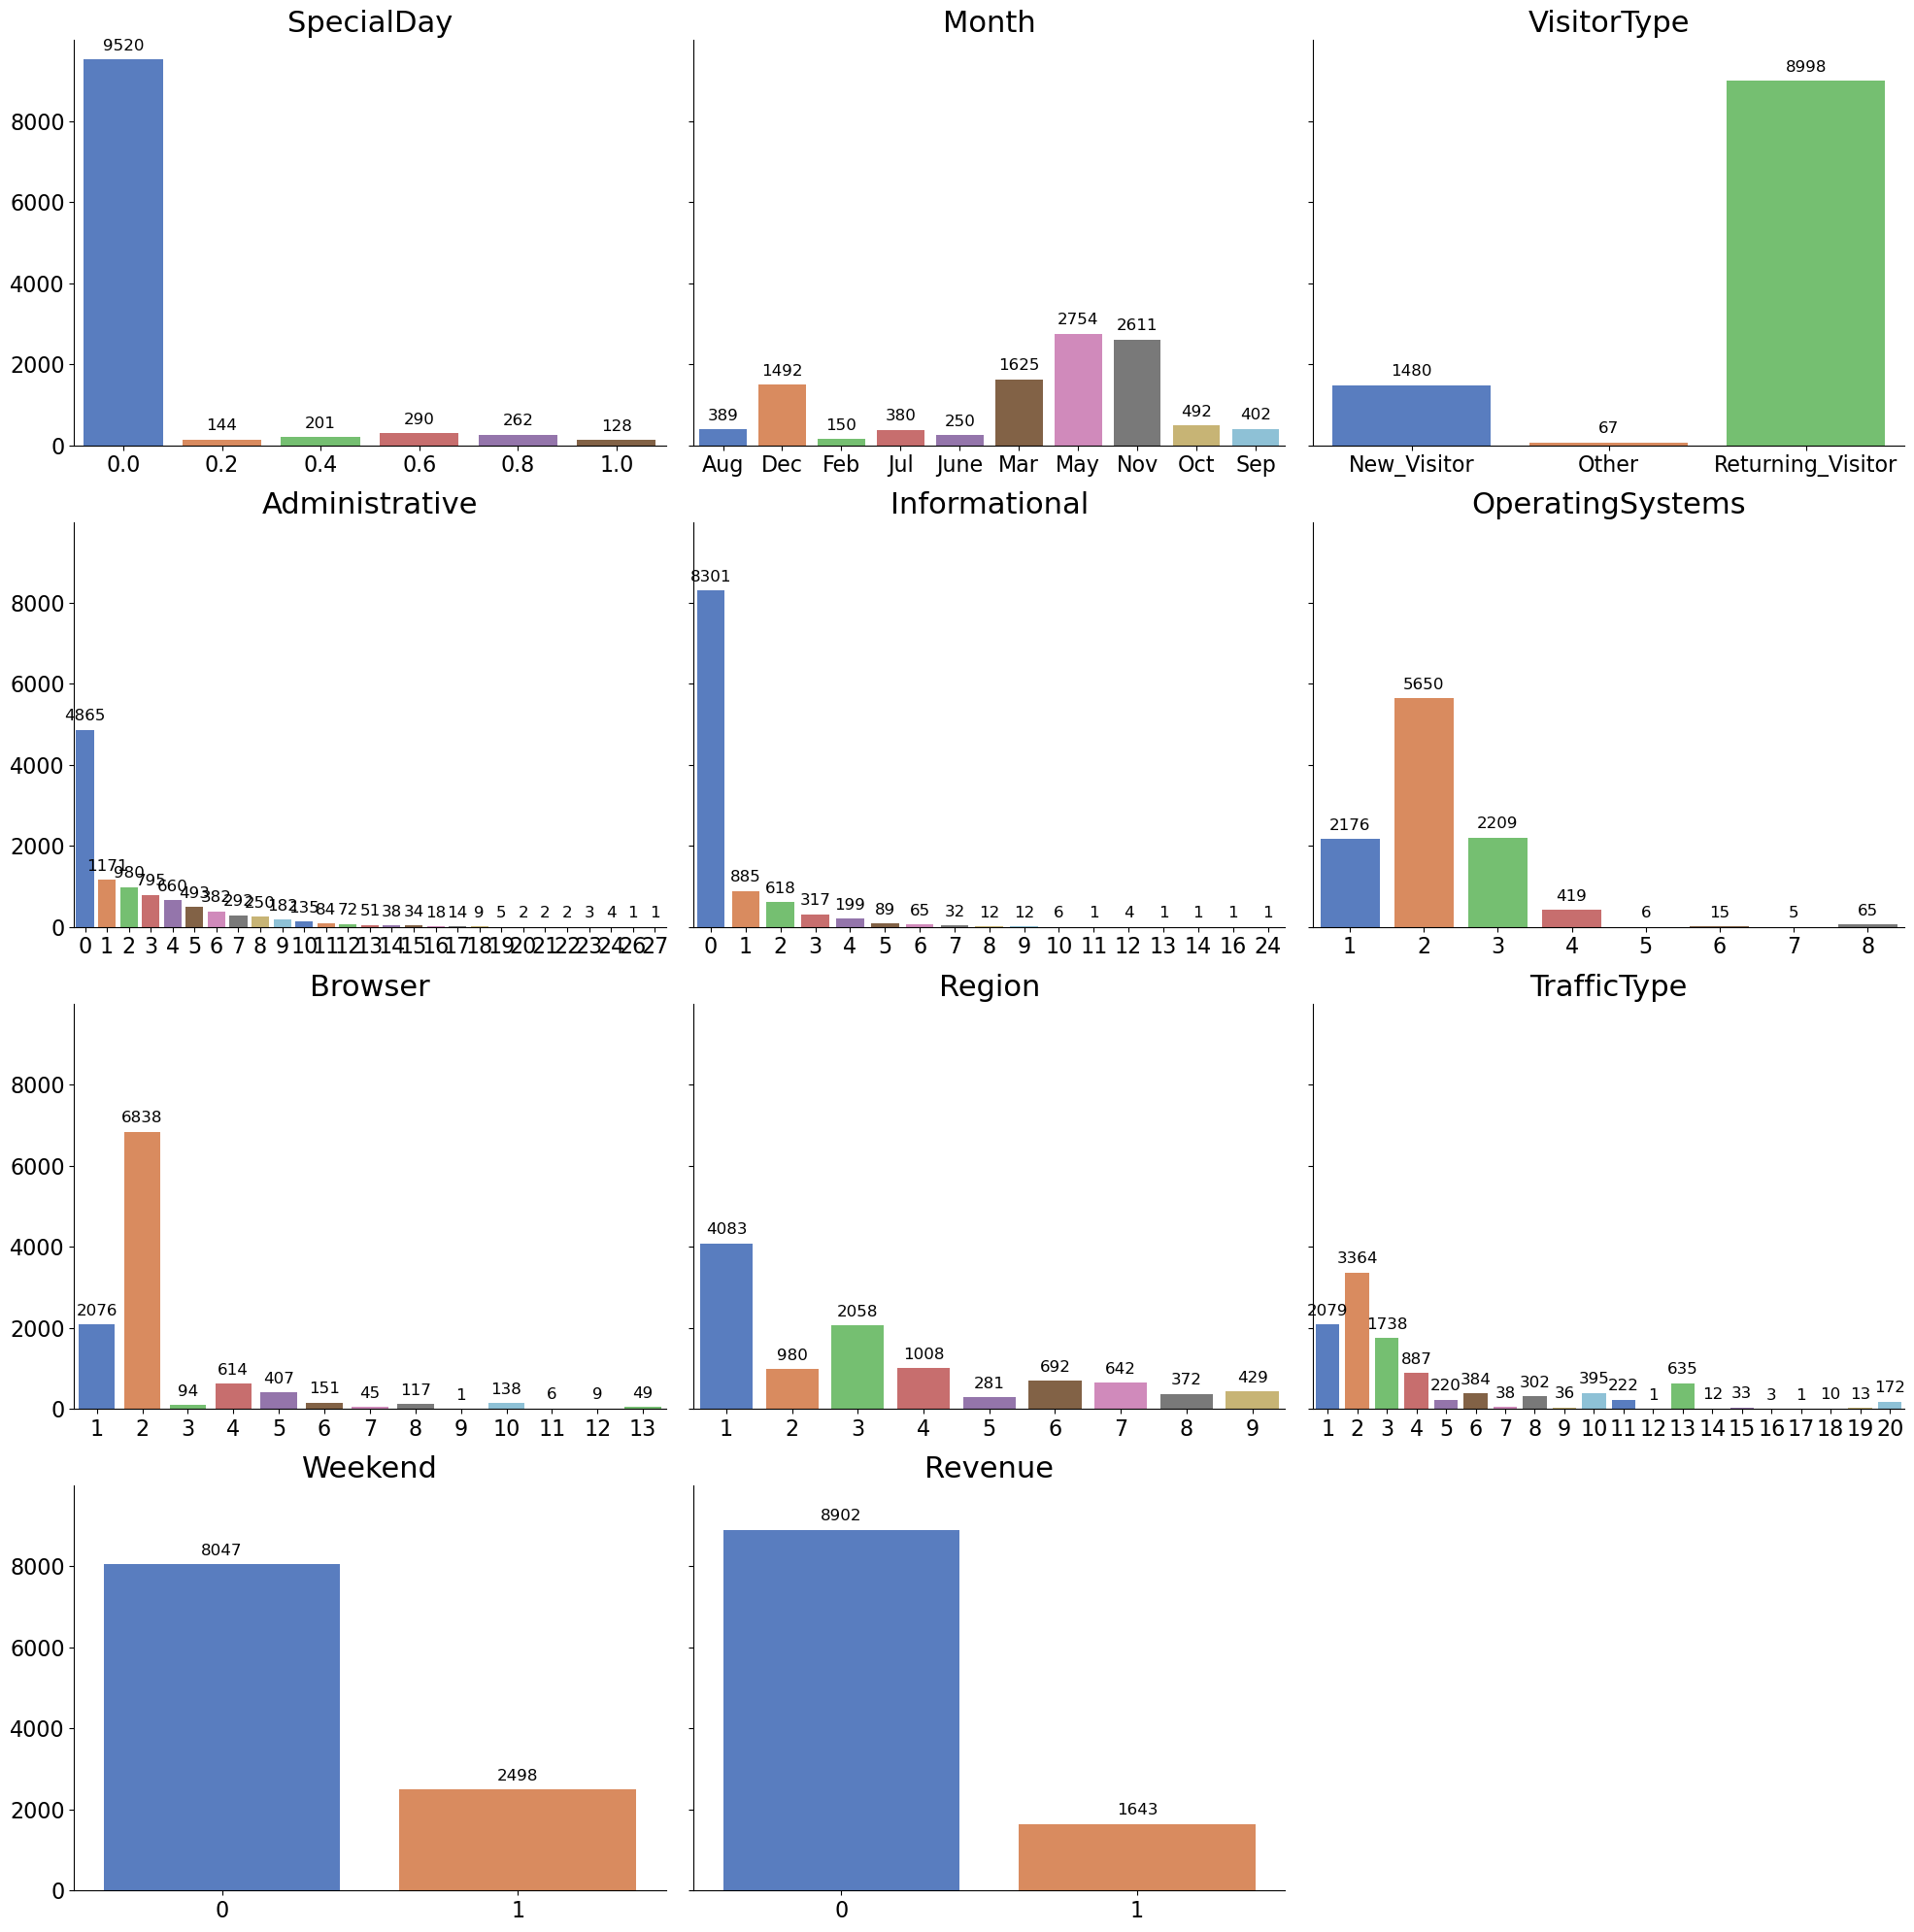

In [29]:
# Display feature frequencies using custom function
categorical_features = goose.plot_categorical_features(df)

### Correlation Analysis
#### Correlation Matrix
- Independent variable `PageValues`is moderately correlated with dependent variable `Revenue`.
- The high positive correlation between the following features suggests redundancy, indicating potential collinearity:
    - `ProductRelated` and `ProductRelated_Duration`
    - `ExitRates` and `BounceRates`
- For `Month`, `SpecialDay`, and `Weekend`, one would presume a correlation. The absence of correlation suggests a missed opportunity to leverage special holidays, such as Black Friday and Christmas, by offering discounts and other promotions.


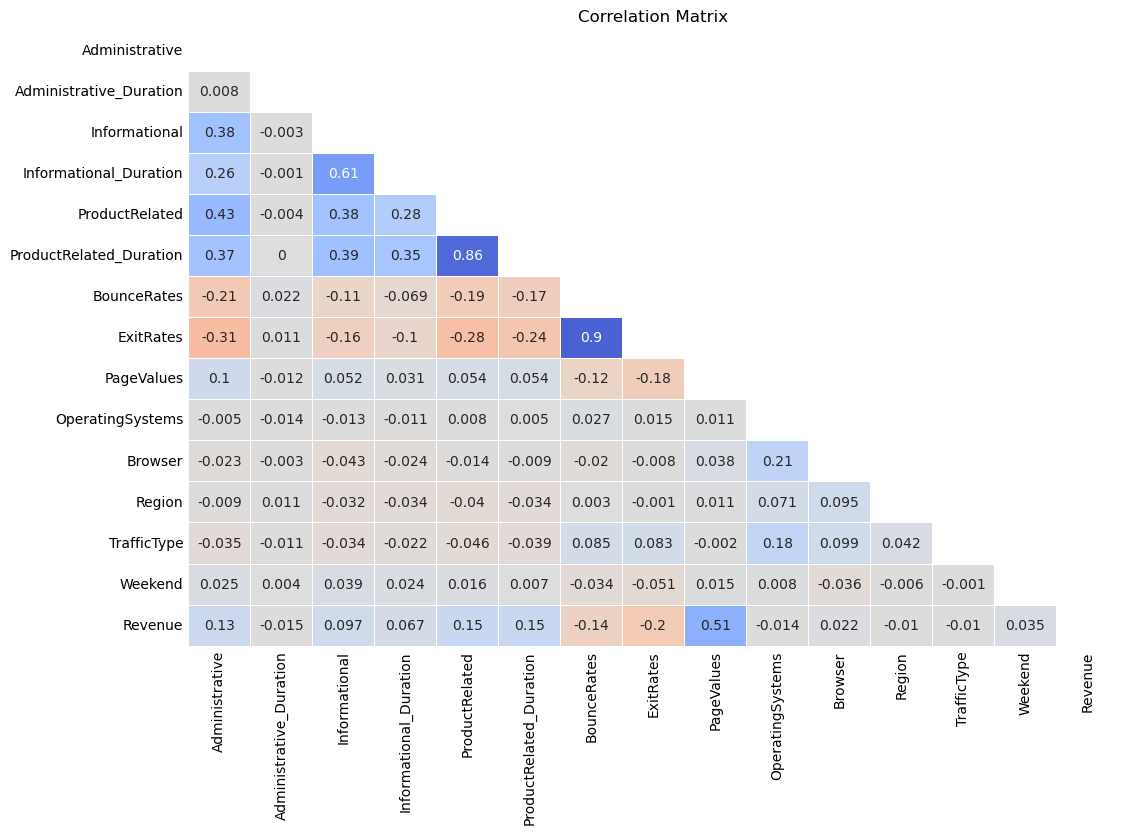

In [30]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True).round(3), mask=np.triu(df.corr(numeric_only=True)), annot=True, cmap="coolwarm_r", cbar=None, vmin=-1, vmax=+1, center=0, linewidths=.5)
plt.title('Correlation Matrix')
plt.tick_params(axis='both', length=0)
plt.show()

#### Feature Correlation and Conversion Analysis
- The strong correlation between `ExitRates` and `BounceRates`, highlighted in the correlation matrix, persists in this analysis.
- Additionally, there's a noticeable trend: as `PageValues` increase, the proportion of customers bouncing decreases. This suggests successful conversion rate optimization (CRO) efforts, positively impacting user engagement and site performance. In other words, as users engage more with the content by clicking around, their likelihood of bouncing decreases.
- However, a cluster of high `PageValues` coincides with lower `ProductRelated` counts, suggesting potential for improving conversion rates. This trend implies that as users explore more product pages, they tend to move away from those driving revenue. Enhancing user engagement to align with higher `PageValues` could involve transitioning to a scrolling-based interface or making better recommendations. However, further investigation is warranted to fully understand this trend's implications for optimizing conversion rates.

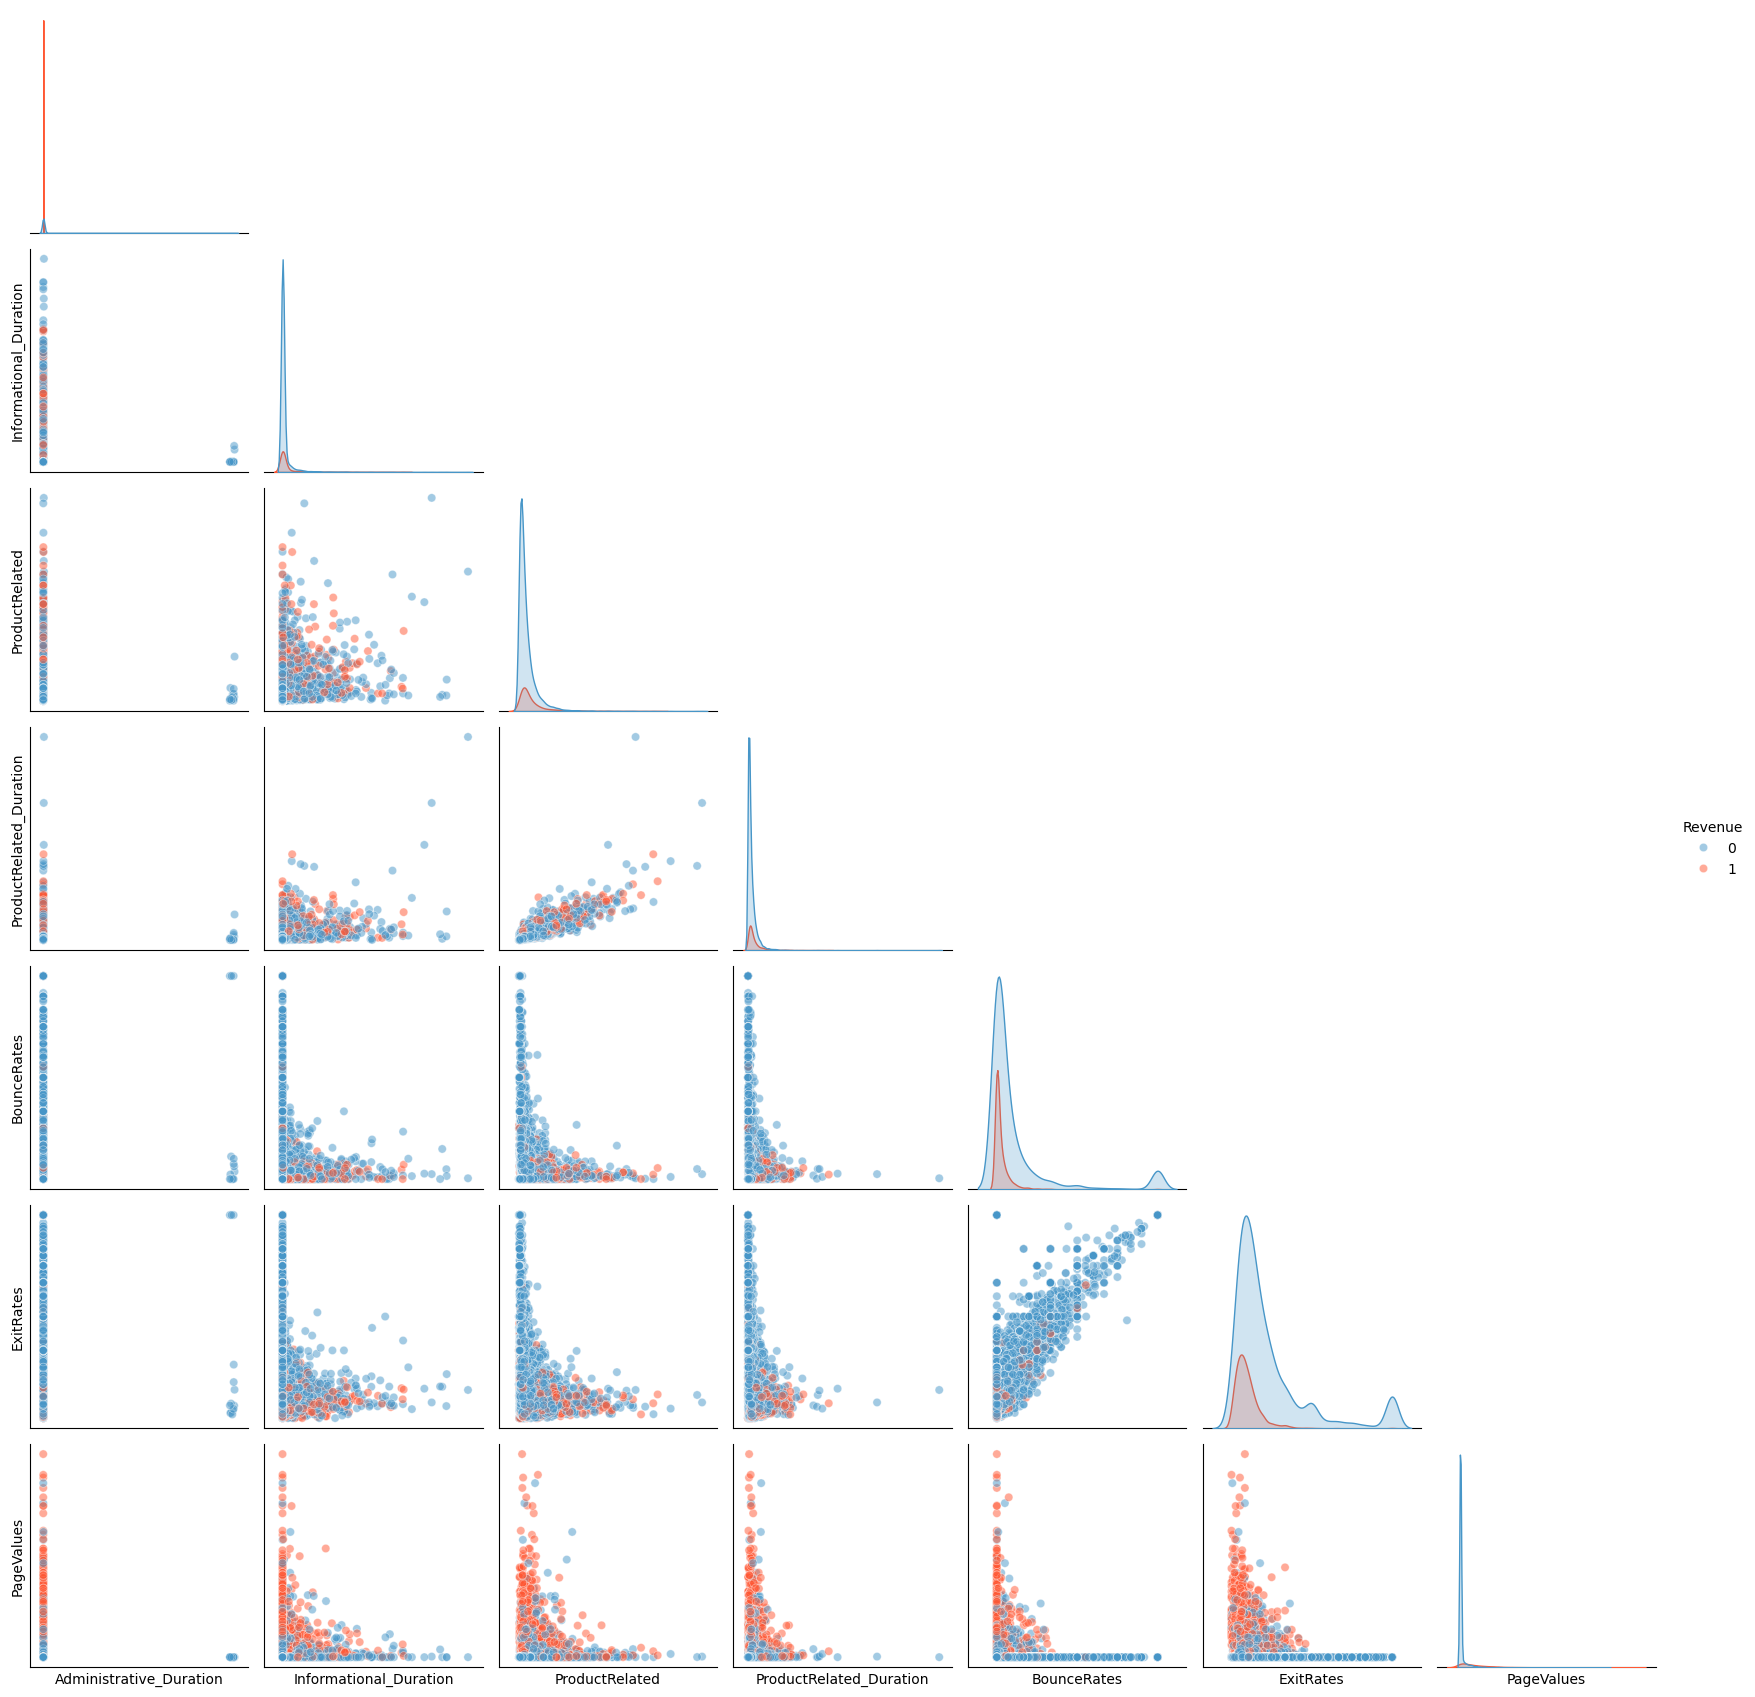

In [31]:
# Set the color palette for two categories represented in 'Revenue'
sns.set_palette(sns.color_palette(["#4796C8", "#FF5733"]))

# Create the pairplot with 'Revenue' as the hue
pairplot = sns.pairplot(data=df[continuous_features + ['Revenue']], corner=True, hue='Revenue', plot_kws={'alpha': 0.5})

# Loop through axes; remove the ticks
for ax in pairplot.axes.flatten():
    if ax:
        ax.set_xticks([])
        ax.set_yticks([])    
plt.show()

### Conversions by Visitor Type
New visitors convert at 25%, higher than the 14% for returning visitors, indicating room for improving engagement and conversion among the latter. While returning customers may not convert at every visit, we acknowledge that their loyalty drives long-term revenue growth. Implementing targeted campaigns and offers could boost engagement, as suggested earlier. However, previous analysis suggests ineffective implementation of these strategies.

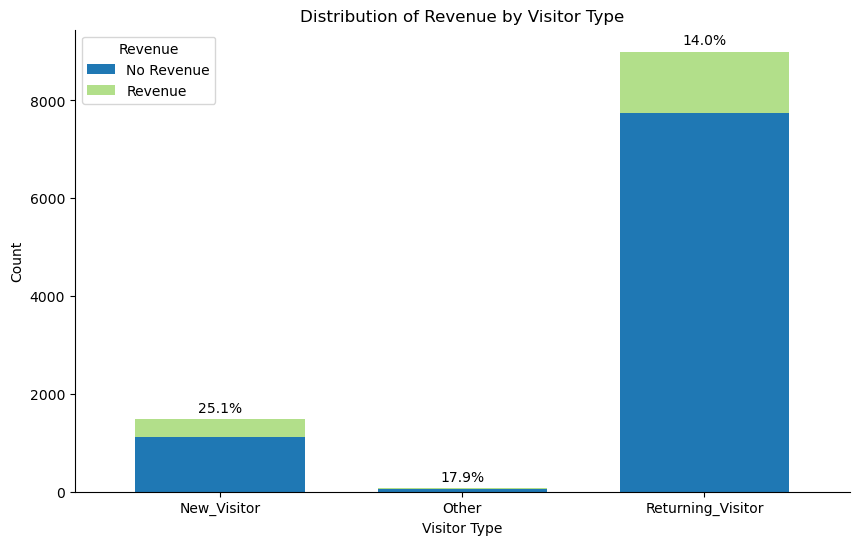

In [32]:
# Group by 'VisitorType' and calculate the count of 'Revenue' for each category
revenue_counts = df.groupby(['VisitorType', 'Revenue']).size().unstack()

# Plotting the stacked bar plot
ax = revenue_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette("Paired")[1:3], width=0.7)
plt.title('Distribution of Revenue by Visitor Type')
plt.xlabel('Visitor Type')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Revenue', labels=['No Revenue', 'Revenue'])

# Annotate with percentage of revenue
total_per_category = revenue_counts.sum(axis=1)
for i in range(len(revenue_counts)):
    total = total_per_category[i]
    count = revenue_counts.iloc[i, 1]  # Revenue count
    percentage = count / total * 100 if total > 0 else 0
    ax.annotate(f'{percentage:.1f}%', xy=(i, total), xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom', color='black', fontsize=10)
sns.despine()



### Special Days and Conversion Trends
`SpecialDays` indicates proximity with notable dates such as holidays, Mother's Day and similar occasions. Interestingly, a significant portion of conversions happens exactly on these special days, as "0.0" in the graph illustrates this immediacy. Concurrently, the majority of visits also transpire on these occasions, underscoring a pattern where customers prefer to shop on the day itself rather than beforehand. This insight suggests an area ripe for strategy refinement.

Many retailers use special days for promotions, often beginning well in advance. For example, despite "Black Friday" marking a peak in sales, it's the preceding "Black Week" and subsequent "Cyber Monday" that have become increasingly profitable. Our analysis suggests a substantial opportunity for boosting pre-event engagement. By tailoring marketing strategies to extend offers before these key dates, businesses stand to gain considerably.

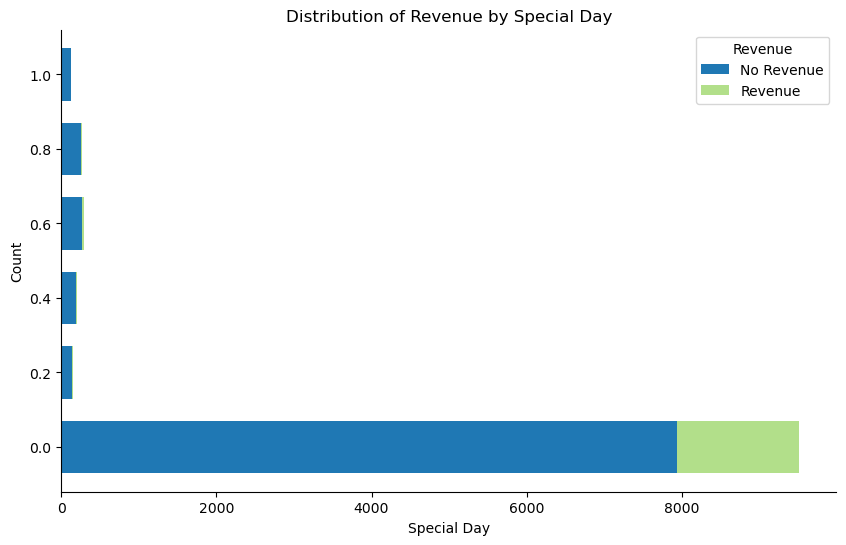

In [33]:
# Group by 'SpecialDay' and calculate the count of 'Revenue' for each category
revenue_counts = df.groupby(['SpecialDay', 'Revenue']).size().unstack()

# Plotting the stacked bar plot
ax = revenue_counts.plot(kind='barh', stacked=True, figsize=(10, 6), color=sns.color_palette("Paired")[1:3], width=0.7)
plt.title('Distribution of Revenue by Special Day')
plt.xlabel('Special Day')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Revenue', labels=['No Revenue', 'Revenue'])
sns.despine()

### Revenue by Weekend
There are three times as many visitors during weekdays compared to weekends; however, the conversion rate is slightly higher during weekends.

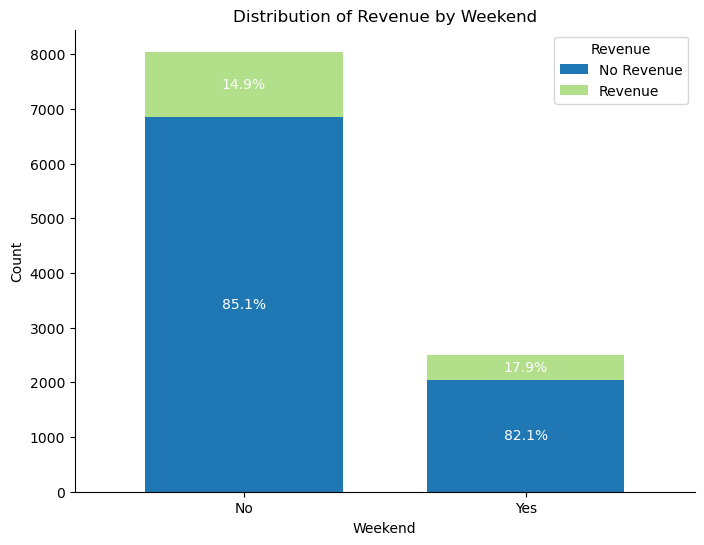

In [34]:
# Group by 'Weekend' and calculate the count of 'Revenue' for each category
revenue_counts = df.groupby(['Weekend', 'Revenue']).size().unstack()

# Plotting the stacked bar plot
ax = revenue_counts.plot(kind='bar', stacked=True, figsize=(8, 6), color=sns.color_palette("Paired")[1:3], width=0.7)
plt.title('Distribution of Revenue by Weekend')
plt.xlabel('Weekend')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.legend(title='Revenue', labels=['No Revenue', 'Revenue'])

# Calculate the percentage of revenue for each category
total_per_category = revenue_counts.sum(axis=1)
for i in range(len(revenue_counts)):
    total = total_per_category[i]
    for j in range(len(revenue_counts.columns)):
        count = revenue_counts.iloc[i, j]
        percentage = count / total * 100 if total > 0 else 0
        ax.annotate(f'{percentage:.1f}%', xy=(i, revenue_counts.iloc[i, :j].sum() + count / 2),
                    xytext=(0, 0), textcoords='offset points',
                    ha='center', va='center', color='white', fontsize=10)

sns.despine()

## Metrics for Precise Customer Conversion

### Goal
The primary objective, as stated in the assignment, is to understand what constitutes a good user experience by identifying the customers who actually convert and make purchases. The aim is to analyze historical data to profile the characteristics and behaviors of converting customers.

In short, the task at hand is to build a model that accurately identifies the converting customers based on historical data.

### Metric Considerations

Given the goal of understanding the profile of converting customers, the following metrics are crucial:

1. **Precision for Class 1 (Buyers)**: Optimizing precision ensures that the model correctly identifies the customers who are most likely to convert, minimizing false positives. This helps in building an accurate profile of the converting customers.

2. **Recall for Class 1 (Buyers)**: While precision is the primary focus, recall is still important to ensure that the model captures a sufficient number of converting customers for analysis. A balance between precision and recall is necessary to obtain a comprehensive understanding of the converting customer profile.

Accuracy, while important, may not be the most critical metric in this scenario, especially since the classes are imbalanced.

### Prioritizing Precision for Customer Profiling

In the context of understanding the converting customer profile, precision takes precedence over other metrics. By prioritizing precision, the model focuses on correctly identifying the customers who are most likely to convert, minimizing the inclusion of non-converting customers in the profile.

High precision ensures that the insights gained from the analysis are based on a reliable and accurate understanding of the converting customer profile. This allows the company to:

1. Identify the key characteristics, behaviors, and factors that differentiate converting customers from non-converting ones.
2. Gain a clear understanding of what constitutes a good user experience for their specific customer base.
3. Make data-driven decisions on how to optimize their website, products, and marketing strategies to cater to the preferences and needs of the converting customers.

### Balancing Precision and Recall

While precision is the primary focus, it's important to strike a balance with recall to ensure that the model captures a sufficient number of converting customers for analysis. Monitoring the recall-score helps in achieving this balance.

The company should evaluate the trade-off between precision and recall and determine an acceptable level of false positives that still allows for meaningful insights. Iterating and refining the model based on the results and business objectives can help in finding the right balance.

### Recommendation

The recommendation is to prioritize precision when building the model to understand the converting customer profile. By focusing on precision, the company can gain accurate insights into the characteristics and behaviors of customers who are most likely to convert.

However, it's important to monitor the recall-score and ensure that the model also captures a sufficient number of converting customers for a comprehensive analysis. Striking the right balance between precision and recall will enable the company to make informed decisions and develop strategies that cater to the needs and preferences of their high-value customers, ultimately improving the overall user experience and driving more conversions.

## Data Split
To prepare for modeling, we'll divide the dataset into distinct subsets for training, validation, and testing purposes.

In [35]:
# Splits data into train, validation, test and combined train+validation sets for modeling
X_train, y_train, X_val, y_val, X_test, y_test, X_train_val, y_train_val = goose.split_data(df, "Revenue", verbose=True)

Data split complete

Training set: (7385, 17) (7385,)
Validation set: (1578, 17) (1578,)
Test set: (1582, 17) (1582,)
Combined Training and Validation set: (8963, 17) (8963,)


## Establishing a Baseline Model

To set a benchmark for future model comparisons, we'll begin with Logistic Regression—a simple and interpretable model. Here's why:

- **Quick Implementation**: It's fast to train, providing an immediate benchmark for performance.
- **Clarity of Insights**: The model's interpretability helps us understand which features are most influential in predicting outcomes.
- **Benchmark for Comparison**: This initial model will act as a reference, helping to quantify the benefits of more advanced models explored later.

Starting with Logistic Regression ensures any additional model complexity is warranted by significant performance gains.

### Baseline Model Architecture
When developing our baseline model, we aim to simplify the process somewhat. We'll avoid employing the entire array of techniques such as sampling methods or imputing missing values. However, we will allow for the application of transformations to ensure more manageable distributions and to address outliers to a certain extent. This strategy allows us to assess the effects of feature transformations before advancing to model selection, intricate hyperparameter tuning, and experimenting with the aforementioned preprocessing techniques.

### Baseline Model Performance

Implementing feature transformations have resulted in a markedly improved model on the validation data, boosting the recall score by 22 percentage points from 0.36 to 0.58, while precision remains identical at 0.71. With some quick tuning inherent to Logistic Regression, we managed to increase the recall to 0.59. Hence, we will define our baseline as:

- Precision-score: 0.71
- Recall-score: 0.59

Given our goal of precisely identifying and profiling converting customers, our primary emphasis will be on enhancing precision. Subsequently, we will work to improve recall, ensuring we capture a broad enough group of actual converters. This strategy is devised to not only challenge but also surpass the baseline model, thereby enabling a more precise analysis of customer conversion patterns.

### Baseline Model Hypothesis

- **Null Hypothesis (H0):** The baseline model (Logistic Regression) performs equally well compared to advanced models yet to be determined.
- **Alternative Hypothesis (H1):** There is a significant difference in performance between the baseline model and at least one of the alternative models.

#### Logistic Regression with Basic Scalers
We fit the model without performing log transformations; instead, we are applying a robust scaler to all continuous features. We employ the standard OneHotEncoder for categorical data, aligning with previously established encoding methods. While certain features may appear ordinal, we forego specific ordinal transformations because the values inherently reflect an ordinal nature, or in cases like 'Month', where such transformations have not improved the model's performance.

Classification Report (Training):
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6234
           1       0.76      0.40      0.53      1151

    accuracy                           0.89      7385
   macro avg       0.83      0.69      0.73      7385
weighted avg       0.88      0.89      0.87      7385


Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1332
           1       0.71      0.36      0.48       246

    accuracy                           0.88      1578
   macro avg       0.80      0.67      0.70      1578
weighted avg       0.86      0.88      0.86      1578



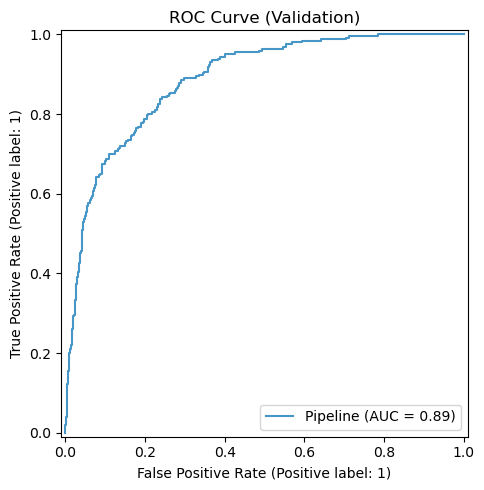

In [36]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler, OneHotEncoder, FunctionTransformer

# Instantiate scaler
scaler = RobustScaler()

# Numerical transformers
robust_transformer = make_pipeline(scaler)
log_transformer = make_pipeline(FunctionTransformer(np.log1p), scaler)
sqrt_transformer = make_pipeline(FunctionTransformer(np.sqrt), scaler)

# Categorical transformers
onehot_transformer = make_pipeline(OneHotEncoder(drop='if_binary', handle_unknown='ignore', dtype=int))

# Feature specific transformers
transformers = [
    (robust_transformer, ['Administrative_Duration', 'ProductRelated', 'ProductRelated_Duration', 'Informational_Duration', 'BounceRates', 'ExitRates', 'PageValues']),
    (log_transformer, []),
    (sqrt_transformer, []),
    (onehot_transformer, ['VisitorType', 'Informational', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 'Month', 'SpecialDay']),
]

# Combine transformers
basic_preprocessor = make_column_transformer(*transformers)

# Set the seed for reproducibility
random_state = 42

# Instantiate estimator
log_model = LogisticRegression(random_state=random_state)

# Pipeline creation
log_pipe_basic = make_pipeline(basic_preprocessor, log_model)

# Train model
log_pipe_basic.fit(X_train, y_train)

# Display report and roc-curve from custom functions
goose.display_classification_report(log_pipe_basic, X_train, y_train, X_val, y_val, data_to_display='both')
goose.display_roc_curve(log_pipe_basic, X_train, y_train, X_val, y_val, data_to_display='validation')

#### Logistic Regression with Feature Transformations
The updated baseline model, leveraging feature transformations, demonstrates a consistent precision of 0.71 and an enhanced recall of 0.59 on validation data.

Classification Report (Training):
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      6234
           1       0.71      0.54      0.62      1151

    accuracy                           0.89      7385
   macro avg       0.82      0.75      0.78      7385
weighted avg       0.89      0.89      0.89      7385


Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1332
           1       0.71      0.59      0.64       246

    accuracy                           0.90      1578
   macro avg       0.82      0.77      0.79      1578
weighted avg       0.89      0.90      0.89      1578



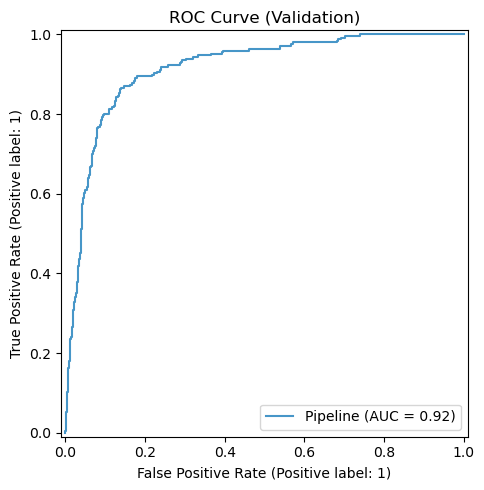

In [37]:
# Feature specific transformers
transformers = [
    (robust_transformer, ['ProductRelated', 'ProductRelated_Duration']),
    (log_transformer, ['Administrative_Duration', 'Informational_Duration', 'BounceRates', 'ExitRates', 'PageValues']),
    (sqrt_transformer, []),
    (onehot_transformer, ['VisitorType', 'Informational', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 'Month', 'SpecialDay']),
]

# Combine transformers
preprocessor = make_column_transformer(*transformers)

# Instantiate estimator
log_model = LogisticRegression(solver='saga', penalty='l1', C=0.15, random_state=random_state)
#log_model = LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.8, C=0.15, random_state=random_state)

# Pipeline creation
log_pipe = make_pipeline(preprocessor, log_model)

# Train model
log_pipe.fit(X_train, y_train)

# Display report and roc-curve
goose.display_classification_report(log_pipe, X_train, y_train, X_val, y_val, data_to_display='both')
goose.display_roc_curve(log_pipe, X_train, y_train, X_val, y_val, data_to_display='validation')

## Model Selection

After applying cross-validation across a carefully selected list of classifiers and analyzing the resulting F1-scores, we deliberated on which models optimally balance explainability and performance. This process led us to select two models for further hyperparameter tuning. Below are their introductions:

**Explainable Boosting Machine (EBM)**  
EBM stands out as a glass-box model, offering a unique blend of high performance, akin to similar boosting and bagging techniques, while maintaining unparalleled interpretability and explainability. Although it didn't outperform the top contender from the model selection phase, the LightGBM Classifier, EBM emerges as a prime candidate for developing an initial model. This model can be presented to stakeholders with clarity and detailed explanation. Furthermore, EBM's comprehensive toolkit aids in providing deeper insights into customer behavior and the driving factors behind conversions, facilitating a better understanding for the board.

**LightGBM Classifier (LGBM)**  
LGBM emerged as the top-performing model during our model selection phase. While our primary objective revolves around comprehending the essence of a superior customer experience and the factors influencing their decisions, LGBM presents significant advantages. It offers a robust framework for exploring alternative solutions for future deployments, particularly when enhancing performance—and consequently boosting revenue—becomes paramount. This makes LGBM a valuable asset in our toolkit, balancing between understanding customer behavior and achieving business objectives.

In [38]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict, cross_val_score
from tqdm import tqdm
from prettytable import PrettyTable
from sklearn.metrics import get_scorer

# Model libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from interpret.glassbox import ExplainableBoostingClassifier

# Initialize preprocessor with feature-specific transformations
preprocessor = make_column_transformer(
    (robust_transformer, ['ProductRelated', 'ProductRelated_Duration']),
    (log_transformer, ['Administrative_Duration', 'Informational_Duration', 'BounceRates', 'ExitRates', 'PageValues']),
    (sqrt_transformer, []),
    (onehot_transformer, ['VisitorType', 'Informational', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 'Month', 'SpecialDay']),
)

# Combine preprocessing with classifier
classifiers = [LogisticRegression(random_state=random_state),
               RandomForestClassifier(random_state=random_state),
               SVC(random_state=random_state),
               KNeighborsClassifier(),
               GradientBoostingClassifier(random_state=random_state),
               XGBClassifier(random_state=random_state),
               LGBMClassifier(random_state=random_state, verbose=-1),
               CatBoostClassifier(allow_writing_files=False, logging_level='Silent', verbose=None, silent=None, random_seed=random_state),
               ExplainableBoostingClassifier(random_state=random_state)
]

# Define the number of folds
num_folds = 5

# Define scoring method
scoring = 'f1'

# Get the scoring function based on the scoring variable
scorer = get_scorer(scoring)

# Create a table for the results
final_results_table = PrettyTable()

# Create lists to store classifier names and mean scores (for plot, next code block)
classifier_names = []
mean_scores = []

# Dynamically create field names based on the number of folds
field_names = ["Classifier"] + [f"F{i+1}" for i in range(num_folds)] + ["Std", "Avg Score"]
final_results_table.field_names = field_names

# Loop through each classifier
for classifier in tqdm(classifiers, desc="Processing classifiers", dynamic_ncols=True):
    # Create a pipeline with preprocessing and classifier
    pipe = make_pipeline(preprocessor, classifier)

    # Perform cross-validation
    scores = cross_val_score(pipe, X_train_val, y_train_val, cv=num_folds, scoring=scoring)
    mean_score = np.mean(scores)
    std_dev = np.std(scores)

    # Add classifier name and mean score to their respective lists
    classifier_names.append(classifier.__class__.__name__)
    mean_scores.append(mean_score)

    # Format the results
    scores_formatted = ["{:.3f}".format(score) for score in scores]
    mean_score_formatted = "{:.3f}".format(mean_score)
    std_dev_formatted = "{:.3f}".format(std_dev)

    # Add the results to the table
    final_results_table.add_row([classifier.__class__.__name__] + scores_formatted + [std_dev_formatted, mean_score_formatted])

# Sort results by mean score in descending order
final_results_table.sortby = "Avg Score"
final_results_table.reversesort = True

# Print the results
print(final_results_table)

Processing classifiers: 100%|████████████████████████████████████████████████████████████| 9/9 [01:18<00:00,  8.68s/it]

+-------------------------------+-------+-------+-------+-------+-------+-------+-----------+
|           Classifier          |   F1  |   F2  |   F3  |   F4  |   F5  |  Std  | Avg Score |
+-------------------------------+-------+-------+-------+-------+-------+-------+-----------+
|         LGBMClassifier        | 0.654 | 0.644 | 0.633 | 0.619 | 0.669 | 0.017 |   0.644   |
|   GradientBoostingClassifier  | 0.661 | 0.641 | 0.620 | 0.623 | 0.650 | 0.016 |   0.639   |
| ExplainableBoostingClassifier | 0.659 | 0.644 | 0.592 | 0.612 | 0.667 | 0.029 |   0.635   |
|       CatBoostClassifier      | 0.659 | 0.635 | 0.617 | 0.613 | 0.649 | 0.018 |   0.635   |
|              SVC              | 0.635 | 0.646 | 0.614 | 0.604 | 0.654 | 0.019 |   0.631   |
|         XGBClassifier         | 0.621 | 0.624 | 0.604 | 0.607 | 0.625 | 0.009 |   0.616   |
|       LogisticRegression      | 0.650 | 0.609 | 0.596 | 0.561 | 0.641 | 0.032 |   0.611   |
|     RandomForestClassifier    | 0.577 | 0.620 | 0.578 | 0.

## Model Tuning

### Explainable Boosting Classifier (EBM)
Following meticulous tuning, we've increased the generalizability of the model while also improving the raw performance and enhancing both precision and recall by two percentage points over the model's default hyperparameters, leading to the ensuing scores on the validation dataset:
- Precision: 0.69
- Recall: 0.61
- AUC: 93

While EBM shows a minor dip in precision compared to the baseline model, there's an uptick in recall. Although any reduction in our key metric isn't ideal, it's important to note that we haven't yet explored sampling techniques to address the target variable's imbalance or implemented imputation for missing values. These forthcoming strategies may further refine our model's performance, offering room for optimization in both precision and recall.

+--------------------------------------------------------------------------+
|               ExplainableBoostingClassifier Tuning Results               |
+-------------------------------------------------------------+------------+
|                          Parameter                          |   Value    |
+-------------------------------------------------------------+------------+
|        explainableboostingclassifier__cyclic_progress       |    0.7     |
|     explainableboostingclassifier__early_stopping_rounds    |     50     |
|         explainableboostingclassifier__greedy_ratio         |    1.5     |
|          explainableboostingclassifier__inner_bags          |     50     |
| explainableboostingclassifier__interaction_smoothing_rounds |     0      |
|         explainableboostingclassifier__interactions         |    0.95    |
|         explainableboostingclassifier__learning_rate        |    0.01    |
|           explainableboostingclassifier__max_bins           |    5000    |

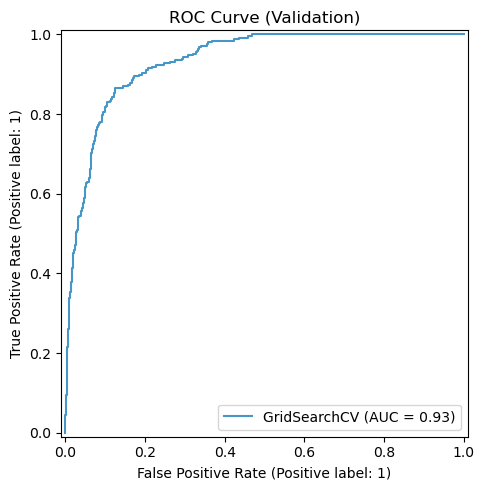

In [39]:
# Hyperparameters for EBMClassifier
param_grid = {
    'explainableboostingclassifier__cyclic_progress': [0.7],            # ✅
    'explainableboostingclassifier__early_stopping_rounds': [50],       # ✅
    'explainableboostingclassifier__greedy_ratio': [1.5],               # ✅
    'explainableboostingclassifier__inner_bags': [50], # [0, 50] 50x      🔥
    'explainableboostingclassifier__interaction_smoothing_rounds': [0], # ✅
    'explainableboostingclassifier__interactions': [0.95],              # ✅
    'explainableboostingclassifier__learning_rate': [0.01],             # ✅
    'explainableboostingclassifier__max_bins': [5000],                  # ✅
    'explainableboostingclassifier__max_interaction_bins': [32],        # ✅
    'explainableboostingclassifier__max_leaves': [4],                   # ✅
    'explainableboostingclassifier__max_rounds': [1000000000],          # ✅
    'explainableboostingclassifier__min_hessian': [0.0001],             # ✅
    'explainableboostingclassifier__min_samples_leaf': [2],             # ✅
    'explainableboostingclassifier__outer_bags': [14], # <50              ✅
    'explainableboostingclassifier__smoothing_rounds': [75],            # ✅
    'explainableboostingclassifier__validation_size': [0.2],            # ✅
}

# Initialize preprocessor with feature-specific transformations
preprocessor = make_column_transformer(
    (robust_transformer, ['ProductRelated', 'ProductRelated_Duration']),
    (log_transformer, ['Administrative_Duration', 'Informational_Duration', 'BounceRates', 'ExitRates', 'PageValues']),
    (sqrt_transformer, []),
    (onehot_transformer, ['VisitorType', 'Informational', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 'Month', 'SpecialDay']),
)

# Instantiate EBM model
ebm_model = ExplainableBoostingClassifier(random_state=random_state)

# Create pipeline
pipe = make_pipeline(preprocessor, ebm_model)

# Grid search CV
grid_ebm = GridSearchCV(estimator=pipe,
                        param_grid=param_grid,
                        cv=3,
                        scoring='f1',
                        n_jobs=-1)

# Train model
grid_ebm.fit(X_train, y_train)

# Display results and ROC curve
goose.display_search_results(grid_ebm, X_train, y_train, X_val, y_val)
goose.display_roc_curve(grid_ebm, X_train, y_train, X_val, y_val, data_to_display='validation')


#### Tuning Log

**Round 7**
- Final round
- 4 min run time
```python
+--------------------------------------------------------------------------+
|               ExplainableBoostingClassifier Tuning Results               |
+-------------------------------------------------------------+------------+
|                          Parameter                          |   Value    |
+-------------------------------------------------------------+------------+
|        explainableboostingclassifier__cyclic_progress       |    0.7     |
|     explainableboostingclassifier__early_stopping_rounds    |     50     |
|         explainableboostingclassifier__greedy_ratio         |    1.5     |
|          explainableboostingclassifier__inner_bags          |     50     |
| explainableboostingclassifier__interaction_smoothing_rounds |     0      |
|         explainableboostingclassifier__interactions         |    0.95    |
|         explainableboostingclassifier__learning_rate        |    0.01    |
|           explainableboostingclassifier__max_bins           |    5000    |
|     explainableboostingclassifier__max_interaction_bins     |     32     |
|          explainableboostingclassifier__max_leaves          |     4      |
|          explainableboostingclassifier__max_rounds          | 1000000000 |
|          explainableboostingclassifier__min_hessian         |   0.0001   |
|       explainableboostingclassifier__min_samples_leaf       |     2      |
|          explainableboostingclassifier__outer_bags          |     14     |
|       explainableboostingclassifier__smoothing_rounds       |     75     |
|        explainableboostingclassifier__validation_size       |    0.2     |
+-------------------------------------------------------------+------------+
Classification Report - Training Set:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6234
           1       0.77      0.64      0.70      1151

    accuracy                           0.91      7385
   macro avg       0.85      0.80      0.82      7385
weighted avg       0.91      0.91      0.91      7385

Classification Report - Validation Set:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1332
           1       0.69      0.61      0.65       246

    accuracy                           0.90      1578
   macro avg       0.81      0.78      0.79      1578
weighted avg       0.89      0.90      0.89      1578
```

**Round 1**
- Started out with a trimmed version of the recommended parameters from the [official documentation](https://interpret.ml/docs/hyperparameters.html).
- This was the one scenario in this project where the computer was left to run over night.
- While there are quicker ways to accomplish this, opting for this approach ensured thorough tuning optimization.
- 10 hour run time.
```python
param_grid = {
    'explainableboostingclassifier__cyclic_progress': [0.25, 0.5, 1.0],
    'explainableboostingclassifier__early_stopping_rounds': [50],
    'explainableboostingclassifier__greedy_ratio': [1.25, 1.5, 1.75],
    'explainableboostingclassifier__inner_bags': [0], # [0, 50]
    'explainableboostingclassifier__interaction_smoothing_rounds': [0], # 50 default
    'explainableboostingclassifier__interactions': [0.95],  # [0.5, 0.75, 0.95]
    'explainableboostingclassifier__learning_rate': [0.005, 0.01, 0.02], 
    'explainableboostingclassifier__max_bins': [1024],  # [1024, 4096, 16384]
    'explainableboostingclassifier__max_interaction_bins': [32],  # [16, 32, 64]
    'explainableboostingclassifier__max_leaves': [3, 4], # [3, 4] 
    'explainableboostingclassifier__max_rounds': [25000], # [1000000000] ideal
    'explainableboostingclassifier__min_hessian': [0.0001], # [1.0, 0.01, 0.0001, 0.000001]
    'explainableboostingclassifier__min_samples_leaf': [2, 3, 4], # [2, 3, 4] 
    'explainableboostingclassifier__outer_bags': [14], # [14, 20, 30] <50 
    'explainableboostingclassifier__smoothing_rounds': [100, 200, 300], 
    'explainableboostingclassifier__validation_size': [0.1, 0.15, 0.2],      
}
+----------------------------------------------------------------------+
|             ExplainableBoostingClassifier Tuning Results             |
+-------------------------------------------------------------+--------+
|                          Parameter                          | Value  |
+-------------------------------------------------------------+--------+
|        explainableboostingclassifier__cyclic_progress       |  1.0   |
|     explainableboostingclassifier__early_stopping_rounds    |   50   |
|         explainableboostingclassifier__greedy_ratio         |  1.5   |
|          explainableboostingclassifier__inner_bags          |   0    |
| explainableboostingclassifier__interaction_smoothing_rounds |   0    |
|         explainableboostingclassifier__interactions         |  0.95  |
|         explainableboostingclassifier__learning_rate        |  0.01  |
|           explainableboostingclassifier__max_bins           |  1024  |
|     explainableboostingclassifier__max_interaction_bins     |   32   |
|          explainableboostingclassifier__max_leaves          |   3    |
|          explainableboostingclassifier__max_rounds          | 25000  |
|          explainableboostingclassifier__min_hessian         | 0.0001 |
|       explainableboostingclassifier__min_samples_leaf       |   2    |
|          explainableboostingclassifier__outer_bags          |   14   |
|       explainableboostingclassifier__smoothing_rounds       |  100   |
|        explainableboostingclassifier__validation_size       |  0.2   |
+-------------------------------------------------------------+--------+
Classification Report - Training Set:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6234
           1       0.79      0.65      0.71      1151

    accuracy                           0.92      7385
   macro avg       0.86      0.81      0.83      7385
weighted avg       0.91      0.92      0.91      7385

Classification Report - Validation Set:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1332
           1       0.68      0.58      0.63       246

    accuracy                           0.89      1578
   macro avg       0.80      0.77      0.78      1578
weighted avg       0.89      0.89      0.89      1578
```

#### Re-train with Best Parameters
We refit the model using the best parameters identified from grid-search and incorporated these settings into a new pipeline, equipped for future tasks like imputation.

In [40]:
# Re-train the tuned model with the optimal parameters
ebm_params = {k.replace('explainableboostingclassifier__', ''): v 
              for k, v in grid_ebm.best_params_.items()}
ebm_model = ExplainableBoostingClassifier(**ebm_params, random_state=random_state)
ebm_pipe = make_pipeline(preprocessor, ebm_model)
ebm_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['ProductRelated',
                                                   'ProductRelated_Duration']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['Administrative_Duration',
                                                   'Informational_...
                                                                                 handle_unknown='ignore'))]),
                                                  ['VisitorType',
                                                   'Informational',
                                                   'OperatingSystems',
                                                   'Browser', 'Region',
                                                   'TrafficType', 'Weekend',
                                                   'Month', 'SpecialDay'])])),
                ('explainableboostingclassifier',
                 ExplainableBoostingClassifier(cyclic_progress=0.7,
                                               inner_bags=50,
                                               interaction_smoothing_rounds=0,
                                               max_bins=5000, max_leaves=4,
                                               max_rounds=1000000000,
                                               smoothing_rounds=75,
                                               validation_size=0.2))])

### Light Gradient-Boosting Machine (LightGBM)
In comparison to EBM, the pipeline detailed below was significantly faster in determining the optimal hyperparameters, taking only 20 seconds as opposed to 10 hours—a substantial improvement, thanks in large part to an excellent resource available [here](https://macalusojeff.github.io/post/HyperparameterTuningLGBM/). Even without any preprocessing, LightGBM achieved the following scores on validation data:
- Precision: 0.70
- Recall: 0.59

Adding the optimal number of estimators, as determined from the early stopping rounds, did not result in any noticeable improvement. However, when also integrating the preprocessor with our selected transformers led to enhanced performance:
- Precision: 0.71
- Recall: 0.60

We've increased precision by 2 percentage points and recall by 3 percentage points through tuning parameters. It's worth noting that LightGBM was more overfit compared to EBM for the out-of-the-box (OOB) model. When compared to the baseline model, LightGBM maintains the same level of precision while achieving a 2-point increase in recall, improving from 0.58 to 0.60.

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[144]	valid_0's binary_logloss: 0.226971
+-----------------------------------------+
|      LGBMClassifier Tuning Results      |
+-------------------+---------------------+
|     Parameter     |        Value        |
+-------------------+---------------------+
|  colsample_bytree |  0.9047505230698577 |
|   learning_rate   | 0.06924653758542858 |
|     max_depth     |          8          |
| min_child_samples |         132         |
|     num_leaves    |          46         |
|     reg_alpha     |         0.01        |
|     reg_lambda    |         100         |
|     subsample     |  0.5687604720729966 |
+-------------------+---------------------+
Classification Report - Training Set:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      6234
           1       0.76      0.62      0.68      1151

    accuracy                           0.91  

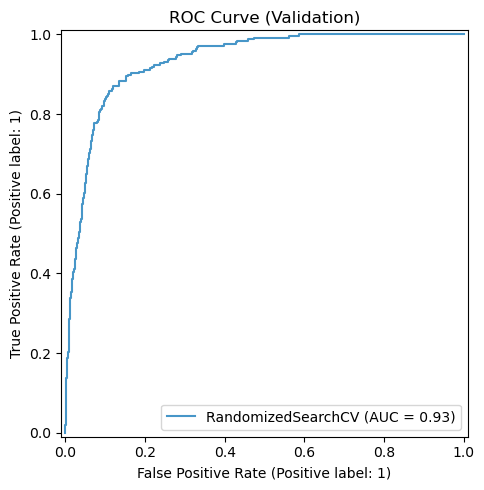

In [41]:
import scipy.stats
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

# Defining a new model object with a large number of estimators for early stopping
lgbm_model = lgb.LGBMClassifier(n_estimators=10000, n_jobs=-1, random_state=random_state, verbose=-1)

# Define the parameter distributions for hyperparameter tuning
param_distributions = {
    "colsample_bytree": scipy.stats.uniform(loc=0.5, scale=0.5),  # Also known as feature_fraction
    "learning_rate": scipy.stats.uniform(loc=0.003, scale=0.19),
    "max_depth": np.append(-1, np.arange(3, 16)),
    "min_child_samples": scipy.stats.randint(5, 300),  # Also known as min_data_in_leaf
    "num_leaves": scipy.stats.randint(8, 256),
    "reg_alpha": [0, 0.01, 1, 2, 5, 7, 10, 50, 100],  # Also known as lambda_l1
    "reg_lambda": [0, 0.01, 1, 5, 10, 20, 50, 100],  # Also known as lambda_l2
    "subsample": scipy.stats.uniform(loc=0.5, scale=0.5),  # Also known as bagging_fraction
    #"is_unbalance": [True],  # https://stackoverflow.com/questions/71838896/how-to-use-is-unbalance-and-scale-pos-weight-parameters-in-lightgbm-for-a-bi
    #"scale_pos_weight": [0.4],
}

# Configure the randomized search
random_search = RandomizedSearchCV(lgbm_model,
                                   param_distributions=param_distributions,
                                   n_iter=40,
                                   cv=3,
                                   scoring="f1",
                                   n_jobs=-1,
                                   random_state=random_state)

# Perform the randomized search with early stopping
random_search.fit(X_train, y_train,
                  eval_set=[(X_val, y_val)],
                  callbacks=[lgb.early_stopping(20)])

# Functions to display search results and roc-curve
goose.display_search_results(random_search, X_train, y_train, X_val, y_val)
goose.display_roc_curve(random_search, X_train, y_train, X_val, y_val, data_to_display='validation')

#### Refit with Best Parameters Including n_estimators and Preprocessor
To effectively use the best number of estimators identified through early stopping, we initialize the model with this key parameter and the other optimal hyperparameters from the grid search. Re-training the pipeline with these settings, together with the preprocessor, results in a recall improvement of one percentage point.


Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1332
           1       0.71      0.60      0.65       246

    accuracy                           0.90      1578
   macro avg       0.82      0.78      0.80      1578
weighted avg       0.89      0.90      0.90      1578



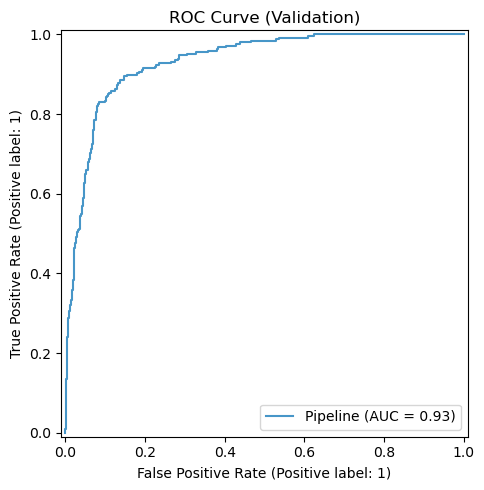

In [42]:
# Extract the parameters from the best model to re-train the model
# Update the number of estimators to the best iteration from early stopping
best_model = random_search.best_estimator_
optimal_params = best_model.get_params()
optimal_params["n_estimators"] = best_model.best_iteration_

# Re-train the tuned model with the optimal parameters
lgbm_model = lgb.LGBMClassifier(**optimal_params)  # Inherits n_jobs and random_state from above

# Create pipeline
lgbm_pipe = make_pipeline(preprocessor, lgbm_model)

# Train model
lgbm_pipe.fit(X_train, y_train)

# Display metrics and roc-curve
goose.display_classification_report(lgbm_pipe, X_train, y_train, X_val, y_val, data_to_display='validation')
goose.display_roc_curve(lgbm_pipe, X_train, y_train, X_val, y_val, data_to_display='validation')

## Sampling Techniques

Given the significant class imbalance in our dataset, exploring sampling strategies to balance class distribution could potentially boost our models' predictive performance.

We explore the impact of various sampling techniques on model performance:

- **Subsampling**: Reducing the majority class to balance the dataset.
- **Oversampling**: Increasing the minority class to achieve balance.
- **SMOTE (Synthetic Minority Over-sampling Technique)**: Generating synthetic samples for the minority class.

Our goal is to determine whether these techniques enhance the predictive accuracy of our models. We will assess their effectiveness using classification reports and ROC-AUC metrics.

### Applying Sampling Techniques
Utilizing the `imblearn` library to generate new sampled versions of the dataset through various techniques.

In [43]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

################## Subsampling ##################
# Subsampling the majority class
undersampler = RandomUnderSampler(random_state=random_state)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

################## Oversampling ##################
# Oversampling the minority class
oversampler = RandomOverSampler(random_state=random_state)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

################## SMOTE ##################
# Fit and transform the training data with the preprocessor
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)

# Apply SMOTE to the preprocessed training data
smote = SMOTE(random_state=random_state)
X_train_smote, y_train_smote = smote.fit_resample(X_train_preprocessed, y_train)

### EBM on Sampled Datasets
The fitting times for EBM were quite aggressive, yet the results did not yield any noticeable improvements compared to the unsampled dataset.

In [44]:
from sklearn.base import clone
from sklearn.metrics import classification_report

# Fit model on sampled training data for random under sampling
ebm_pipe_undersampled = clone(ebm_pipe)
ebm_pipe_undersampled.fit(X_train_resampled, y_train_resampled)

# Fit model on sampled training data for random over sampling
ebm_pipe_oversampled = clone(ebm_pipe)
ebm_pipe_oversampled.fit(X_train_oversampled, y_train_oversampled)

# Fit model on sampled training data for SMOTE
ebm_model_smote = clone(ebm_model)
ebm_model_smote.fit(X_train_smote, y_train_smote)

# Display classification report for random under sampling
y_val_pred_undersampled = ebm_pipe_undersampled.predict(X_val)
print("Undersampling EBM:")
print(classification_report(y_val, y_val_pred_undersampled))

# Display classification report for random over sampling
y_val_pred_oversampled = ebm_pipe_oversampled.predict(X_val)
print("Oversampling EBM:")
print(classification_report(y_val, y_val_pred_oversampled))

# Display classification report for SMOTE
y_val_pred_smote = ebm_model_smote.predict(X_val_preprocessed)
print("SMOTE EBM:")
print(classification_report(y_val, y_val_pred_smote))


Undersampling EBM:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1332
           1       0.55      0.86      0.67       246

    accuracy                           0.87      1578
   macro avg       0.76      0.86      0.79      1578
weighted avg       0.90      0.87      0.88      1578

Oversampling EBM:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1332
           1       0.58      0.64      0.61       246

    accuracy                           0.87      1578
   macro avg       0.76      0.78      0.77      1578
weighted avg       0.88      0.87      0.87      1578

SMOTE EBM:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1332
           1       0.68      0.66      0.67       246

    accuracy                           0.90      1578
   macro avg       0.81      0.80      0.80      1578
weighted avg       0.90   

#### EBM Threshold Comparison (ROC-AUC)
Visual comparison of ROC curves shows no threshold improvements, with AUC mirroring that of the unsampled dataset model, except for random oversampling, which results in a lower AUC.

In [45]:
################## Helper Function ##################
from sklearn.metrics import roc_curve, auc

# Define a function to plot ROC curve
def plot_roc_curve(y_true, y_proba, method_name, ax):
    # Extract probabilities for the positive class
    y_proba_positive = y_proba[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true, y_proba_positive)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, lw=2, label=f'{method_name} (area = %0.2f)' % roc_auc)
    ax.plot([0, 1], [0, 1], color='lightslategray', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve ({method_name})')
    ax.legend(loc="lower right")
    sns.despine(ax=ax)

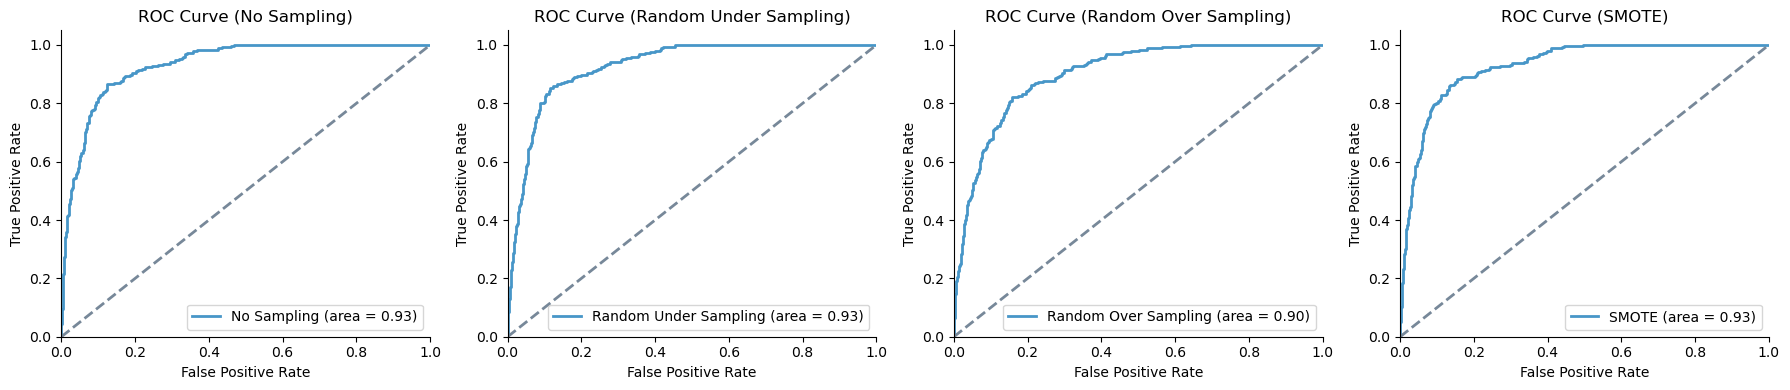

In [46]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(18, 4))

# Plot ROC curve for No Sampling
plot_roc_curve(y_val, ebm_pipe.predict_proba(X_val), "No Sampling", axs[0])

# Plot ROC curve for Random Under Sampling
plot_roc_curve(y_val, ebm_pipe_undersampled.predict_proba(X_val), "Random Under Sampling", axs[1])

# Plot ROC curve for Random Over Sampling
plot_roc_curve(y_val, ebm_pipe_oversampled.predict_proba(X_val), "Random Over Sampling", axs[2])

# Plot ROC curve for SMOTE
plot_roc_curve(y_val, ebm_model_smote.predict_proba(X_val_preprocessed), "SMOTE", axs[3])

plt.tight_layout()
plt.show()

### LightGBM on Sampled Datasets
The fitting time for LightGBM was almost instant. However, analysis suggests no significant enhancement in metrics for the LightGBM model post-application of sampling techniques.

In [47]:
from sklearn.base import clone

# Refit and Display Metrics for..

################## Subsampled Data ##################
# Fit model on sampled training data
lgm_pipe_undersampled = clone(lgbm_pipe)
lgm_pipe_undersampled.fit(X_train_resampled, y_train_resampled)

# Display classification report
y_val_pred_undersampled = lgm_pipe_undersampled.predict(X_val)
print("Subsampling LightGBM:")
print(classification_report(y_val, y_val_pred_undersampled))

################## Oversampled Data ##################
# Fit model on sampled training data
lgbm_pipe_oversampled = clone(lgbm_pipe)
lgbm_pipe_oversampled.fit(X_train_oversampled, y_train_oversampled)

# Display classification report
y_val_pred_oversampled = lgbm_pipe_oversampled.predict(X_val)
print("Oversampling LightGBM:")
print(classification_report(y_val, y_val_pred_oversampled))

################## SMOTE Sampled Data ##################
# Fit model on sampled training data
lgbm_model_smote = clone(lgbm_model)
lgbm_model_smote.fit(X_train_smote, y_train_smote)

# Predict on the validation set
y_val_pred_smote = lgbm_model_smote.predict(X_val_preprocessed)
print("SMOTE LightGBM:")
print(classification_report(y_val, y_val_pred_smote))

Subsampling LightGBM:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1332
           1       0.55      0.87      0.68       246

    accuracy                           0.87      1578
   macro avg       0.76      0.87      0.80      1578
weighted avg       0.91      0.87      0.88      1578

Oversampling LightGBM:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1332
           1       0.55      0.86      0.67       246

    accuracy                           0.87      1578
   macro avg       0.76      0.87      0.79      1578
weighted avg       0.91      0.87      0.88      1578

SMOTE LightGBM:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1332
           1       0.64      0.75      0.69       246

    accuracy                           0.90      1578
   macro avg       0.80      0.84      0.81      1578
weighted avg 

#### LigthGBM Threshold Comparison (ROC-AUC)
Comparative assessment indicates that oversampling marginally increased the AUC score by 1 point for the LightGBM model. However, the curve, where the False Positives are lower—which is of interest—is not of any significant improvement compared to the unsampled dataset.

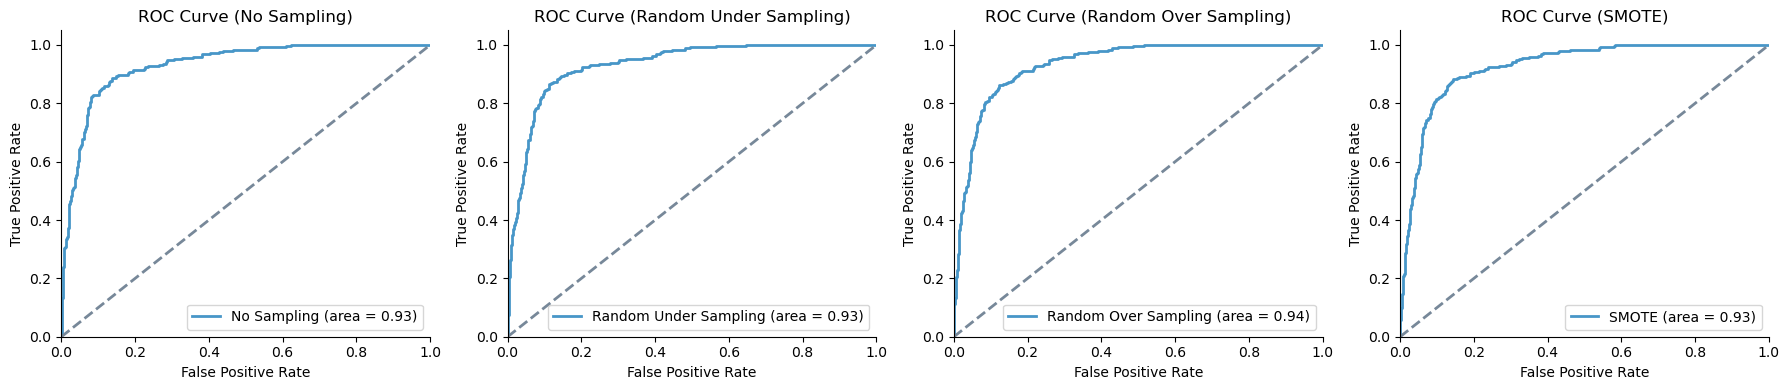

In [48]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(18, 4))

# Plot ROC curve for No Sampling
plot_roc_curve(y_val, lgbm_pipe.predict_proba(X_val), "No Sampling", axs[0])

# Plot ROC curve for Random Under Sampling
plot_roc_curve(y_val, lgm_pipe_undersampled.predict_proba(X_val), "Random Under Sampling", axs[1])

# Plot ROC curve for Random Over Sampling
plot_roc_curve(y_val, lgbm_pipe_oversampled.predict_proba(X_val), "Random Over Sampling", axs[2])

# Plot ROC curve for SMOTE
plot_roc_curve(y_val, lgbm_model_smote.predict_proba(X_val_preprocessed), "SMOTE", axs[3])

plt.tight_layout()
plt.show()

### Baseline Model on Sampled Data
The absence of marked improvements in EBM and LightEBM prompts us to explore sampling techniques for our baseline model, i.e., Logistic Regression. The performance slightly lags behind that of the aforementioned models.

No Sampling Logistic Regression:

Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1332
           1       0.71      0.59      0.64       246

    accuracy                           0.90      1578
   macro avg       0.82      0.77      0.79      1578
weighted avg       0.89      0.90      0.89      1578

Subsampling Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1332
           1       0.56      0.83      0.67       246

    accuracy                           0.87      1578
   macro avg       0.76      0.85      0.79      1578
weighted avg       0.90      0.87      0.88      1578

Oversampling Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1332
           1       0.56      0.83      0.67       246

    accuracy                           0.87  

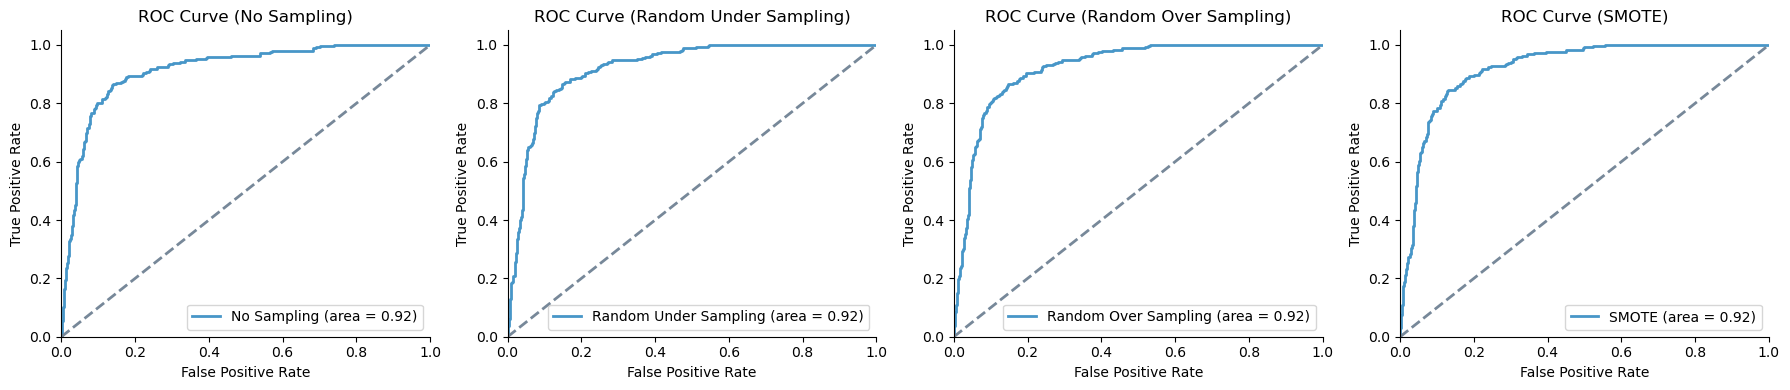

In [49]:
print("No Sampling Logistic Regression:")
goose.display_classification_report(log_pipe, X_train, y_train, X_val, y_val, data_to_display='validation')

# Re-fit and Display Metrics for...

################## Subsampled Data ##################
# Fit model on sampled training data
log_pipe_undersampled = clone(log_pipe)
log_pipe_undersampled.fit(X_train_resampled, y_train_resampled)

# Display classification report
y_val_pred_undersampled = log_pipe_undersampled.predict(X_val)
print("Subsampling Logistic Regression:")
print(classification_report(y_val, y_val_pred_undersampled))

################## Oversampled Data ##################
# Fit model on sampled training data
log_pipe_oversampled = clone(log_pipe)
log_pipe_oversampled.fit(X_train_oversampled, y_train_oversampled)

# Display classification report
y_val_pred_oversampled = log_pipe_oversampled.predict(X_val)
print("Oversampling Logistic Regression:")
print(classification_report(y_val, y_val_pred_oversampled))

################## SMOTE Sampled Data ##################
# Fit model on sampled training data
log_model_smote = clone(log_model)
log_model_smote.fit(X_train_smote, y_train_smote)

# Predict on the validation set
y_val_pred_smote = log_model_smote.predict(X_val_preprocessed)
print("SMOTE Logistic Regression:")
print(classification_report(y_val, y_val_pred_smote))

################## Plot Roc Curves ##################
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(18, 4))

# Plot ROC curve for No Sampling
plot_roc_curve(y_val, log_pipe.predict_proba(X_val), "No Sampling", axs[0])

# Plot ROC curve for Random Under Sampling
plot_roc_curve(y_val, log_pipe_undersampled.predict_proba(X_val), "Random Under Sampling", axs[1])

# Plot ROC curve for Random Over Sampling
plot_roc_curve(y_val, log_pipe_oversampled.predict_proba(X_val), "Random Over Sampling", axs[2])

# Plot ROC curve for SMOTE
plot_roc_curve(y_val, log_model_smote.predict_proba(X_val_preprocessed), "SMOTE", axs[3])

plt.tight_layout()
plt.show()

### Summarizing Sampling Techniques
Despite different sampling methods showing varied precision and recall for the majority class, the virtually identical ROC-AUC across subsampling, oversampling, and SMOTE indicates uniform model discrimination. The sampling affects class balance and threshold-dependent metrics, but not the underlying discriminative capacity of the model. Adjusting the decision threshold can reconcile precision-recall disparities without affecting AUC. In simple terms: **Sampling techniques did not improve the estimators predictions.**

## Revisiting Model Selection: A Comparative Analysis at Specific Thresholds
Thus far, it's not entirely clear whether EBM and/or LightGBM have meaningfully outperformed the baseline model. Adhering to our task of building an effective initial model for accurately profiling our converting customers, in this section, we will examine the precision and recall scores at various thresholds. This analysis aims to determine which model is most feasible for this task and, potentially, for future implementations of a predictive model in post-profiling scenarios.

### EBM Profiling Model Analysis:
EBM notably surpasses the alternative models in striking a balance between high precision and practical recall. Here are the specifics at a threshold of 0.73:

- **Precision**: 0.86

- **Recall**: 0.34

- **Confusion Matrix Highlights**:
    - True Positives: 83
    - True Negatives: 1318
    - False Positives: 14
    - False Negatives: 163

**EBM Profiling Model Example**: 
In profiling 1578 customers, our model predicts 97 would convert. Among these, 14 are false positives—incorrectly predicted to convert—and 83 genuinely do. It's important to note that this model's application is intended for historical data analysis, not real-time decision-making. We propose that analyzing a group of 1578 customers can yield insightful understandings of customer conversion behaviors. Additionally, we consider the potential for real-time model deployment, for which LightGBM emerges as a more suitable candidate.

### LightGBM Potential Deployment Model Insights:
The exact future application for forecasting customer conversions in real-time remains to be determined. The LightGBM model's effectiveness hinges on a recall rate surpassing that of the profiling model to identify a sufficient number of conversions for any applied strategy to be successful. While precision remains crucial—to mitigate the repercussions of excessive false positives on cost-efficiency or brand reputation—we posit that model interpretability is less critical in this context. This stance is predicated on the nature of the business, which does not demand the level of interpretability required in sectors like finance, healthcare or criminal justice. Opting for a threshold of 0.48 with LightGBM, we achieve:

- **Precision**: 0.71

- **Recall**: 0.64

- **Confusion Matrix Highlights**:
    - True Positives: 156
    - True Negatives: 1267
    - False Positives: 65
    - False Negatives: 90

**LightGBM Real-Time Deployment Example**: 
Website visitors deemed likely to convert by the model could receive intensified follow-up marketing efforts. Utilizing the model in real-time over a month on 1,578 users, we anticipate 144 correct predictions of conversion, triggering additional marketing initiatives. Conversely, 66 users would be incorrectly targeted, and 102 would be overlooked as false negatives. The strategy's future adjustments—increasing the threshold to reduce negative feedback or lowering it to capture more potential conversions—will depend on the marketing campaign's impact on customer satisfaction and company reputation.

#### Logistic Regression Across Thresholds
After reviewing various thresholds, we conclude that the default threshold of 0.5 is optimal. This is because any further improvement in precision, albeit slight from 0.71 to 0.72, would cause a significant drop in recall, from 0.59 to 0.34. This trade-off leads to the loss of too many True Positives (TP), with the minimal increase in precision failing to justify the substantial decrease in captured TPs, thereby rendering it unsuitable for a viable model.
  
**Rejecting the Null Hypothesis**  
Consequently, we reject the null hypothesis positing that Logistic Regression's performance is equivalent to that of alternative models. Instead, we accept the alternative hypothesis indicating a significant performance discrepancy between the baseline model and at least one of the alternative models.

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def evaluate_thresholds(model, X, y):
    # Probabilities for target
    pred_proba = model.predict_proba(X)
    pred_proba_pos = pred_proba[:, 1]
    threshold_values = np.linspace(0.2, 0.8, 25)

    # Prepare an empty list to collect metrics for each threshold
    metrics = []

    for threshold in threshold_values:
        y_pred = (pred_proba_pos >= threshold).astype(int)
        accuracy = round(accuracy_score(y, y_pred), 2)
        precision = round(precision_score(y, y_pred), 2)
        recall = round(recall_score(y, y_pred), 2)

        # Append the metrics for the current threshold to the list
        metrics.append([round(threshold, 2), precision, recall])

    # Convert the list of metrics into a DataFrame
    metrics_df = pd.DataFrame(metrics, columns=['Threshold', 'Precision', 'Recall'])

    return metrics_df

evaluate_thresholds(log_model, X_val_preprocessed, y_val)

,Threshold,Precision,Recall
0,0.20,0.60,0.80
1,0.22,0.63,0.77
2,0.25,0.64,0.76
3,0.28,0.64,0.74
4,0.30,0.65,0.71
5,0.33,0.65,0.69
6,0.35,0.66,0.67
7,0.38,0.66,0.65
8,0.40,0.67,0.64
9,0.43,0.67,0.62


In [51]:
################## Helper Function ##################
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix_with_threshold(model, X_val, y_val, threshold=0.5, normalize=True):
    sns.set_style("white")
    
    # Predict probabilities for the positive class
    pred_proba = model.predict_proba(X_val)[:, 1]
    
    # Convert predicted probabilities to binary predictions based on the threshold
    y_pred = (pred_proba >= threshold).astype(int)

    # Generate the confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    
    if normalize:
        # Normalize the confusion matrix to get percentages of the total observations
        cm = cm.astype('float') / np.sum(cm)
    
    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix at Threshold {threshold}')
    plt.show()

#### LightGBM Across Thresholds
Upon a closer examination, we observe that increasing the threshold allows us to significantly improve precision without sacrificing too much relative recall, up to a point where we achieve a precision of 0.78 and a recall of 0.37. This adjustment results in a reasonable sample size and significantly enhances precision compared to the default threshold. It is suitable for initial deployment when the potential negative impact of false positives is uncertain. However, in deployment scenarios prioritizing the maximization of true positives, one could consider starting with a threshold of 0.48, achieving a precision of 0.71 and a recall of 0.64.

In [52]:
evaluate_thresholds(lgbm_model, X_val_preprocessed, y_val)

,Threshold,Precision,Recall
0,0.20,0.59,0.85
1,0.22,0.61,0.83
2,0.25,0.64,0.83
3,0.28,0.65,0.80
4,0.30,0.66,0.79
5,0.33,0.67,0.78
6,0.35,0.67,0.74
7,0.38,0.66,0.72
8,0.40,0.68,0.69
9,0.43,0.68,0.68


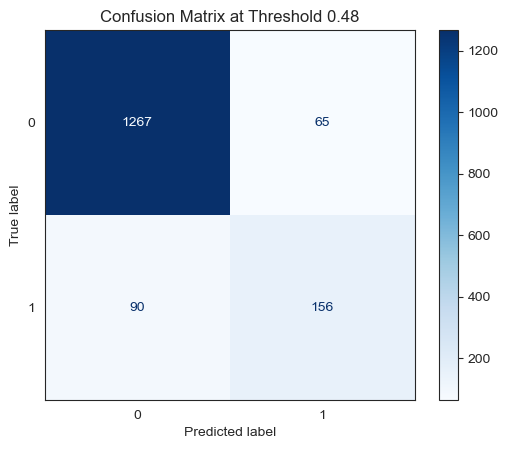

In [53]:
# Display confusion matrix
plot_confusion_matrix_with_threshold(lgbm_model, X_val_preprocessed, y_val, threshold=0.48, normalize=False)

#### EBM Across Thresholds
The analysis becomes particularly intriguing with EBM. By adjusting the thresholds, we reach a precision of 0.86 and a recall of 0.34. This development clearly demonstrates that EBM outperforms LightGBM, marking excellent news for our project. Given these results, EBM can now be considered the optimal model for our current task. We require high precision to minimize False Negatives, ensuring a sufficient sample size. Furthermore, the necessity for a model that offers clear interpretability aligns with what EBM offer.

In [54]:
evaluate_thresholds(ebm_model, X_val_preprocessed, y_val)

,Threshold,Precision,Recall
0,0.20,0.59,0.83
1,0.22,0.60,0.80
2,0.25,0.62,0.78
3,0.28,0.63,0.77
4,0.30,0.65,0.76
5,0.33,0.65,0.74
6,0.35,0.65,0.73
7,0.38,0.66,0.71
8,0.40,0.66,0.67
9,0.43,0.66,0.65


1578


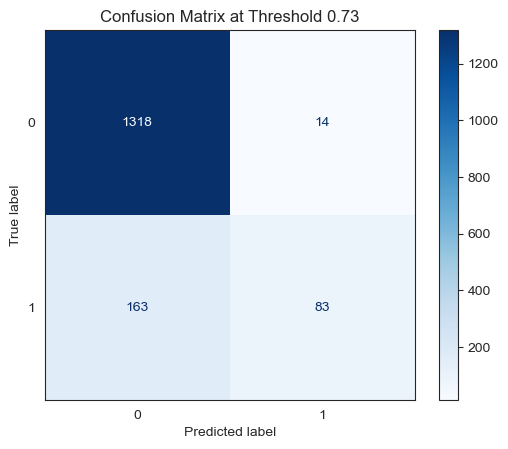

In [55]:
# Display confusion matrix
plot_confusion_matrix_with_threshold(ebm_model, X_val_preprocessed, y_val, threshold=0.73, normalize=False)

## Evaluation of the Imputation Pipeline
Considering the importance of an imputation strategy not only in profiling but also, and perhaps more critically, in real-time applications, we chose to evaluate the efficacy of the imputation pipeline on our preferred model for such applications, namely, LightGBM.
  
Our investigations into imputation strategies reveal no significant improvement in the model's predictive performance. With a chosen threshold of 0.48, the imputation-enhanced model yields a precision of 0.71 and a recall of 0.57. This is comparable to the model's precision of 0.71 and recall of 0.64, without imputation. 
  
It's important to emphasize the potential relevance of the imputation pipeline in a production environment. Especially if missing values persist and predictions are needed for a broad user base, the value of this pipeline becomes apparent. Originally, missing data represented 13% of our dataset. Should such missing data issues continue, the imputation pipeline proves its merit for real-time application by maintaining model performance without compromising generalizability. In this context, achieving metric consistency, even if only for precision, is a substantial benefit that preserves the model's reliability.

Classification Report (Training):
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7151
           1       0.77      0.64      0.70      1317

    accuracy                           0.91      8468
   macro avg       0.85      0.80      0.83      8468
weighted avg       0.91      0.91      0.91      8468


Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1528
           1       0.71      0.53      0.61       281

    accuracy                           0.89      1809
   macro avg       0.82      0.74      0.77      1809
weighted avg       0.89      0.89      0.89      1809



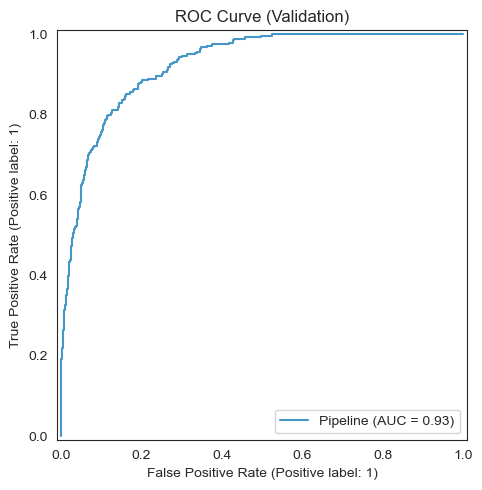

In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, FunctionTransformer, OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

############### Load and Setup Dataset ###############
df2 = pd.read_csv('project_data.csv')
df2.drop('Unnamed: 0', axis=1, inplace=True)

# Missing values in target are not feasible and are dropped
df2.dropna(subset=['Revenue'], inplace=True)

# Likewise goes for duplicated rows
df2.drop_duplicates(inplace=True)

# Relabel 'Turc' to NaN
df2['Month'] = df2['Month'].replace('Turc', np.nan)

# Consolidate "Sept" with "Sep"
df2['Month'] = df2['Month'].replace('Sept', 'Sep')

# Relabel 'Name:Zara' to NaN
df2['Weekend'] = df2['Weekend'].replace('Name:Zara', np.nan)

# Replace negative and irrational values with NaN
df2.loc[df2['Administrative'] < 0, 'Administrative'] = np.nan
df2.loc[df2['BounceRates'] < 0, 'BounceRates'] = np.nan
df2.loc[df2['BounceRates'] > 1, 'BounceRates'] = np.nan

# Apply mapping to clear up 0 for constant imputing
special_day_mapping = {0.0: 1, 0.2: 2, 0.4: 3, 0.6: 4, 0.8: 5, 1.0: 6}
df2['SpecialDay'] = df2['SpecialDay'].map(special_day_mapping)

# Convert object 'Weekend' and boolean 'Revenue' to numeric representation
df2['Weekend'] = df2['Weekend'].map({'True': 1, 'False': 0})
df2['Revenue'] = df2['Revenue'].map({True: 1, False: 0})

X_train2, y_train2, X_val2, y_val2, X_test2, y_test2, X_train_val2, y_train_val2 = goose.split_data(df2, "Revenue", verbose=False)

####################### Pipeline #######################
# Scaling and transformation
scaler = RobustScaler()
robust_scaler = make_pipeline(scaler)
log_transform = make_pipeline(FunctionTransformer(np.log1p), scaler)
sqrt_transform = make_pipeline(FunctionTransformer(np.sqrt), scaler)

# Encoding
onehot_encode = make_pipeline(OneHotEncoder(drop='if_binary', handle_unknown='ignore', dtype=int))

# Imputation
knn_impute = make_pipeline(KNNImputer(n_neighbors=2), log_transform)
specialday_impute = make_pipeline(SimpleImputer(strategy='constant', fill_value=0), onehot_encode) # SimpleImputer(strategy='most_frequent')
weekend_impute = make_pipeline(SimpleImputer(strategy='most_frequent'), onehot_encode)
onehot_impute = make_pipeline(SimpleImputer(strategy='most_frequent'), onehot_encode) # SimpleImputer(strategy='constant', fill_value=0)

# Iterative Imputer transformer
# iterative_imputer_transformer = make_pipeline(
#     FunctionTransformer(np.log1p, validate=False),  # Applying log transformation
#     IterativeImputer(random_state=random_state, ),
#     scaler
# )

# Month ordinal encoding setup
months_order = ['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_ordinal = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder(categories=[months_order]))

# Preprocessor setup
preprocessor2 = ColumnTransformer(
    transformers=[
        ('bouncerate_knn', knn_impute, ['BounceRates']),
        ('month_ordinal_encode', month_ordinal, ['Month']),
        ('specialday_impute_encode', specialday_impute, ['SpecialDay']),
        ('weekend_impute_encode', weekend_impute, ['Weekend']),
        ('missing_category_impute_encode', onehot_impute, ['Browser', 'Region']),
        ('product_related_robust', robust_scaler, ['ProductRelated', 'ProductRelated_Duration']),
        ('log_transform_scale', log_transform, ['Administrative_Duration', 'Informational_Duration', 'ExitRates', 'PageValues']),
        ('sqrt_transform_scale', sqrt_transform, []),
        ('categorical_encode', onehot_encode, ['VisitorType', 'Administrative', 'Informational', 'OperatingSystems', 'TrafficType'])
    ],
    remainder='passthrough'
)

# Model pipeline
model_pipeline = make_pipeline(preprocessor2, lgbm_model)

# Model training
model_pipeline.fit(X_train2, y_train2)

# Display metrics and roc-curve
goose.display_classification_report(model_pipeline, X_train2, y_train2, X_val2, y_val2, data_to_display='both')
goose.display_roc_curve(model_pipeline, X_train2, y_train2, X_val2, y_val2, data_to_display='validation')

In [57]:
evaluate_thresholds(model_pipeline, X_val2, y_val2)

,Threshold,Precision,Recall
0,0.20,0.56,0.79
1,0.22,0.58,0.77
2,0.25,0.59,0.74
3,0.28,0.60,0.72
4,0.30,0.63,0.72
5,0.33,0.65,0.70
6,0.35,0.66,0.67
7,0.38,0.67,0.65
8,0.40,0.68,0.63
9,0.43,0.70,0.63


## Final Model Evaluation
Our model assessment will utilize the unseen test set to gain insights into what drives customer conversions. This critical analysis will underpin the profiling of user behavior for stakeholder review and motivate the development of a deployable, real-time model for the website.

Step-by-step:
1. Extract feature names for EBM's upcoming profiling anlysis
2. Instantiate the model with extracted feature names and optimal parameters from the grid search.
3. Refit the model using both train and validation data sets combined.
4. Evaluate the model by displaying and analysing metrics, confusion matrices and ROC-AUC on the hold-out test set (unseen data).
5. Summarize the findings.

### Extract Feature Names
In our preprocessing pipeline, the feature names get obscured due to feature engineering. This code segment serves to remedy that by fetching and storing them. This allows us to retrain the model with the original feature names intact, enhancing our understanding of the model's behavior.

In [58]:
# Define transformation rules for clarity.
transformation_rules = {
    "OneHotEncoder": ['VisitorType', 'Informational', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 'Month', 'SpecialDay'],
    "log_transformer": ['Administrative_Duration', 'Informational_Duration', 'BounceRates', 'ExitRates', 'PageValues'],
    "Direct": ['ProductRelated', 'ProductRelated_Duration']
}

# Fit preprocessor
preprocessor.fit(X_train_val, y_train_val)

# Access fitted OneHotEncoder
onehot_encoder = preprocessor.named_transformers_['pipeline-4'].named_steps['onehotencoder']

# Get categories from OneHotEncoder
categories = onehot_encoder.categories_

# Create feature names for one-hot encoded features
onehot_feature_names = [f"{feature}_{cat}" for feature, cats in zip(transformation_rules["OneHotEncoder"], categories) for cat in cats]

# Drop-first in binary
onehot_feature_names.remove('Weekend_0')

# Define log-transformed feature names
log_features = [f'log_{col}' for col in transformation_rules["log_transformer"]]

# Define directly used features
direct_features = transformation_rules["Direct"]

# Combine all feature names
all_transformed_features = onehot_feature_names + log_features + direct_features

# Print transformed feature names
print("All Transformed Feature Names:", all_transformed_features)


All Transformed Feature Names: ['VisitorType_New_Visitor', 'VisitorType_Other', 'VisitorType_Returning_Visitor', 'Informational_0', 'Informational_1', 'Informational_2', 'Informational_3', 'Informational_4', 'Informational_5', 'Informational_6', 'Informational_7', 'Informational_8', 'Informational_9', 'Informational_10', 'Informational_11', 'Informational_12', 'Informational_13', 'Informational_14', 'Informational_16', 'Informational_24', 'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6', 'OperatingSystems_7', 'OperatingSystems_8', 'Browser_1', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12', 'Browser_13', 'Region_1', 'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9', 'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6'

### Model for Customer Profiling: Explainable Boosting Machine (EBM)
EBM is performing as well as we could have hoped. At the default threshold, our precision is at 0.73 (+4 points), with a recall of 0.6 (-1 point). The ROC-AUC is impressive, boasting an area under the curve of 0.94 (+1 point). We will perform a more thorough analysis of feature importance and customer conversion drivers in the upcoming section on interpretation and profiling.


Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1336
           1       0.73      0.60      0.66       246

    accuracy                           0.90      1582
   macro avg       0.83      0.78      0.80      1582
weighted avg       0.90      0.90      0.90      1582



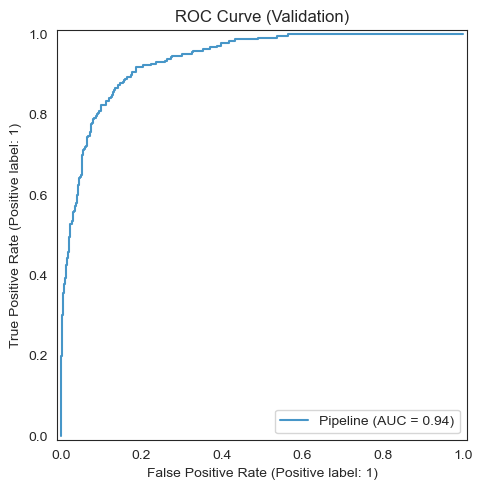

In [59]:
# Feature specific transformers
transformers = [
    (robust_transformer, ['ProductRelated', 'ProductRelated_Duration']),
    (log_transformer, ['Administrative_Duration', 'Informational_Duration', 'BounceRates', 'ExitRates', 'PageValues']),
    (sqrt_transformer, []),
    (onehot_transformer, ['VisitorType', 'Informational', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 'Month', 'SpecialDay']),
]

# Combine transformers
preprocessor = make_column_transformer(*transformers)

# Best params from grid search
ebm_params = {k.replace('explainableboostingclassifier__', ''): v 
              for k, v in grid_ebm.best_params_.items()}

# Instantiate estimator
ebm_model = ExplainableBoostingClassifier(**ebm_params, random_state=random_state, feature_names=all_transformed_features)

# Pipeline creation
ebm_pipe = make_pipeline(preprocessor, ebm_model)

# Train model
ebm_pipe.fit(X_train_val, y_train_val)

# Display report and roc-curve
goose.display_classification_report(ebm_pipe, X_train, y_train, X_test, y_test, data_to_display='validation')
goose.display_roc_curve(ebm_pipe, X_train, y_train, X_test, y_test, data_to_display='validation')

In [60]:
evaluate_thresholds(ebm_pipe, X_test, y_test)

,Threshold,Precision,Recall
0,0.20,0.60,0.83
1,0.22,0.61,0.80
2,0.25,0.63,0.79
3,0.28,0.65,0.79
4,0.30,0.66,0.76
5,0.33,0.66,0.75
6,0.35,0.68,0.74
7,0.38,0.68,0.72
8,0.40,0.70,0.71
9,0.43,0.70,0.68


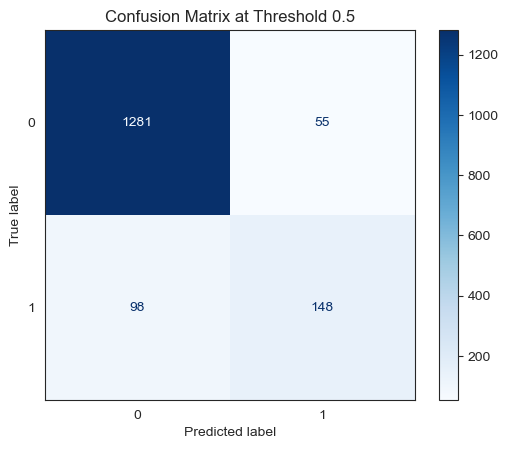

In [61]:
# Display confusion matrix
plot_confusion_matrix_with_threshold(ebm_pipe, X_test, y_test, threshold=0.5, normalize=False)

### Model for Deployment: Light Gradient-Boosting Machine (LightGBM)
The purpose of evaluating the model on the test set is to simulate its performance in a real-life scenario. Hence, this serves as our final evaluation and a projection of its potential real-world performance.

We are thrilled with LightGBM's generalizability, which showed even better performance on the test set than on the validation set. The performance at the standard threshold includes a precision of 0.75 (+4 points) and a recall of 0.63 (+3 points).

We recommend starting with a threshold of 0.43 for real-time deployment, yielding the following metrics and outcomes for a sample size of 1582:

- **Precision**: 0.72

- **Recall**: 0.72

- **Confusion Matrix Highlights**:
    - True Positives: 174
    - True Negatives: 1267
    - False Positives: 69
    - False Negatives: 72

The threshold can be adjusted based on performance and specific requirements.


Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1336
           1       0.74      0.62      0.68       246

    accuracy                           0.91      1582
   macro avg       0.84      0.79      0.81      1582
weighted avg       0.90      0.91      0.90      1582



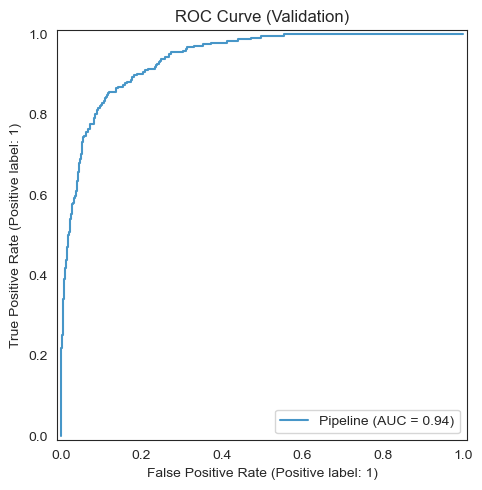

In [62]:
# Extract the parameters from the best model to re-train the model
# Update the number of estimators to the best iteration from early stopping
best_model = random_search.best_estimator_
optimal_params = best_model.get_params()
optimal_params["n_estimators"] = best_model.best_iteration_

# Retrain the tuned model with the optimal parameters
lgbm_model = lgb.LGBMClassifier(**optimal_params)  # Inherits n_jobs and random_state from above

# Create pipeline
lgbm_pipe = make_pipeline(preprocessor, lgbm_model)

# Train model
lgbm_pipe.fit(X_train_val, y_train_val)

# Display metrics and roc-curve
goose.display_classification_report(lgbm_pipe, X_train_val, y_train_val, X_test, y_test, data_to_display='validation')
goose.display_roc_curve(lgbm_pipe, X_train_val, y_train_val, X_test, y_test, data_to_display='validation')

In [63]:
evaluate_thresholds(lgbm_pipe, X_test, y_test)

,Threshold,Precision,Recall
0,0.20,0.58,0.85
1,0.22,0.60,0.83
2,0.25,0.62,0.81
3,0.28,0.63,0.78
4,0.30,0.66,0.78
5,0.33,0.67,0.76
6,0.35,0.68,0.76
7,0.38,0.69,0.75
8,0.40,0.70,0.75
9,0.43,0.72,0.72


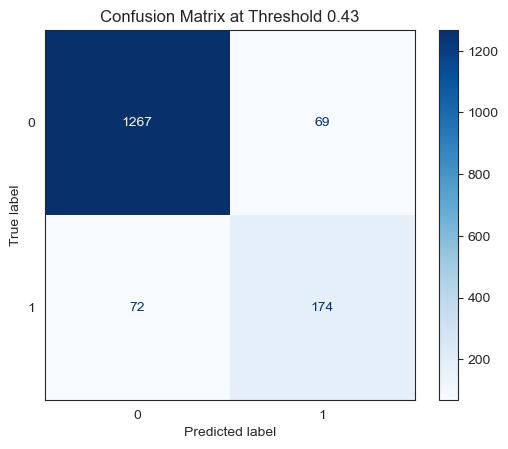

In [64]:
# Display confusion matrix
plot_confusion_matrix_with_threshold(lgbm_pipe, X_test, y_test, threshold=0.43, normalize=False)

## Interpretation and Customer Profiling
We will now analyze the most important predictors that illuminates the incentives for users to convert. The chart below offers significant insights into customer behavior and the key factors that influence conversion. It highlights the most impactful individual sub-categories alongside interaction terms, demonstrating the combined effect of dual-feature interactions and their respective scores.

Key Insights:
- 'Informational_3' stands out as the predominant predictor. A user's frequent visits to this page significantly influence conversion likelihood.

- The interaction terms of 'Informational_3' with 'SpecialDay' values of 0.4, 0.6, and 0.8 indicate strong predictive power. This pattern may suggest that users are more inclined to visit certain informational pages as special days approach, possibly due to the company's strategic customer engagement.

- While 'Informational_2' isn't as impactful as 'Informational_3', its interaction with 'Informational_3' indicates a potential for joint influence on increasing conversions. This interplay suggests that 'Informational_2' deserves closer investigation for its possible role in boosting conversion effectiveness.

- 'The 'VisitorType_Returning_Visitor' is a robust predictor on its own and demonstrates even greater predictive strength when combined with 'Informational_3'. Similarly, 'VisitorType_Other' shows strong predictive power individually and forms a valuable interaction term with 'Informational_2'.

- 'SpecialDay_0.8' is notable as an individual predictor, signifying a strategic opportunity for targeted marketing initiatives during specific periods leading up to special days.

- The presence of 'TrafficType_10' among the top predictors is intriguing. The relevance of this feature depends on its definition, which, if clarified, could yield valuable insights into its significance for conversion.

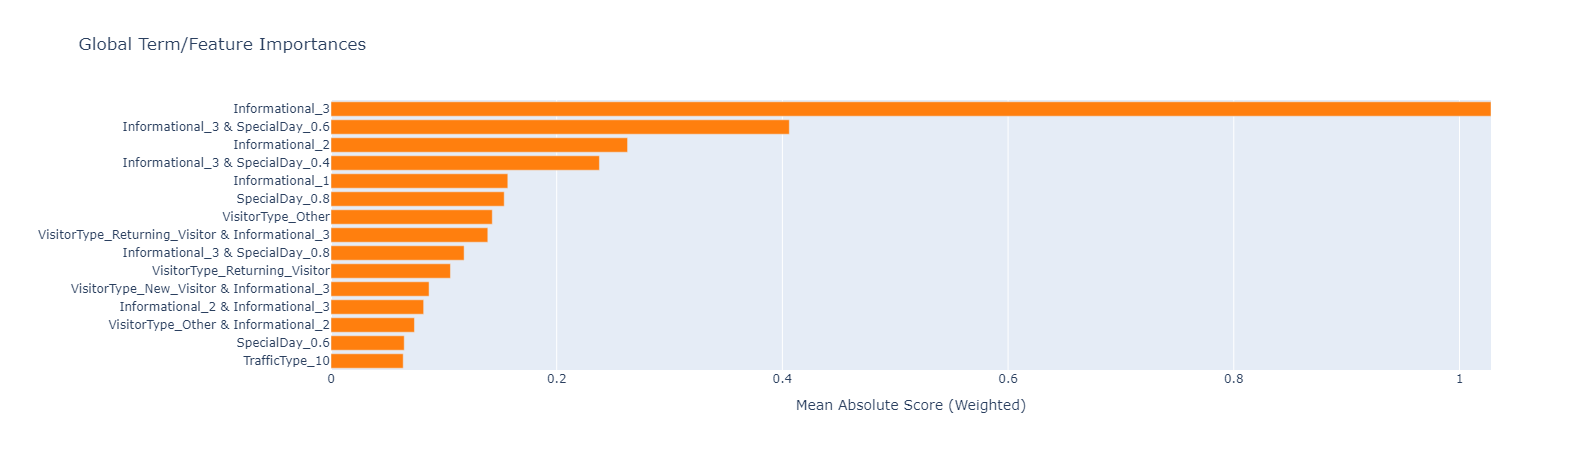

In [65]:
from interpret import show
from IPython.display import Image, display

# Display feature importances from file
display(Image(filename='assets/feature_importances_global.png'))

# Isolate the ebm classifier from pipeline
ebm = ebm_pipe.named_steps['explainableboostingclassifier']

# Display global explanations
# show(ebm.explain_global())

### Local Explanations Insight
The image illustrates a single prediction, significantly influenced by 'Informational_3', which guided the model to accurately predict the positive class. Features contributing negatively are highlighted in blue. This tool enables us to dissect any prediction made by the model for a visitor, providing, as the creators of the Interpret toolkit [claim](https://interpret.ml/docs/index.html), exact and precise explanations. The values on the x-axis represent log-odds, identical to those used in Logistic Regression.

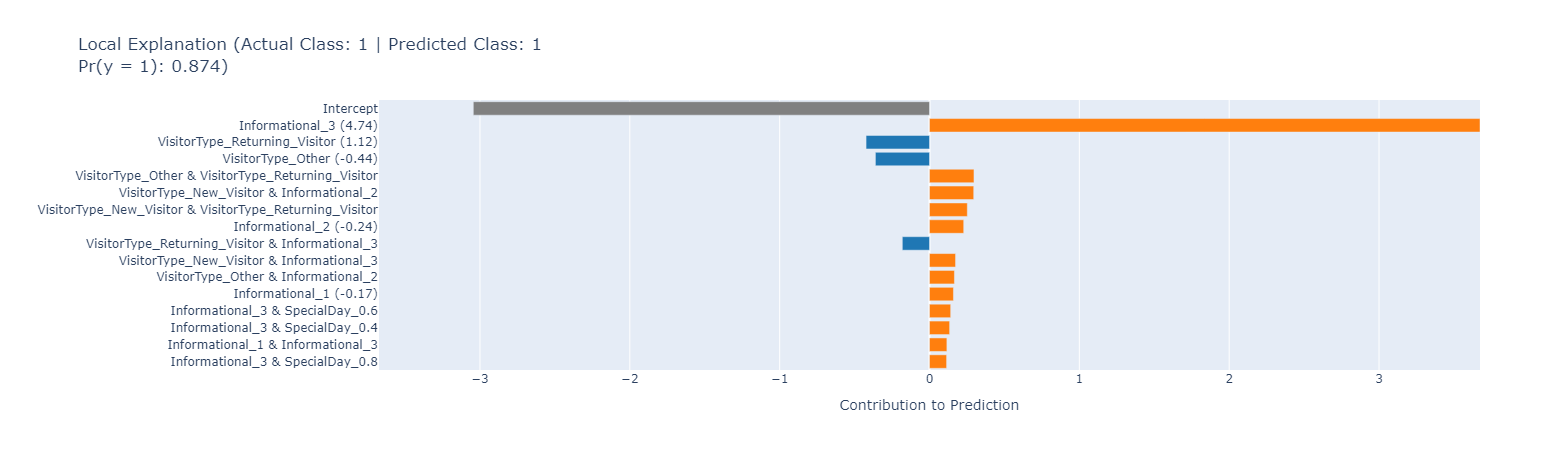

In [66]:
# Preprocess test data
X_test_preprocessed = preprocessor.transform(X_test)

# Display feature importances from file
display(Image(filename='assets/feature_importances_local_example.png'))

# Display interpret dashboard
# show([ebm.explain_global(), ebm.explain_local(X_test_preprocessed, y_test)], 0)

# Conclusion

## Strategic Insights: Enhancing Conversion and User Experience

### **Presenting our Model of Choice**
The Explainable Boosting Machine Classifier (EBM) has emerged as a frontrunner, rivaling the powerful LightGBM. This success is credited not only to thorough feature engineering and hyperparameter tuning but also to a rigorous comparative analysis of thresholds and imputation techniques such as SMOTE, among other strategies. 
A key advantage of the EBM over LightGBM is its transparent 'glassbox' approach, facilitating in-depth model analysis and understanding, both currently and for future applications. This transparency, even if LightGBM had superior performance, might lead many experts to favor EBM.

### **Challenges**
#### Data Quality
- The data exhibited an excessive number of missing entries, inaccuracies, and inconsistencies.
    - Issues ranged from misclassified data types to misplaced sub-category values.
    - There were signs suggestive of data integrity issues—possible unauthorized alterations to the dataset.
    - A discussion with the data engineering team is imperative to ascertain the company's data maturity level. Although some problems may stem from data collection methods, others require technical resolutions.

#### Tuning Times
The EBM model's optimization process was time-consuming. The 'inner_bags' parameter, while resource-intensive, bolstered the model's performance and could be omitted for efficiency at the expense of a slight performance drop. The exact maintenance needs for the model remain unclear, but given that it performs exceptionally out-of-the-box (OOB), with only marginal gains from further hyperparameter tuning - future maintanance is likely to be straigthforward and may not necessitate extensive ongoing adjustments.

#### Feature Distribution and Skewness
Addressing substantial variance in continuous features through transformations has enhanced our model's performance. This step proved crucial for the comparative and baseline models, where transformations were key to achieving competitive metrics.

#### Beating our Baseline Model
Logistic Regression served as our baseline. Through targeted feature engineering, we lifted its recall from 0.36 to 0.59 while maintaining precision at 0.71. Initially, it appeared our null hypothesis—stating the baseline's equal performance to EBM and LightGBM—couldn't be rejected. However, thorough evaluation at varying thresholds confirmed the superior performance of our selected EBM model.

### **Performance**
For initial deployment, we would recommend the EBM model with a default threshold at 0.5, which in our testing, accurately identified 73% of positive predictions (precision) and correctly detected 60% of actual positives (recall). Should false positives prove problematic, increasing the threshold to 0.8 yields a precision of 0.94 and a recall of 0.31, significantly reducing misclassifications in larger samples. For example, this threshold would result in only 60 False Positives in a sample size of 1000.

### **Customer Profiling: Conversion Drivers and Improvement Suggestions**
Our main goal has been profiling based on historical data to decipher the drivers behind customer conversions. The model's insights reveal 'Informational' pages as significant conversion factors, especially types "1", "2", and "3". Moreover, 'SpecialDay' and 'VisitorType' display strong interaction effects with these pages. Notably, conversions are not maximized on special days themselves but in the preceding periods, suggesting that early marketing efforts could substantially boost revenues.

#### Maximizing the Pre-Special Day Period
Exploratory data analysis (EDA) revealed that current trends show untapped potential in the run-up to special days like e.g. Black Friday. While high activity and revenue occur on the day, pre-event engagement is lacking. Our model indicates higher conversion predictions during this lead-up, presenting a strategic opportunity for marketing before these days to enhance revenue.

#### Leveraging Returning Visitors
With a 25% conversion rate for new visitors and 14% for returnees, a tailored machine learning model could help improve the latter's conversion rates. Interaction patterns between returning visitors and their engagement with 'Informational_3' are promising areas for targeted conversion strategies.

#### Traffic Type 10
Lastly, 'TrafficType_10' stands out as a predictor for conversions. Understanding this traffic's source may aid in refining the customer profile and tailoring marketing efforts accordingly.

### Future Directions: Enhancing Model Efficacy
We have recommended deploying our tuned EBM model initially, due to its comparable performance with LightGBM in precision-recall ratio and its superior interpretability. This interpretability is vital in the early deployment stages for understanding customer behavior and the impact of business strategy changes. However, we suggest considering the LightGBM for future scenarios where enhancing the True Positive Rate (recall) becomes a priority. LightGBM has shown to achieve a higher recall than EBM, albeit with slightly lower precision. However, it still maintains a higher precision than EBM at those elevated levels of recall. It's recommended to periodically review performance and strategy alignment to determine if switching to LightGBM is beneficial, especially in scenarios where false positives have minimal business impact and the need for EBM's explainability is less critical.

### **Summary**
Our in-depth analysis has provided a thorough understanding of the factors driving conversions. This insight affords us the chance to refine our marketing approaches, ultimately boosting business efficacy. Moreover, it lays the foundation for implementing a real-time predictive model poised to identify customers with the highest conversion potential.

**Questions?**

Feel free to ask any questions or provide feedback.

<div style="text-align: left;">
<a href="https://freeimage.host/i/HXsIQUv"><img src="https://iili.io/HXsIQUv.md.jpg" alt="HXsIQUv.md.jpg" border="0" width="450"></a>
</div>